In [ ]:
2from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob
import cv2
import time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from keras.layers import Dense
from keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout,Input,concatenate, add,Flatten,minimum,maximum,average, ActivityRegularization, Dot
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from keras.regularizers import l2
from tensorflow.keras.layers import Dot
import pandas as pd
from tensorflow.keras.layers import concatenate

##**Gray Scale Data**

In [ ]:
data = os.path.join("/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Grayscale")

folders = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# capturing training data and labels into respective lists
images = []
gs_image_labels = []

for folder in folders:
    sub_folder = os.path.join(data, folder)
    print(sub_folder)
    for file_ in os.listdir(sub_folder):
        img_path = os.path.join(sub_folder, file_)
        with Image.open(img_path) as img:
            img = img.resize((224,224))
            img_array = np.array(img)
            images.append(img_array)
            gs_image_labels.append(folder)

# convert the list into arrays
gs_images = np.array(images)
gs_image_labels = np.array(gs_image_labels)

/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Grayscale/Lollipop
/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Grayscale/Kelihos_ver3
/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Grayscale/Gatak
/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Grayscale/Kelihos_ver1
/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Grayscale/Obfuscator.ACY
/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Grayscale/Simda
/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Grayscale/Tracur
/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Grayscale/Vundo
/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Grayscale/Ramnit


In [ ]:
from sklearn.model_selection import train_test_split

x_gs_train, x_gs_test, y_gs_train, y_gs_test = train_test_split(gs_images, gs_image_labels, test_size=0.3, random_state=42)

In [ ]:
# Check the shapes of the resulting datasets
print("Training data shape:", x_gs_train.shape)
print("Training label shape:", y_gs_train.shape)
print("Testing data shape:", x_gs_test.shape)
print("Testing label shape:", y_gs_test.shape)

Training data shape: (589, 224, 224, 3)
Training label shape: (589,)
Testing data shape: (253, 224, 224, 3)
Testing label shape: (253,)


In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(y_gs_train)
y_gs_train_encoded = le.transform(y_gs_train) #train labels

le.fit(y_gs_test)
y_gs_test_encoded = le.transform(y_gs_test) #test labels

In [ ]:
# One-hot encode the labels
y_gs_train_encoded = tf.keras.utils.to_categorical(y_gs_train_encoded, num_classes=9)
y_gs_test_encoded = tf.keras.utils.to_categorical(y_gs_test_encoded, num_classes = 9)

In [ ]:
hex_image_arr = x_gs_test

hex_npy = "hex_image.npy"
np.save(hex_npy, hex_image_arr)

In [ ]:
hex_in = Input(shape = (224,224,3), name = 'hex_in')

In [ ]:
# Designing the first VGG16 model for Hex Images
hex_ = tf.keras.applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

hex_._name = 'hex_vgg'

# Freeze the layers in the VGG16 model so that they are not trained during training
for layer in hex_.layers:
  layer.trainable = False

# Pass the input through the VGG16 model
hex_vgg_output = hex_(hex_in)

# Add a classifier on top of the model
#hex_model = Flatten(name = 'hex_flatten')(hex_vgg_output)
hex_model = Dense(512, activation='relu', name='hex_dense')(hex_vgg_output)

58889256/58889256 [==============================] - 4s 0us/step


##**Entropy Graph**

###**Loading Data**

In [ ]:
eg_data = os.path.join("/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Entropy")

folders = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# capturing training data and labels into respective lists
images = []
eg_image_labels = []

for folder in folders:
    sub_folder = os.path.join(eg_data, folder)
    print(sub_folder)
    for file_ in os.listdir(sub_folder):
        img_path = os.path.join(sub_folder, file_)
        with Image.open(img_path) as img:
            img = img.resize((224,224))
            img_array = np.array(img)
            images.append(img_array)
            eg_image_labels.append(folder)

# convert the list into arrays
eg_images = np.array(images)
eg_image_labels = np.array(eg_image_labels)

/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Entropy/Lollipop
/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Entropy/Kelihos_ver3
/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Entropy/Gatak
/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Entropy/Kelihos_ver1
/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Entropy/Obfuscator.ACY
/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Entropy/Simda
/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Entropy/Tracur
/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Entropy/Vundo
/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Entropy/Ramnit


###**Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

x_eg_train, x_eg_test, y_eg_train, y_eg_test = train_test_split(eg_images, eg_image_labels, test_size=0.3, random_state=42)

In [ ]:
# Check the shapes of the resulting datasets
print("Training data shape:", x_eg_train.shape)
print("Training label shape:", y_eg_train.shape)
print("Testing data shape:", x_eg_test.shape)
print("Testing label shape:", y_eg_test.shape)

Training data shape: (589, 224, 224, 3)
Training label shape: (589,)
Testing data shape: (253, 224, 224, 3)
Testing label shape: (253,)


###**Encoding the Labels**

In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(y_eg_train)
y_eg_train_encoded = le.transform(y_eg_train) #train labels

le.fit(y_eg_test)
y_eg_test_encoded = le.transform(y_eg_test) #test labels

In [ ]:
# One-hot encode the labels
y_eg_train_encoded = tf.keras.utils.to_categorical(y_eg_train_encoded, num_classes=9)
y_eg_test_encoded = tf.keras.utils.to_categorical(y_eg_test_encoded, num_classes = 9)

###**Storing Test Data**

In [ ]:
eg_image_arr = x_eg_test

eg_npy = "eg_image.npy"
np.save(eg_npy, eg_image_arr)

In [ ]:
eg_image_arr.shape

(253, 224, 224, 3)

In [ ]:
eg_in = Input(shape = (224,224,3), name = 'eg_in')

###**Entropy VGG16 Model**

In [ ]:
# Designing the first VGG16 model for Entropy Images
eg_ = tf.keras.applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

eg_._name = 'eg_vgg'

# Freeze the layers in the VGG16 model so that they are not trained during training
for layer in eg_.layers:
  layer.trainable = False

# Pass the input through the VGG16 model
eg_vgg_output = eg_(eg_in)

# Add a classifier on top of the model
#eg_model = Flatten(name = 'eg_flatten')(eg_vgg_output)
eg_model = Dense(512, activation='relu', name='eg_dense')(eg_vgg_output)

##**SimHash**

###**Loading Data**

In [ ]:
sh_data = os.path.join("/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Trash/Exp 1/RootDirectory/Simhash")

folders = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# capturing training data and labels into respective lists
images = []
sh_image_labels = []

for folder in folders:
    sub_folder = os.path.join(sh_data, folder)
    print(sub_folder)
    for file_ in os.listdir(sub_folder):
        img_path = os.path.join(sub_folder, file_)
        with Image.open(img_path) as img:
            img = img.resize((224,224))
            img_array = np.array(img)
            images.append(img_array)
            sh_image_labels.append(folder)

# convert the list into arrays
sh_images = np.array(images)
sh_image_labels = np.array(sh_image_labels)

###**Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

x_sh_train, x_sh_test, y_sh_train, y_sh_test = train_test_split(sh_images, sh_image_labels, test_size=0.3, random_state=42)

In [ ]:
# Check the shapes of the resulting datasets
print("Training data shape:", x_sh_train.shape)
print("Training label shape:", y_sh_train.shape)
print("Testing data shape:", x_sh_test.shape)
print("Testing label shape:", y_sh_test.shape)

Training data shape: (589, 224, 224, 3)
Training label shape: (589,)
Testing data shape: (253, 224, 224, 3)
Testing label shape: (253,)


###**Encoding the Labels**

In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(y_sh_train)
y_sh_train_encoded = le.transform(y_sh_train) #train labels

le.fit(y_sh_test)
y_sh_test_encoded = le.transform(y_sh_test) #test labels

In [ ]:
# One-hot encode the labels
y_sh_train_encoded = tf.keras.utils.to_categorical(y_sh_train_encoded, num_classes=9)
y_sh_test_encoded = tf.keras.utils.to_categorical(y_sh_test_encoded, num_classes = 9)

###**Storing the Test Data**

In [ ]:
sh_image_arr = x_sh_test

sh_npy = "sh_image.npy"
np.save(sh_npy, sh_image_arr)

In [ ]:
sh_in = Input(shape = (224,224,3), name = 'sh_in')

###**SimHash VGG16 Model**

In [ ]:
# Designing the first VGG16 model for Entropy Images
sh_ = tf.keras.applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

sh_._name = 'sh_vgg'

# Freeze the layers in the VGG16 model so that they are not trained during training
for layer in sh_.layers:
  layer.trainable = False

# Pass the input through the VGG16 model
sh_vgg_output = sh_(sh_in)

# Add a classifier on top of the model
sh_model = Dense(512, activation='relu', name='sh_dense')(sh_vgg_output)
#sh_model = Flatten(name = 'sh_flatten')(sh_vgg_output)

#**Model Merge**

##**GS+EG**

###**GS+EG(MAX)**

In [ ]:
# Concatenate the output of the 2 models
merged = maximum([hex_model, eg_model])

# Add one or more dense layers on top of the merged output
dense1 = Dense(256, activation = 'relu')(merged)
dense2 = Dense(128, activation = 'relu')(dense1)
dense3 = Dense(64, activation = 'relu',kernel_regularizer = l2(0.01))(dense2)
output = Dense(9, activation = 'softmax')(dense3)

# Define the model
merged_model = Model(inputs = [hex_in, eg_in], outputs = output, name = 'merged_model')

# Compile the model
merged_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = merged_model.fit(
    [x_gs_train, x_eg_train],
    y_gs_train_encoded,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=([x_gs_test, x_eg_test], y_gs_test_encoded)
)

Epoch 1/50
240/240 [==============================] - 24s 75ms/step - loss: 1.4075 - accuracy: 0.9044 - val_loss: 0.7703 - val_accuracy: 0.9354
Epoch 2/50
240/240 [==============================] - 13s 53ms/step - loss: 0.4862 - accuracy: 0.9736 - val_loss: 0.4152 - val_accuracy: 0.9759
Epoch 3/50
240/240 [==============================] - 13s 53ms/step - loss: 0.3295 - accuracy: 0.9868 - val_loss: 0.3677 - val_accuracy: 0.9750
Epoch 4/50
240/240 [==============================] - 13s 53ms/step - loss: 0.2902 - accuracy: 0.9856 - val_loss: 0.3884 - val_accuracy: 0.9653
Epoch 5/50
240/240 [==============================] - 13s 53ms/step - loss: 0.2198 - accuracy: 0.9911 - val_loss: 0.2891 - val_accuracy: 0.9769
Epoch 6/50
240/240 [==============================] - 13s 53ms/step - loss: 0.1782 - accuracy: 0.9946 - val_loss: 0.2510 - val_accuracy: 0.9808
Epoch 7/50
240/240 [==============================] - 13s 53ms/step - loss: 0.1628 - accuracy: 0.9931 - val_loss: 0.2921 - val_accuracy:

In [ ]:
# saving the first (hex_en) model
merged_model.save('/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/Models/GS_EG_vgg(max).pkl')

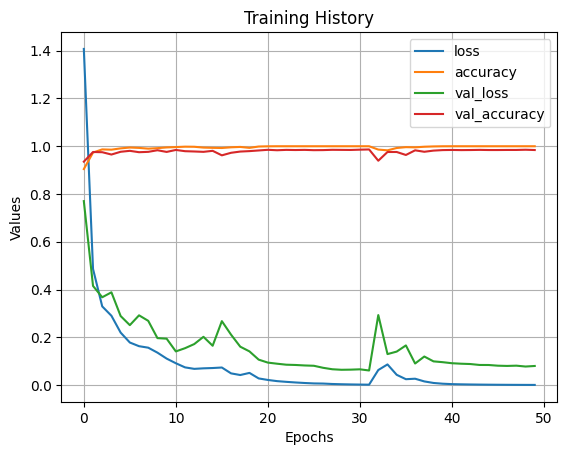

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

history_data = pd.DataFrame(history.history)

# Create the plot
plt.plot(history_data)
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training History')
plt.grid(True)
plt.legend(history_data.columns)
plt.show()

In [ ]:
import time

In [ ]:
from sklearn.metrics import classification_report

y_true = y_gs_test_encoded  # True labels (ground truth)

test_images = [np.load('hex_image.npy'),np.load('eg_image.npy')]
start_time = time.time()
y_pred = merged_model.predict(test_images)
end_time = time.time()
print(f"Prediction time: {end_time - start_time}")

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

classes = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# Generate the classification report
report_dict = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

# Print the classification report
print(report)

#Set the path and filename for the CSV file
file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ClassificationReports/"
file_name = "gs_eg_max_classification_report.csv"

report.to_csv(file_path + file_name)

103/103 [==============================] - 4s 35ms/step
Prediction time: 4.948608636856079
                precision    recall  f1-score      support
Lollipop         0.981250  0.993671  0.987421   316.000000
Kelihos_ver3     0.992126  0.969231  0.980545   130.000000
Gatak            0.996560  1.000000  0.998277   869.000000
Kelihos_ver1     0.996094  0.993506  0.994798   770.000000
Obfuscator.ACY   0.964960  0.962366  0.963661   372.000000
Simda            0.965217  0.982301  0.973684   452.000000
Tracur           0.857143  0.375000  0.521739    16.000000
Vundo            0.968182  0.968182  0.968182   220.000000
Ramnit           0.985612  0.985612  0.985612   139.000000
accuracy         0.984166  0.984166  0.984166     0.984166
macro avg        0.967460  0.914430  0.930435  3284.000000
weighted avg     0.983865  0.984166  0.983535  3284.000000


In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Macro F1-score: {macro_f1:.4f}')

Accuracy: 0.9842
Precision: 0.9839
Recall: 0.9842
F1-score: 0.9835
Macro F1-score: 0.9304


In [ ]:
from sklearn.metrics import confusion_matrix

label = np.arange(9)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, normalize = 'true')
print(conf_matrix)

[[0.99367089 0.         0.         0.         0.         0.00316456
  0.         0.00316456 0.        ]
 [0.         0.96923077 0.         0.         0.03076923 0.
  0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.        ]
 [0.0012987  0.         0.         0.99350649 0.         0.00519481
  0.         0.         0.        ]
 [0.00537634 0.         0.00268817 0.00537634 0.96236559 0.0188172
  0.00268817 0.00268817 0.        ]
 [0.00663717 0.         0.00442478 0.00221239 0.00442478 0.98230088
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.4375     0.
  0.375      0.1875     0.        ]
 [0.         0.00454545 0.         0.         0.         0.01818182
  0.         0.96818182 0.00909091]
 [0.         0.         0.         0.         0.         0.
  0.         0.01438849 0.98561151]]


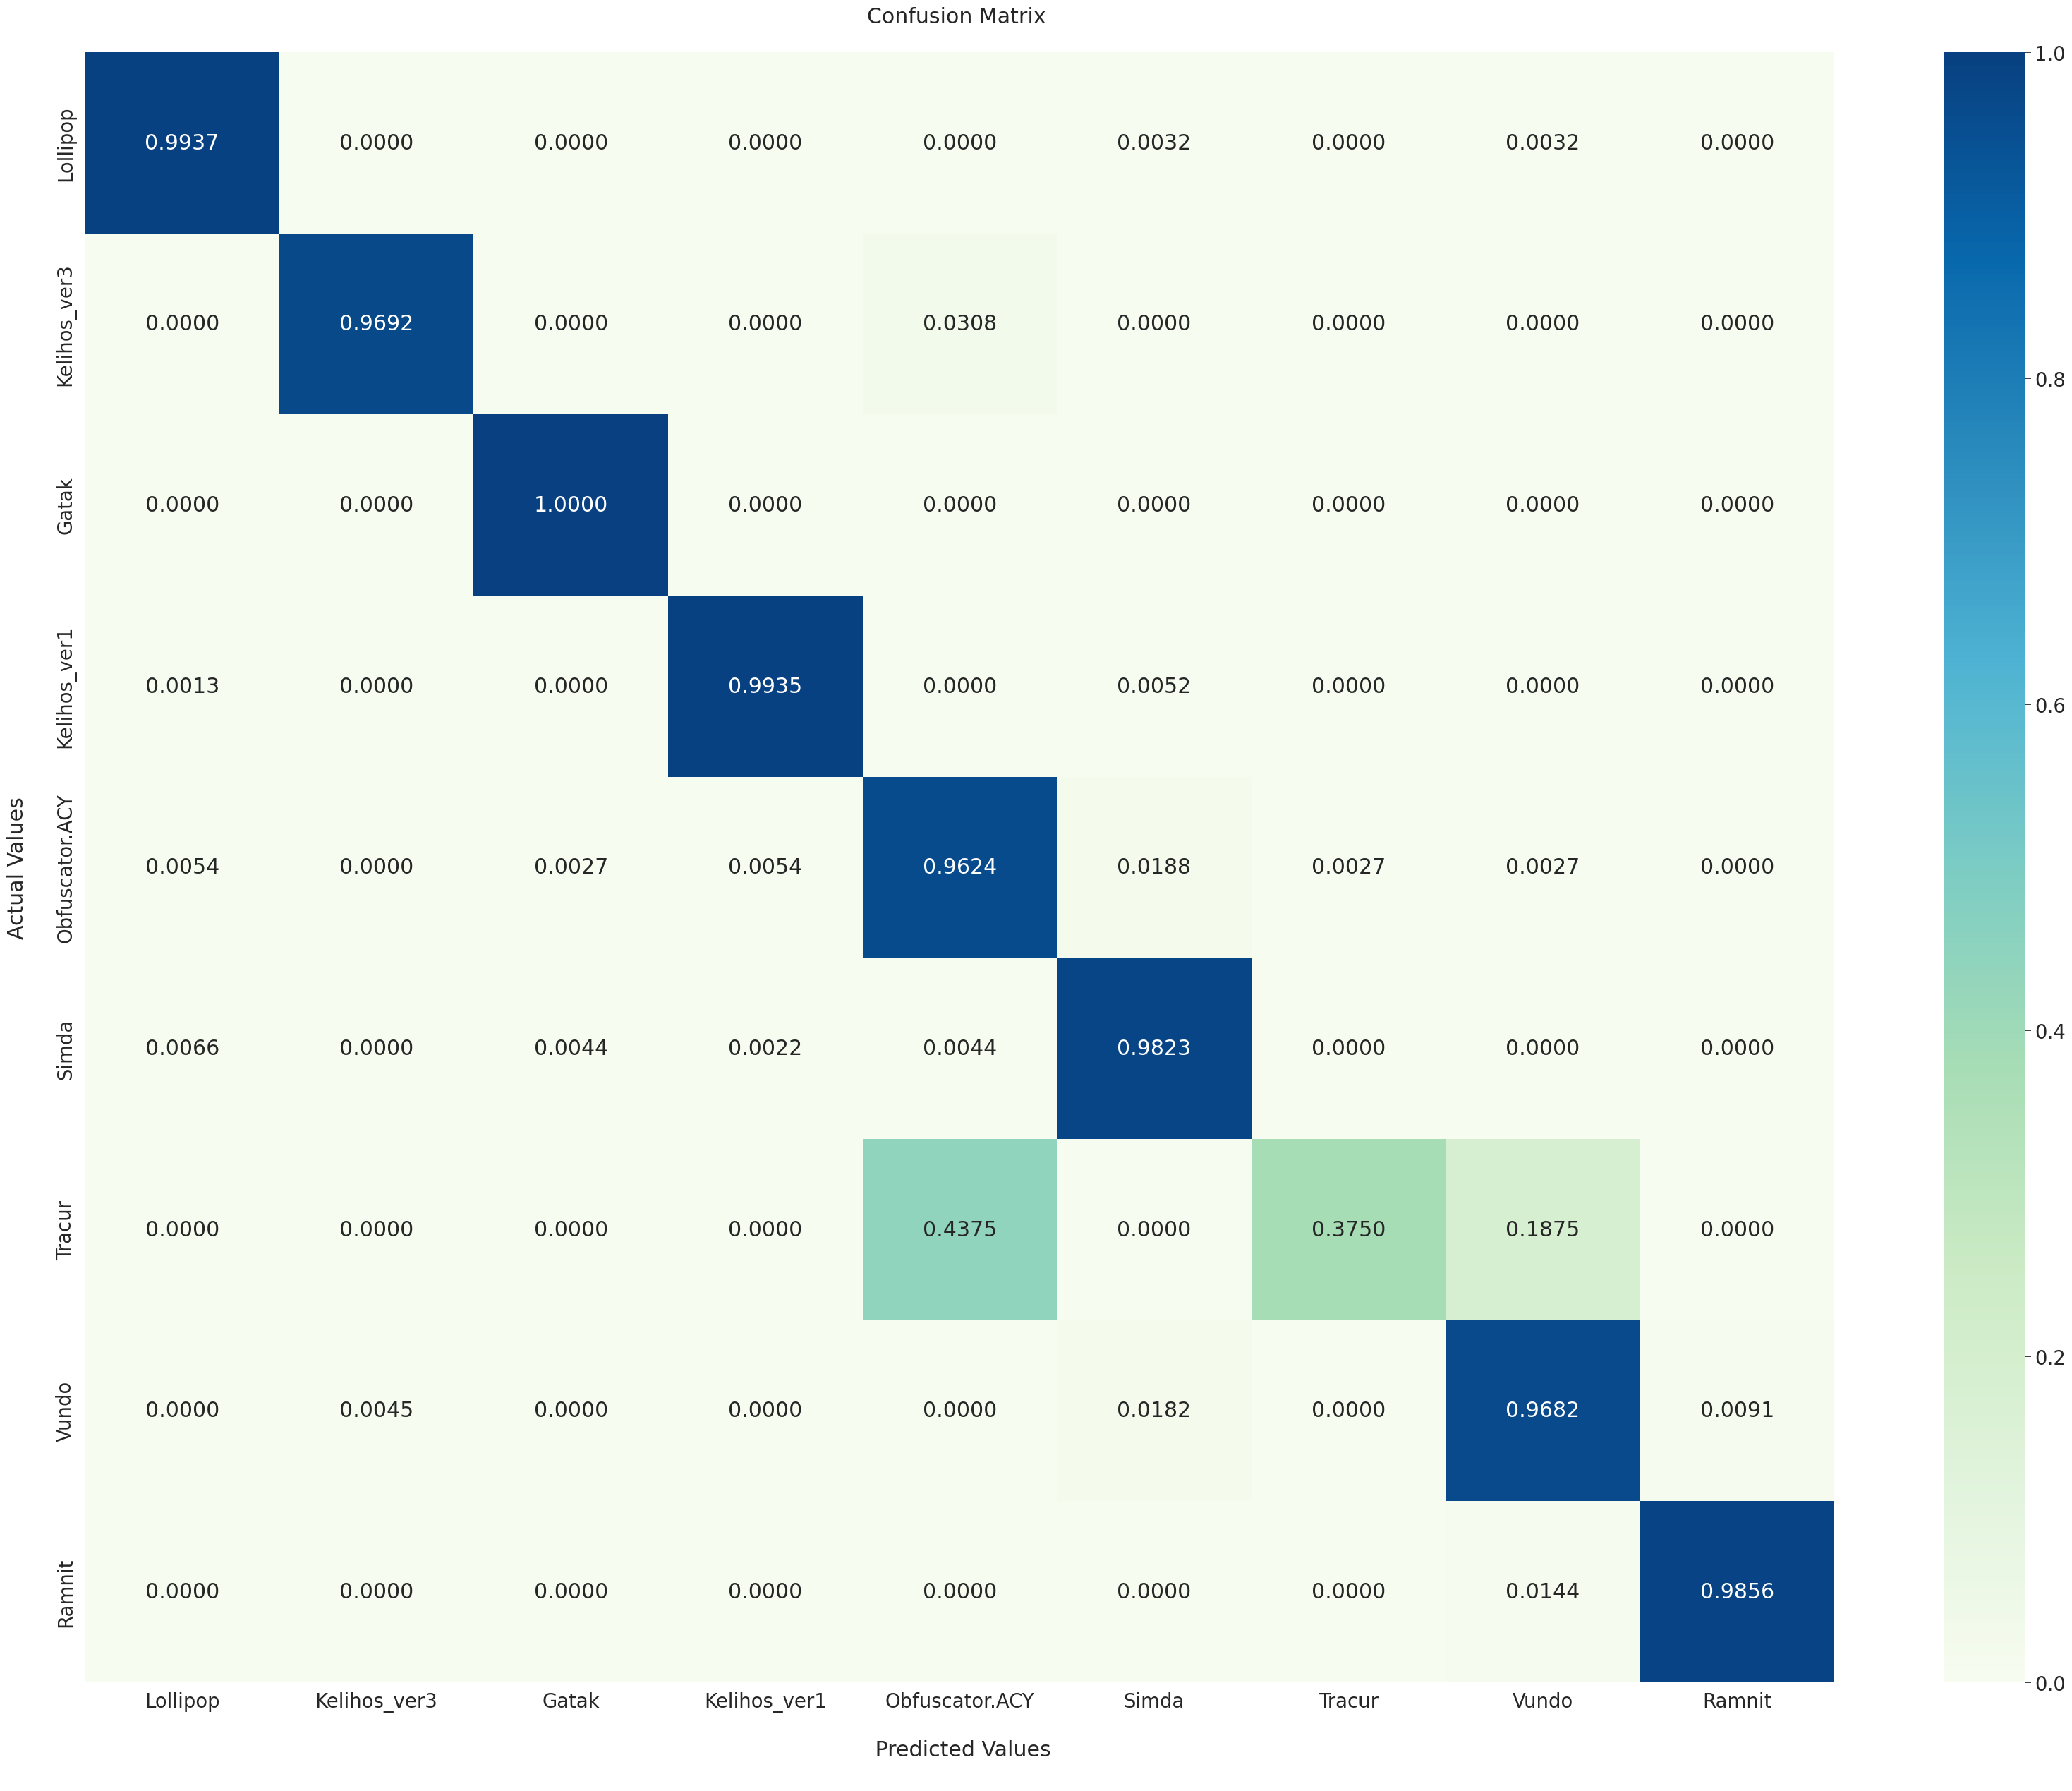

In [ ]:
# Visualizing confusion matrix
import seaborn as sns

plt.figure(figsize=(40,30))
sns.set(font_scale=1.8)
fx=sns.heatmap(conf_matrix, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)

file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ConfusionMetrics/"
file_name = "GS_EG_Max_Confusion_Matrix.png"
plt.savefig(file_path + file_name)

plt.show()

###**GS+EG(ADD)**

In [ ]:
# Concatenate the output of the 2 models
merged = add([hex_model, eg_model])

# Add one or more dense layers on top of the merged output
dense1 = Dense(256, activation = 'relu')(merged)
dense2 = Dense(128, activation = 'relu')(dense1)
dense3 = Dense(64, activation = 'relu',kernel_regularizer = l2(0.01))(dense2)
output = Dense(9, activation = 'softmax')(dense3)

# Define the model
merged_model = Model(inputs = [hex_in, eg_in], outputs = output, name = 'merged_model')

# Compile the model
merged_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = merged_model.fit(
    [x_gs_train, x_eg_train],
    y_gs_train_encoded,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=([x_gs_test, x_eg_test], y_gs_test_encoded)
)

Epoch 1/50
240/240 [==============================] - 16s 59ms/step - loss: 1.2347 - accuracy: 0.9022 - val_loss: 0.5938 - val_accuracy: 0.9604
Epoch 2/50
240/240 [==============================] - 13s 54ms/step - loss: 0.4671 - accuracy: 0.9732 - val_loss: 0.5186 - val_accuracy: 0.9616
Epoch 3/50
240/240 [==============================] - 13s 53ms/step - loss: 0.3486 - accuracy: 0.9804 - val_loss: 0.4667 - val_accuracy: 0.9571
Epoch 4/50
240/240 [==============================] - 13s 54ms/step - loss: 0.2847 - accuracy: 0.9838 - val_loss: 0.3614 - val_accuracy: 0.9744
Epoch 5/50
240/240 [==============================] - 13s 54ms/step - loss: 0.2592 - accuracy: 0.9817 - val_loss: 0.6664 - val_accuracy: 0.9287
Epoch 6/50
240/240 [==============================] - 13s 54ms/step - loss: 0.1815 - accuracy: 0.9923 - val_loss: 0.2667 - val_accuracy: 0.9796
Epoch 7/50
240/240 [==============================] - 13s 53ms/step - loss: 0.1464 - accuracy: 0.9948 - val_loss: 0.2543 - val_accuracy:

In [ ]:
# saving the first (hex_en) model
merged_model.save('/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/Models/GS_EG_vgg(add).keras')

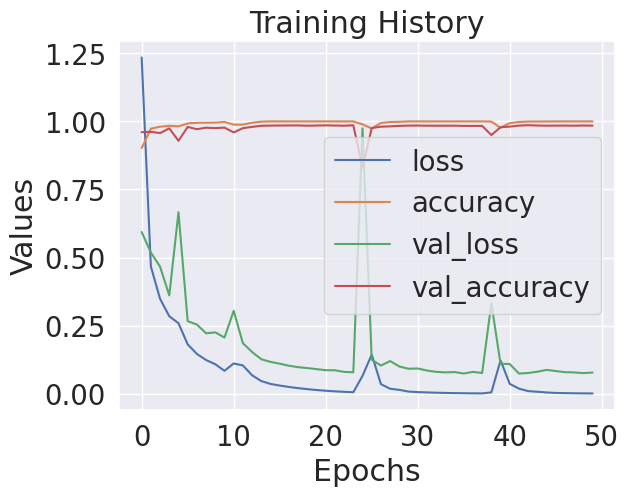

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

history_data = pd.DataFrame(history.history)

# Create the plot
plt.plot(history_data)
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training History')
plt.grid(True)
plt.legend(history_data.columns)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_true = y_gs_test_encoded  # True labels (ground truth)

#test_images = [hex_x_test, en_x_test]


test_images = [np.load('hex_image.npy'),np.load('eg_image.npy')]
start_time = time.time()
y_pred = merged_model.predict(test_images)
end_time = time.time()
print(f"Prediction time: {end_time - start_time}")

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

classes = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# Generate the classification report
report_dict = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

print(report)

#Set the path and filename for the CSV file
file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ClassificationReports/"
file_name = "GS_EG_add_classification_report.csv"

report.to_csv(file_path + file_name)

103/103 [==============================] - 4s 34ms/step
Prediction time: 5.3759925365448
                precision    recall  f1-score     support
Lollipop         0.996795  0.984177  0.990446   316.00000
Kelihos_ver3     1.000000  0.969231  0.984375   130.00000
Gatak            0.996560  1.000000  0.998277   869.00000
Kelihos_ver1     0.992228  0.994805  0.993515   770.00000
Obfuscator.ACY   0.952128  0.962366  0.957219   372.00000
Simda            0.969432  0.982301  0.975824   452.00000
Tracur           0.750000  0.375000  0.500000    16.00000
Vundo            0.972851  0.977273  0.975057   220.00000
Ramnit           0.992806  0.992806  0.992806   139.00000
accuracy         0.984470  0.984470  0.984470     0.98447
macro avg        0.958089  0.915329  0.929724  3284.00000
weighted avg     0.983988  0.984470  0.983901  3284.00000


In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Macro F1-score: {macro_f1:.4f}')

Accuracy: 0.9845
Precision: 0.9840
Recall: 0.9845
F1-score: 0.9839
Macro F1-score: 0.9297


In [ ]:
from sklearn.metrics import confusion_matrix

label = np.arange(9)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, normalize = 'true')
print(conf_matrix)

[[0.98417722 0.         0.         0.00316456 0.00632911 0.00316456
  0.         0.00316456 0.        ]
 [0.         0.96923077 0.         0.         0.02307692 0.
  0.         0.00769231 0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.99480519 0.         0.00519481
  0.         0.         0.        ]
 [0.00268817 0.         0.00268817 0.00806452 0.96236559 0.0188172
  0.         0.00537634 0.        ]
 [0.         0.         0.00442478 0.00442478 0.00884956 0.98230088
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.5        0.
  0.375      0.125      0.        ]
 [0.         0.         0.         0.         0.         0.00909091
  0.00909091 0.97727273 0.00454545]
 [0.         0.         0.         0.         0.00719424 0.
  0.         0.         0.99280576]]


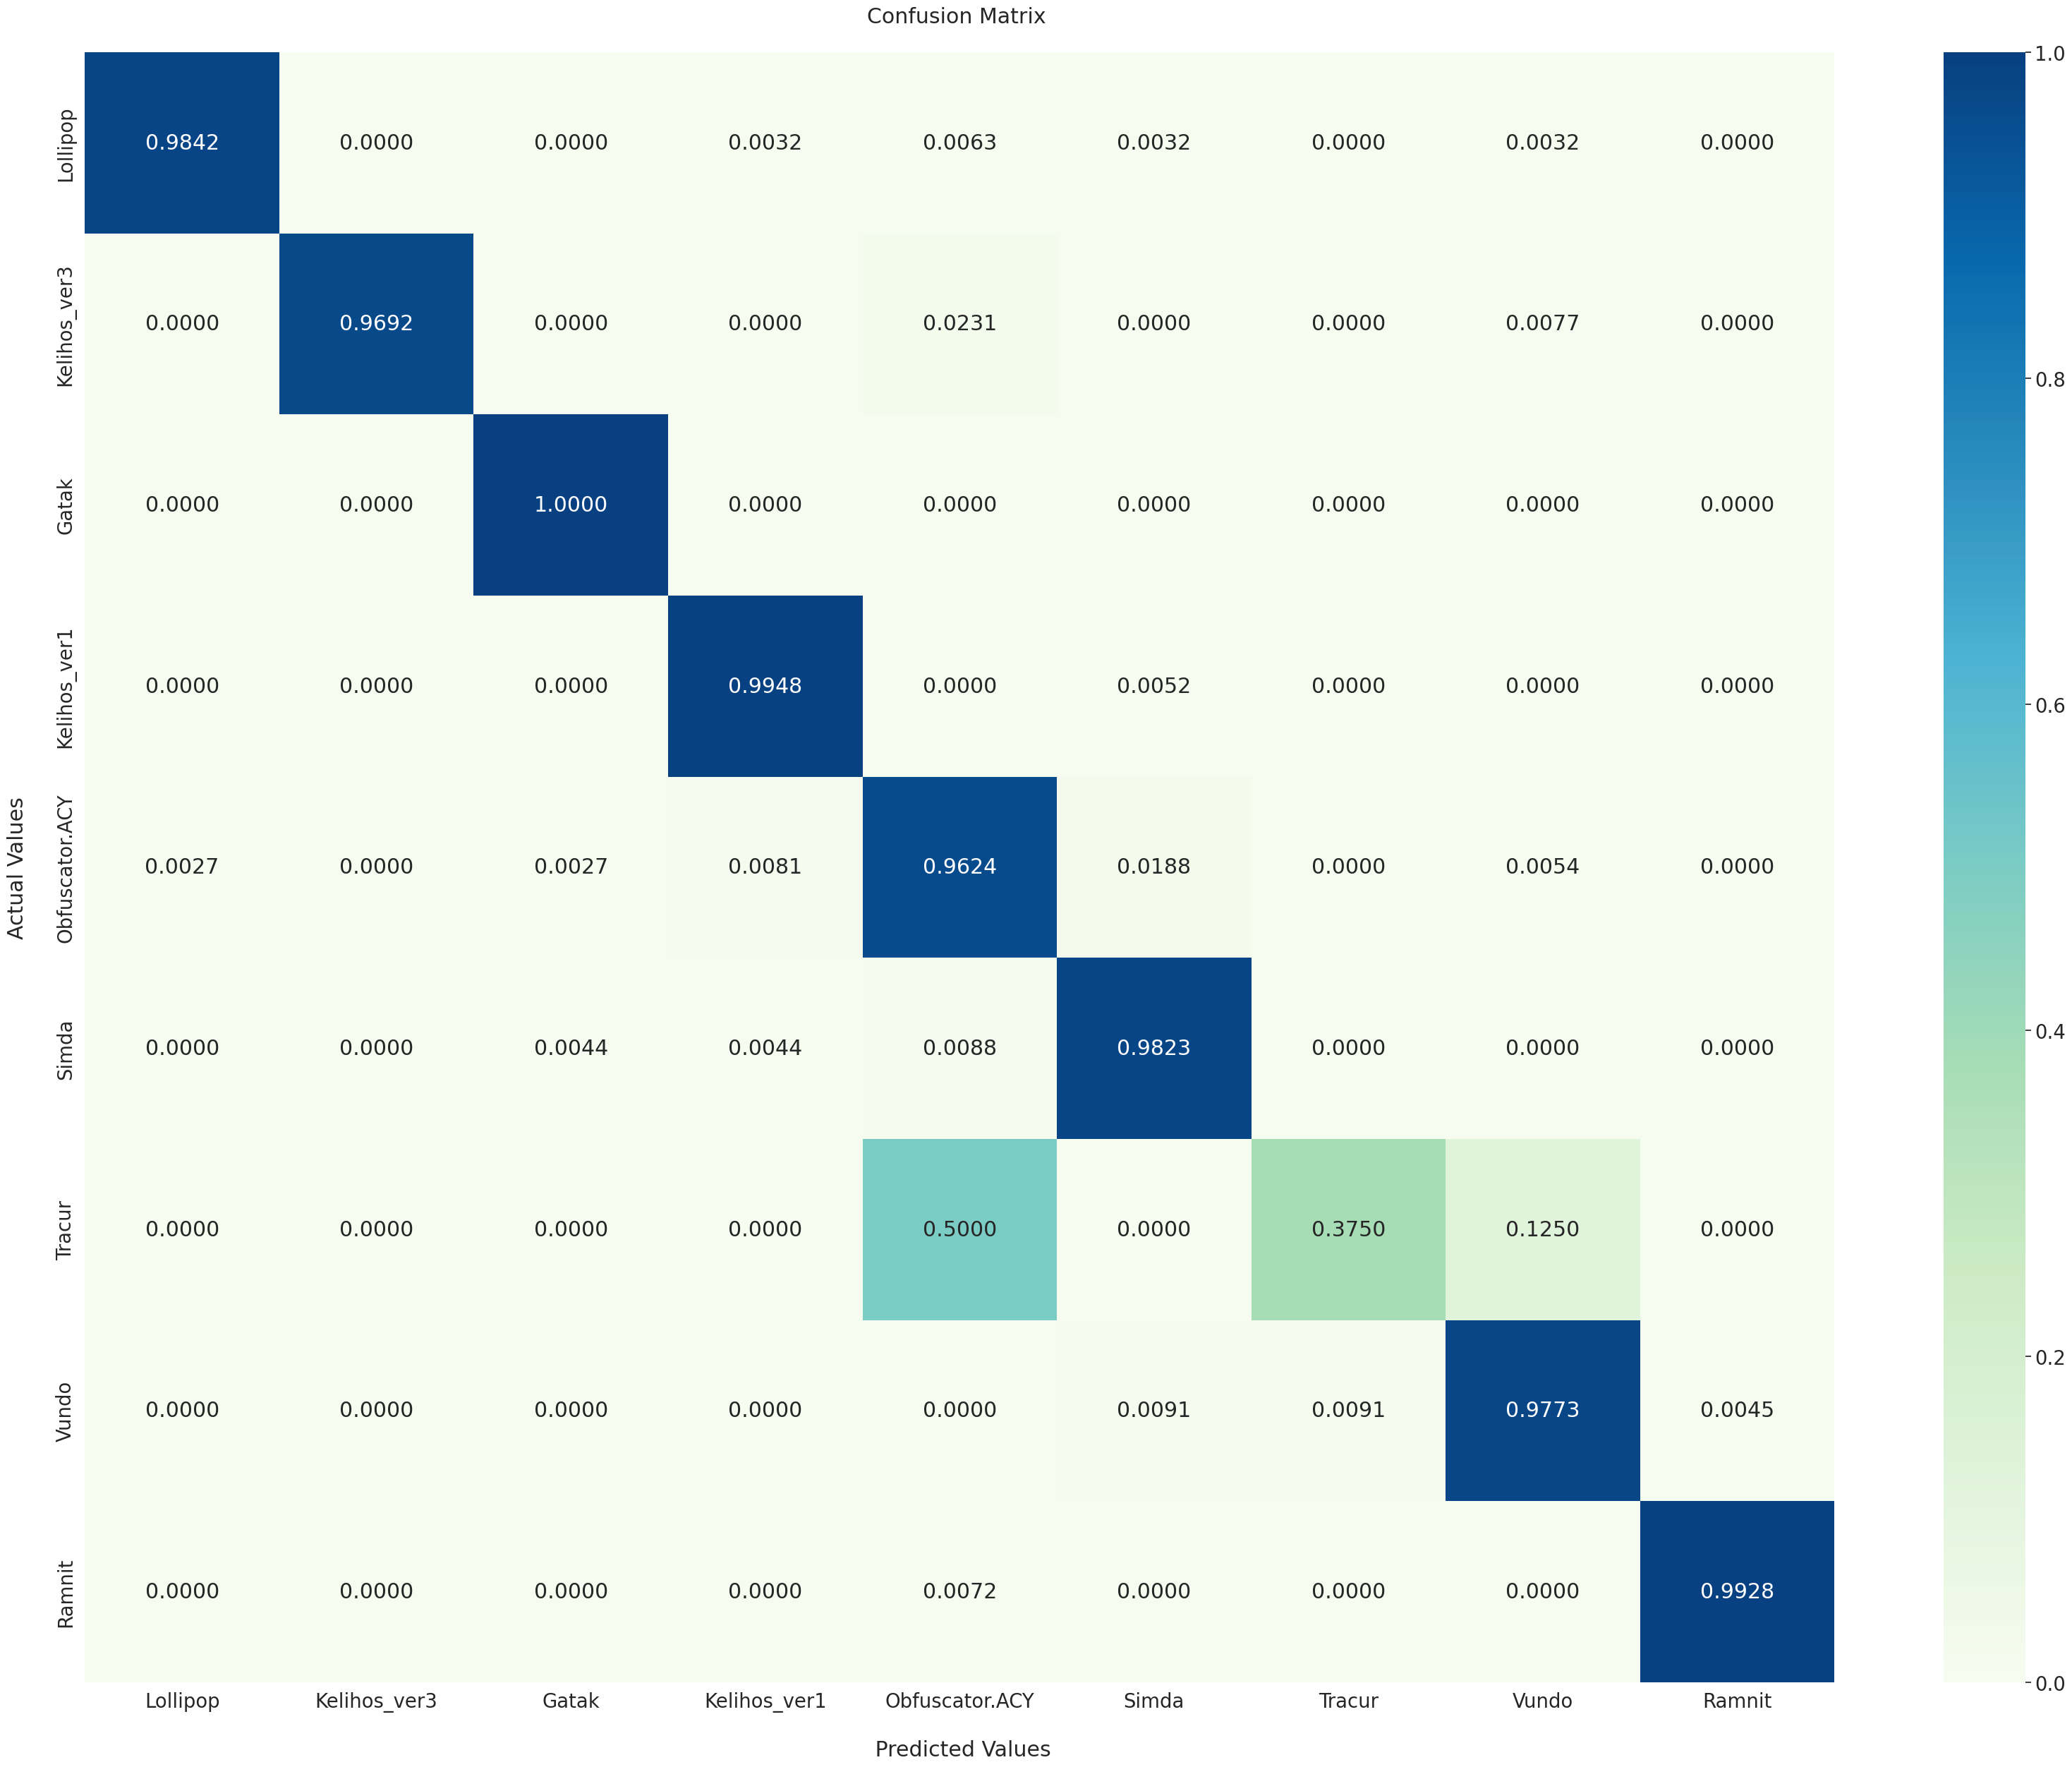

In [ ]:
# Visualizing confusion matrix
import seaborn as sns

plt.figure(figsize=(40,30))
sns.set(font_scale=1.8)
fx=sns.heatmap(conf_matrix, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)

file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ConfusionMetrics/"
file_name = "GS_EG_ADD_Confusion_Matrix.png"
plt.savefig(file_path + file_name)

plt.show()

###**GS+EG(AVG)**

In [ ]:
# Concatenate the output of the 2 models
merged = average([hex_model, eg_model])

# Add one or more dense layers on top of the merged output
dense1 = Dense(256, activation = 'relu')(merged)
dense2 = Dense(128, activation = 'relu')(dense1)
dense3 = Dense(64, activation = 'relu',kernel_regularizer = l2(0.01))(dense2)
output = Dense(9, activation = 'softmax')(dense3)

# Define the model
merged_model = Model(inputs = [hex_in, eg_in], outputs = output, name = 'merged_model')

# Compile the model
merged_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = merged_model.fit(
    [x_gs_train, x_eg_train],
    y_gs_train_encoded,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=([x_gs_test, x_eg_test], y_gs_test_encoded)
)

Epoch 1/50
240/240 [==============================] - 16s 61ms/step - loss: 0.9244 - accuracy: 0.9183 - val_loss: 0.4859 - val_accuracy: 0.9613
Epoch 2/50
240/240 [==============================] - 13s 54ms/step - loss: 0.3739 - accuracy: 0.9777 - val_loss: 0.3383 - val_accuracy: 0.9756
Epoch 3/50
240/240 [==============================] - 13s 54ms/step - loss: 0.2568 - accuracy: 0.9903 - val_loss: 0.2721 - val_accuracy: 0.9784
Epoch 4/50
240/240 [==============================] - 13s 53ms/step - loss: 0.1957 - accuracy: 0.9932 - val_loss: 0.2781 - val_accuracy: 0.9692
Epoch 5/50
240/240 [==============================] - 13s 53ms/step - loss: 0.1609 - accuracy: 0.9932 - val_loss: 0.2003 - val_accuracy: 0.9799
Epoch 6/50
240/240 [==============================] - 13s 53ms/step - loss: 0.1183 - accuracy: 0.9980 - val_loss: 0.1716 - val_accuracy: 0.9811
Epoch 7/50
240/240 [==============================] - 13s 53ms/step - loss: 0.1015 - accuracy: 0.9978 - val_loss: 0.1823 - val_accuracy:

In [ ]:
# Saving the Model
merged_model.save('/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/Models/GS_EG_vgg(average).keras')

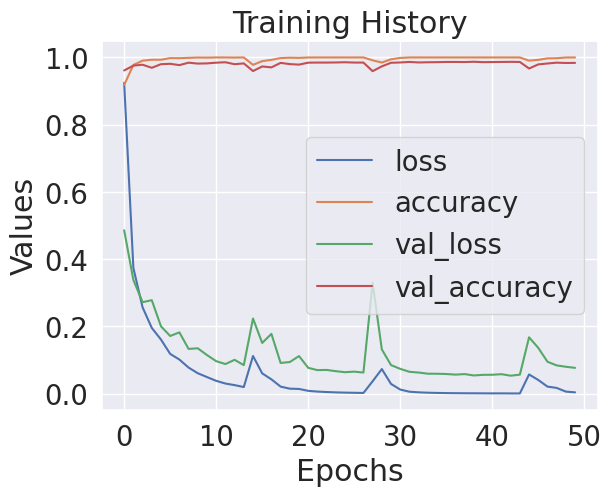

In [ ]:
history_data = pd.DataFrame(history.history)

# Create the plot
plt.plot(history_data)
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training History')
plt.grid(True)
plt.legend(history_data.columns)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_true = y_gs_test_encoded  # True labels (ground truth)

#test_images = [hex_x_test, en_x_test]


test_images = [np.load('hex_image.npy'),np.load('eg_image.npy')]
start_time = time.time()
y_pred = merged_model.predict(test_images)
end_time = time.time()
print(f"Prediction time: {end_time - start_time}")

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

classes = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# Generate the classification report
report_dict = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

print(report)

#Set the path and filename for the CSV file
file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ClassificationReports/"
file_name = "GS_EG_avg_classification_report.csv"

report.to_csv(file_path + file_name)

103/103 [==============================] - 4s 34ms/step
Prediction time: 4.825191020965576
                precision    recall  f1-score      support
Lollipop         0.981250  0.993671  0.987421   316.000000
Kelihos_ver3     0.984252  0.961538  0.972763   130.000000
Gatak            0.996560  1.000000  0.998277   869.000000
Kelihos_ver1     0.996094  0.993506  0.994798   770.000000
Obfuscator.ACY   0.970190  0.962366  0.966262   372.000000
Simda            0.967320  0.982301  0.974753   452.000000
Tracur           0.875000  0.437500  0.583333    16.000000
Vundo            0.955357  0.972727  0.963964   220.000000
Ramnit           0.985401  0.971223  0.978261   139.000000
accuracy         0.983861  0.983861  0.983861     0.983861
macro avg        0.967936  0.919426  0.935537  3284.000000
weighted avg     0.983654  0.983861  0.983375  3284.000000


In [ ]:
from sklearn.metrics import confusion_matrix

label = np.arange(9)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, normalize = 'true')
print(conf_matrix)

[[0.99367089 0.         0.         0.         0.         0.00316456
  0.         0.00316456 0.        ]
 [0.         0.96153846 0.         0.         0.03076923 0.
  0.         0.00769231 0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.0012987  0.         0.99350649 0.         0.00519481
  0.         0.         0.        ]
 [0.00268817 0.00268817 0.00268817 0.00537634 0.96236559 0.0188172
  0.         0.00537634 0.        ]
 [0.01106195 0.         0.00442478 0.         0.00221239 0.98230088
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.3125     0.
  0.4375     0.25       0.        ]
 [0.         0.         0.         0.         0.         0.01363636
  0.00454545 0.97272727 0.00909091]
 [0.         0.         0.         0.00719424 0.00719424 0.
  0.         0.01438849 0.97122302]]


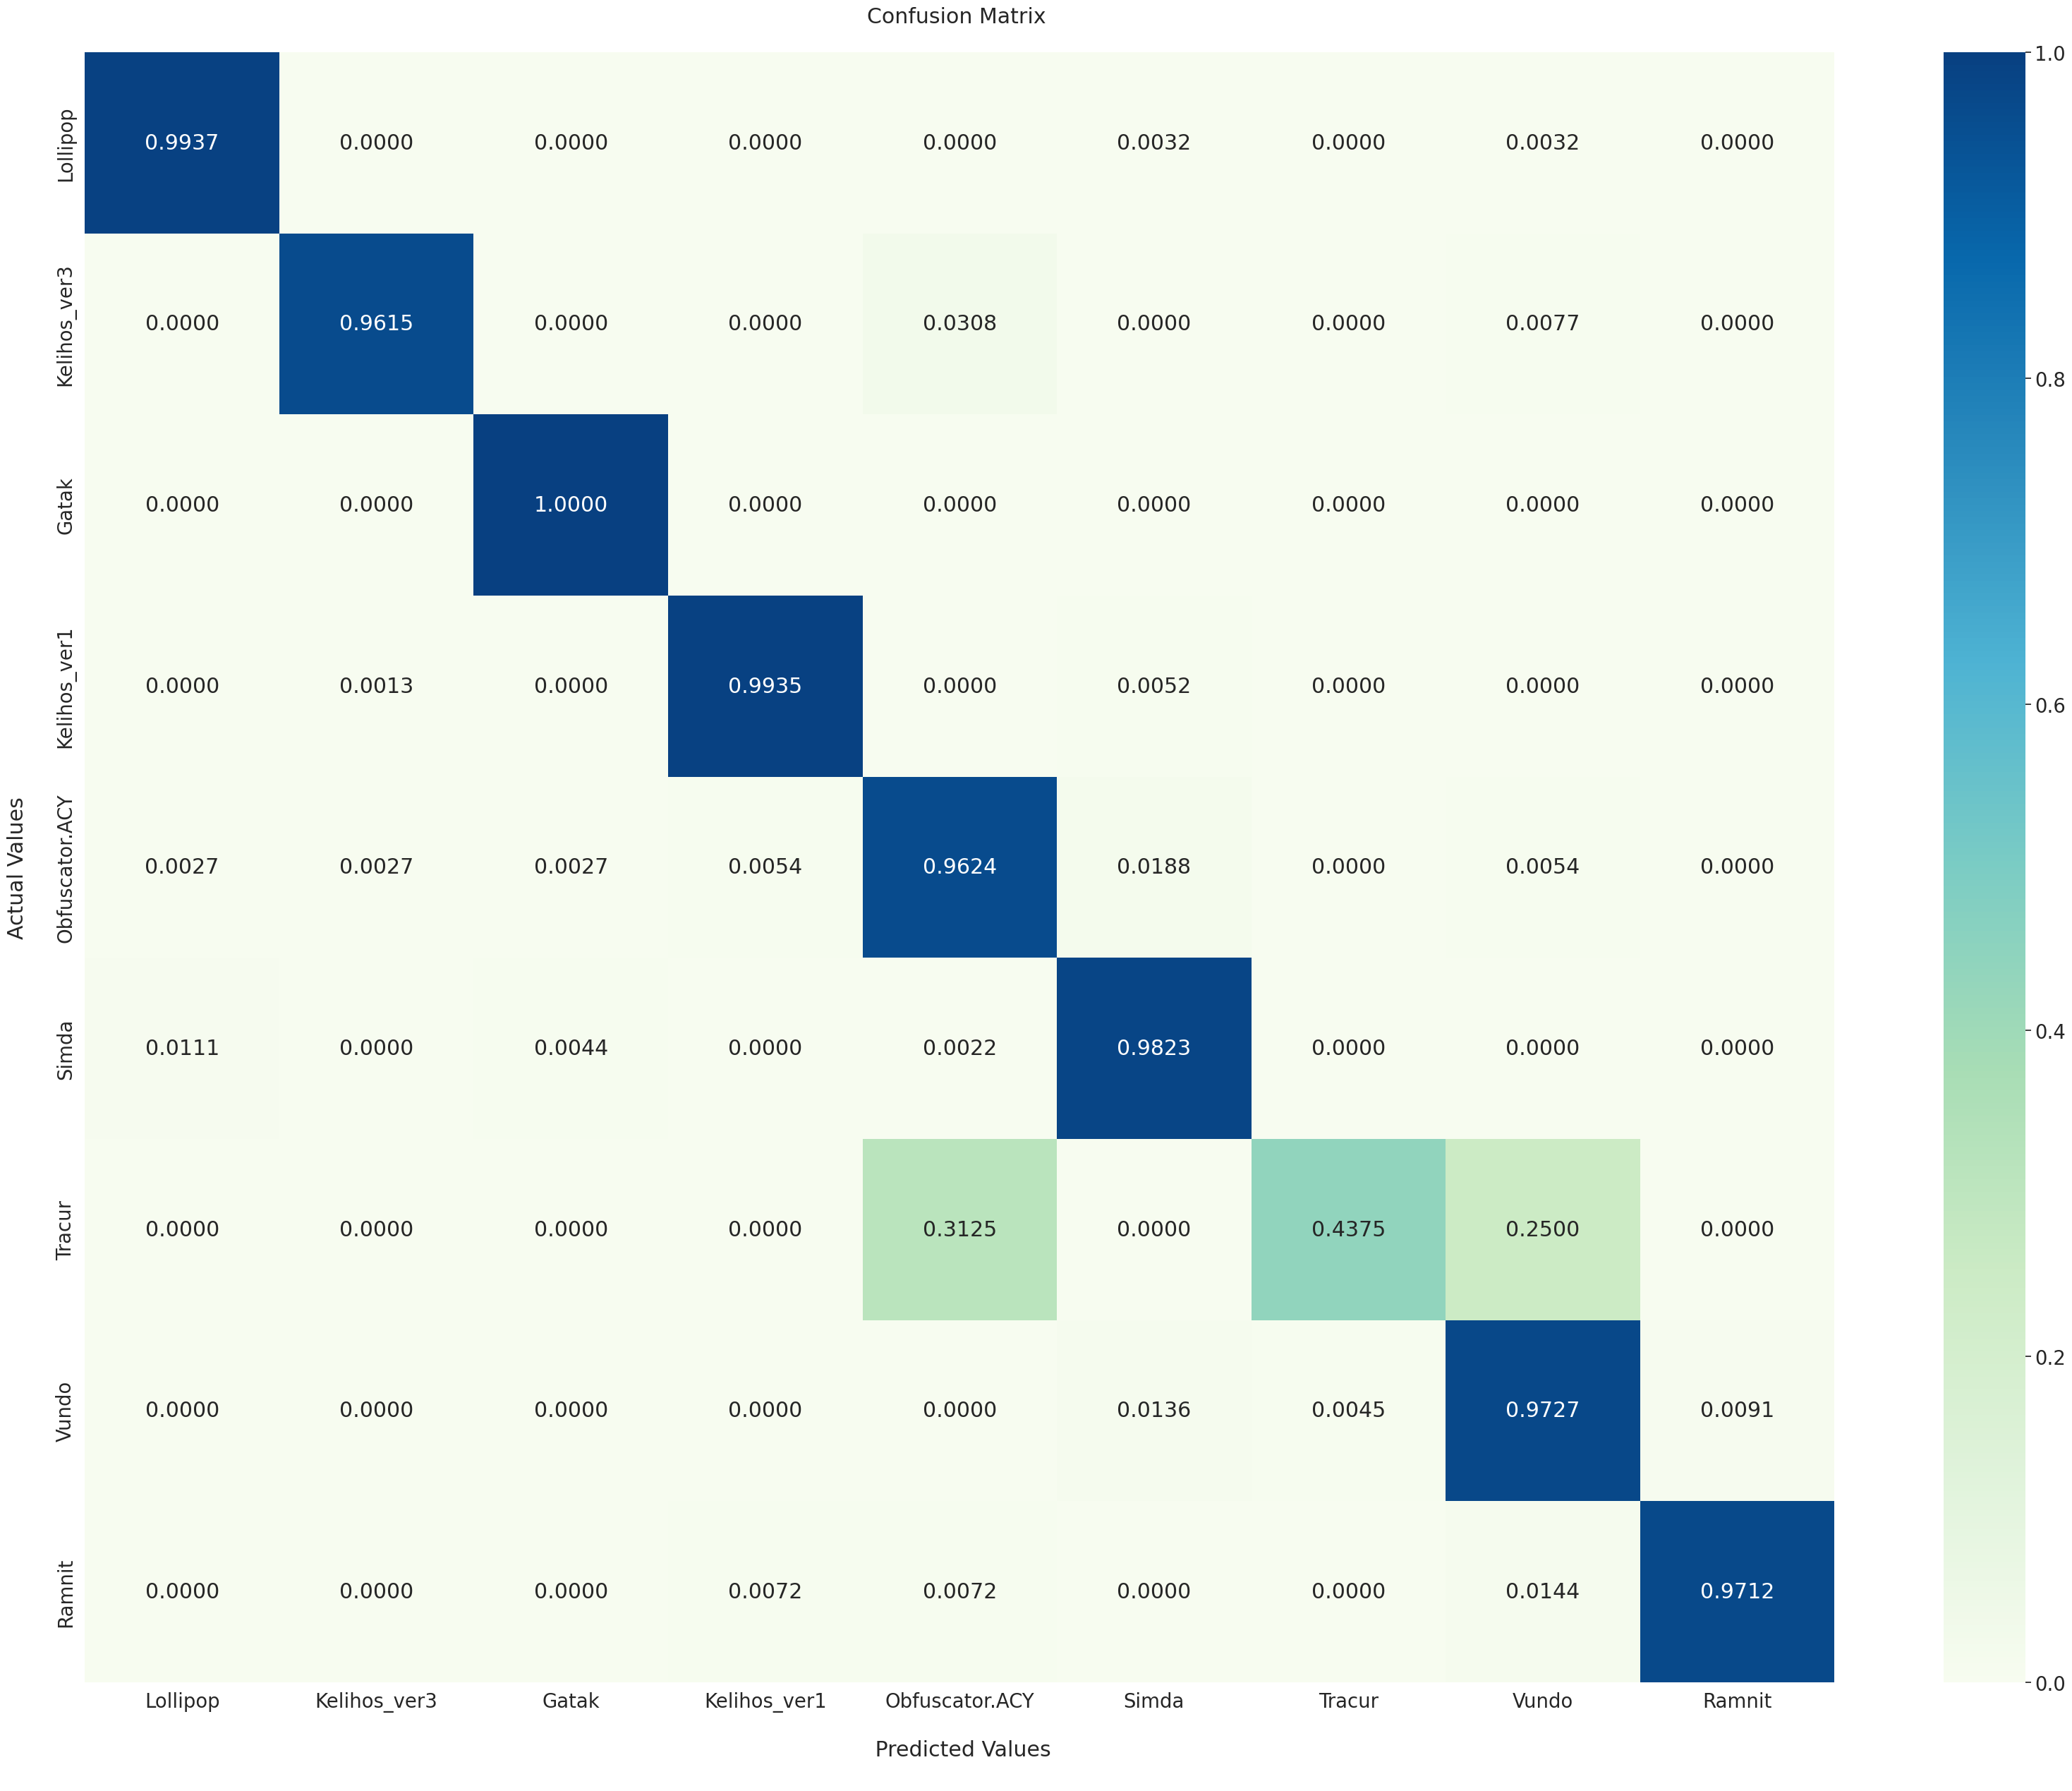

In [ ]:
# Visualizing confusion matrix
import seaborn as sns

plt.figure(figsize=(40,30))
sns.set(font_scale=1.8)
fx=sns.heatmap(conf_matrix, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)

file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ConfusionMetrics/"
file_name = "GS_EG_AVERAGE_Confusion_Matrix.png"
plt.savefig(file_path + file_name)

plt.show()

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Macro F1-score: {macro_f1:.4f}')

Accuracy: 0.9839
Precision: 0.9837
Recall: 0.9839
F1-score: 0.9834
Macro F1-score: 0.9355


###**GS+EG(CONCAT)**

In [ ]:
# Concatenate the output of the 2 models
merged = concatenate([hex_model, eg_model])

# Add one or more dense layers on top of the merged output
dense1 = Dense(512, activation = 'relu')(merged)
dense2 = Dense(256, activation = 'relu')(dense1)
dense3 = Dense(128, activation = 'relu')(dense2)
output = Dense(9, activation = 'softmax')(dense3)

# Define the model
merged_model = Model(inputs = [hex_in, eg_in], outputs = output, name = 'merged_model')

# Compile the model
merged_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = merged_model.fit(
    [x_gs_train, x_eg_train],
    y_gs_train_encoded,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=([x_gs_test, x_eg_test], y_gs_test_encoded)
)

Epoch 1/50
240/240 [==============================] - 16s 60ms/step - loss: 1.0683 - accuracy: 0.9146 - val_loss: 0.2861 - val_accuracy: 0.9525
Epoch 2/50
240/240 [==============================] - 13s 54ms/step - loss: 0.1419 - accuracy: 0.9744 - val_loss: 0.1831 - val_accuracy: 0.9665
Epoch 3/50
240/240 [==============================] - 13s 54ms/step - loss: 0.0796 - accuracy: 0.9820 - val_loss: 0.1446 - val_accuracy: 0.9762
Epoch 4/50
240/240 [==============================] - 13s 54ms/step - loss: 0.0783 - accuracy: 0.9834 - val_loss: 0.1483 - val_accuracy: 0.9762
Epoch 5/50
240/240 [==============================] - 13s 54ms/step - loss: 0.0393 - accuracy: 0.9911 - val_loss: 0.2209 - val_accuracy: 0.9671
Epoch 6/50
240/240 [==============================] - 13s 54ms/step - loss: 0.0207 - accuracy: 0.9937 - val_loss: 0.1961 - val_accuracy: 0.9629
Epoch 7/50
240/240 [==============================] - 13s 54ms/step - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.1810 - val_accuracy:

In [ ]:
# saving the first (hex_en) model
merged_model.save('/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/Models/GS_EG_vgg(concat).pkl')

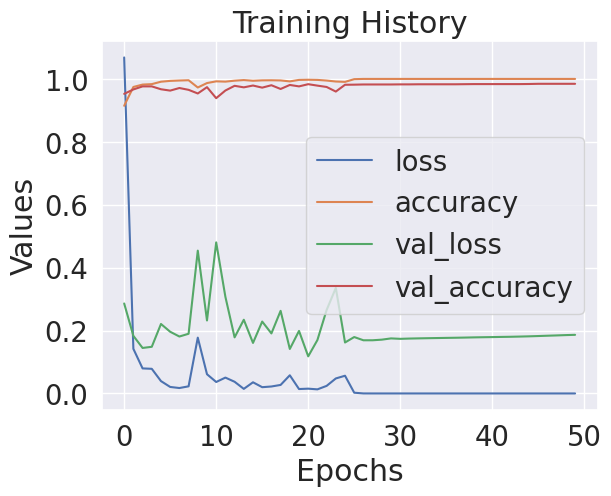

In [ ]:
history_data = pd.DataFrame(history.history)

# Create the plot
plt.plot(history_data)
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training History')
plt.grid(True)
plt.legend(history_data.columns)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_true = y_gs_test_encoded  # True labels (ground truth)


#test_images = [hex_x_test, en_x_test]

test_images = [np.load('hex_image.npy'),np.load('eg_image.npy')]
start_time = time.time()
y_pred = merged_model.predict(test_images)
end_time = time.time()
print(f"Prediction time: {end_time - start_time}")

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

classes = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# Generate the classification report
report_dict = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

print(report)

#Set the path and filename for the CSV file
file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ClassificationReports/"
file_name = "GS_EG_concat_classification_report.csv"

report.to_csv(file_path + file_name)

103/103 [==============================] - 4s 35ms/step
Prediction time: 4.848914861679077
                precision    recall  f1-score     support
Lollipop         0.996815  0.990506  0.993651   316.00000
Kelihos_ver3     1.000000  0.938462  0.968254   130.00000
Gatak            0.996560  1.000000  0.998277   869.00000
Kelihos_ver1     0.993506  0.993506  0.993506   770.00000
Obfuscator.ACY   0.949868  0.967742  0.958722   372.00000
Simda            0.967105  0.975664  0.971366   452.00000
Tracur           0.800000  0.500000  0.615385    16.00000
Vundo            0.977376  0.981818  0.979592   220.00000
Ramnit           0.992857  1.000000  0.996416   139.00000
accuracy         0.984470  0.984470  0.984470     0.98447
macro avg        0.963787  0.927522  0.941685  3284.00000
weighted avg     0.984262  0.984470  0.984144  3284.00000


In [ ]:
from sklearn.metrics import confusion_matrix

label = np.arange(9)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, normalize = 'true')
print(conf_matrix)

[[0.99050633 0.         0.         0.         0.00316456 0.00316456
  0.00316456 0.         0.        ]
 [0.         0.93846154 0.         0.00769231 0.04615385 0.
  0.         0.00769231 0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.99350649 0.         0.00649351
  0.         0.         0.        ]
 [0.         0.         0.00268817 0.00806452 0.96774194 0.01612903
  0.00268817 0.00268817 0.        ]
 [0.00221239 0.         0.00442478 0.00221239 0.01327434 0.97566372
  0.         0.00221239 0.        ]
 [0.         0.         0.         0.         0.375      0.
  0.5        0.125      0.        ]
 [0.         0.         0.         0.         0.         0.01363636
  0.         0.98181818 0.00454545]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.        ]]


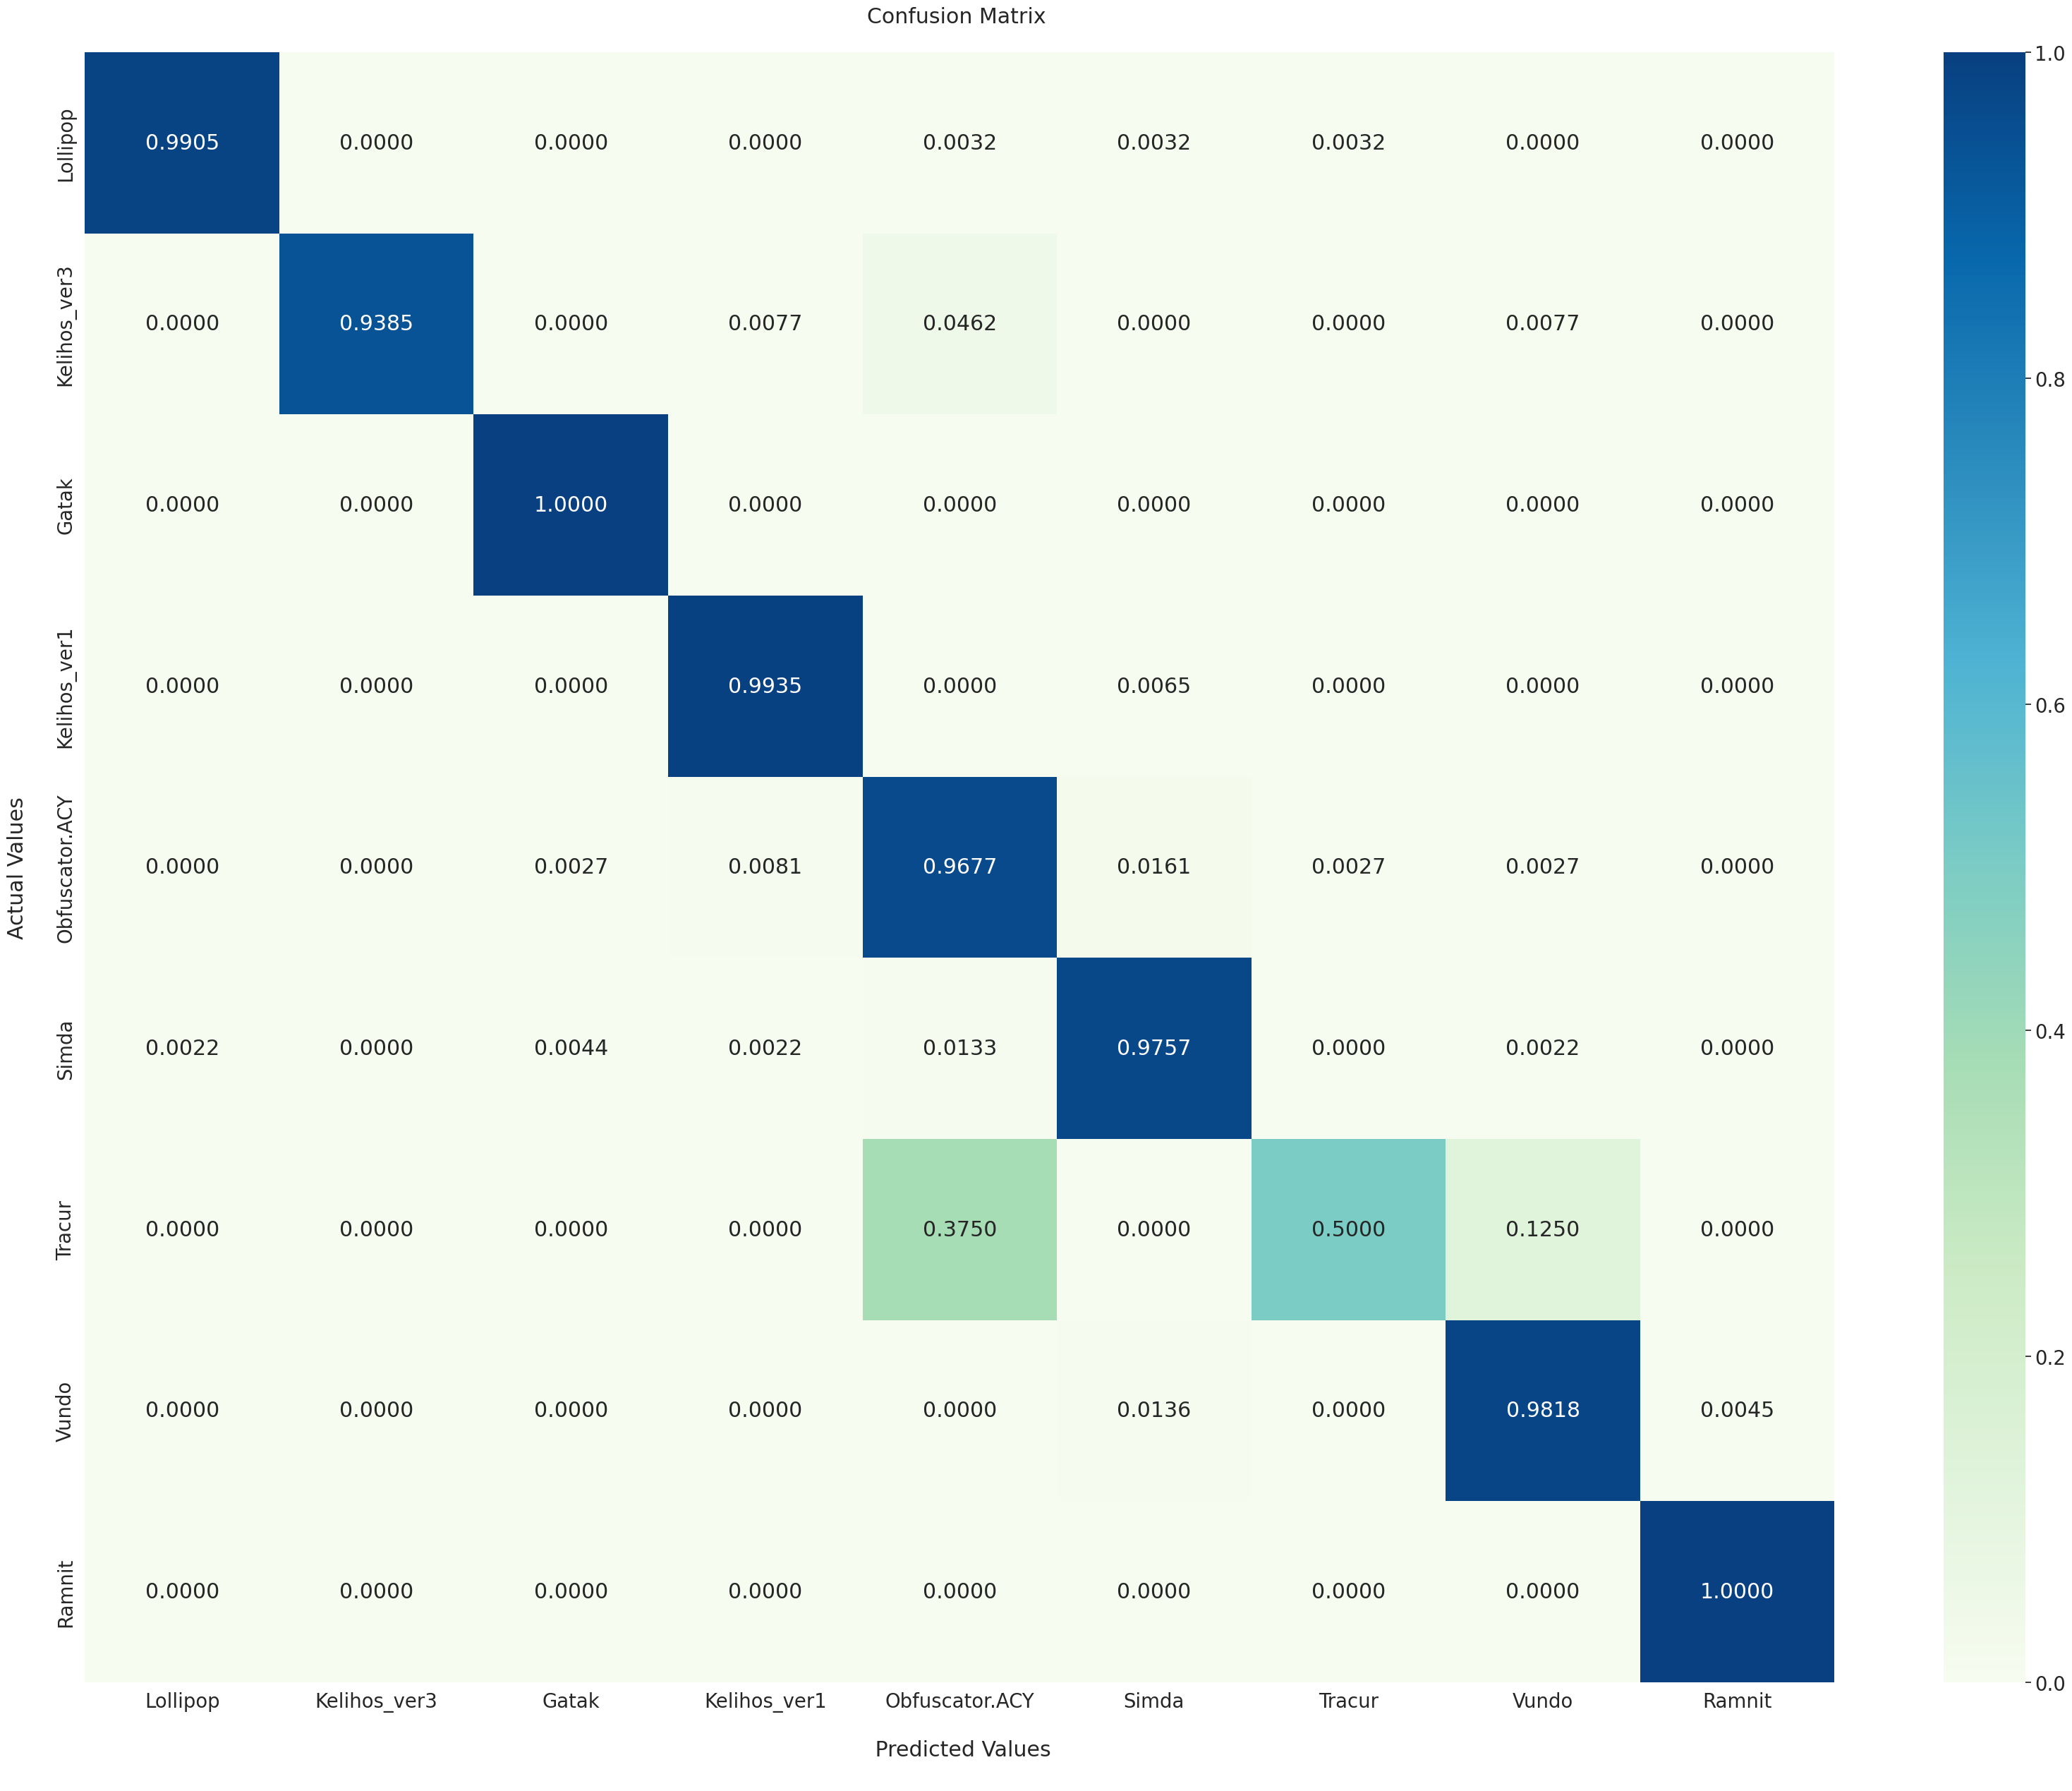

In [ ]:
# Visualizing confusion matrix
import seaborn as sns

plt.figure(figsize=(40,30))
sns.set(font_scale=1.8)
fx=sns.heatmap(conf_matrix, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)

file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ConfusionMetrics/"
file_name = "GS_EG_CONCAT_Confusion_Matrix.png"
plt.savefig(file_path + file_name)

plt.show()

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Macro F1-score: {macro_f1:.4f}')

Accuracy: 0.9845
Precision: 0.9843
Recall: 0.9845
F1-score: 0.9841
Macro F1-score: 0.9417


##**GS+SH**

###**GS+SH(ADD)**

In [ ]:
# Concatenate the output of the 2 models
merged = add([hex_model, sh_model])

# Add one or more dense layers on top of the merged output
dense1 = Dense(256, activation = 'relu')(merged)
dense2 = Dense(128, activation = 'relu')(dense1)
dense3 = Dense(64, activation = 'relu',kernel_regularizer = l2(0.01))(dense2)
output = Dense(9, activation = 'softmax')(dense3)

# Define the model
merged_model = Model(inputs = [hex_in, sh_in], outputs = output, name = 'merged_model')

# Compile the model
merged_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = merged_model.fit(
    [x_gs_train, x_sh_train],
    y_gs_train_encoded,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=([x_gs_test, x_sh_test], y_gs_test_encoded)
)

Epoch 1/50
240/240 [==============================] - 16s 59ms/step - loss: 3.9488 - accuracy: 0.8428 - val_loss: 1.0866 - val_accuracy: 0.9208
Epoch 2/50
240/240 [==============================] - 13s 53ms/step - loss: 0.8641 - accuracy: 0.9298 - val_loss: 0.6554 - val_accuracy: 0.9488
Epoch 3/50
240/240 [==============================] - 13s 53ms/step - loss: 0.5787 - accuracy: 0.9552 - val_loss: 0.5852 - val_accuracy: 0.9479
Epoch 4/50
240/240 [==============================] - 13s 53ms/step - loss: 0.4926 - accuracy: 0.9624 - val_loss: 0.6145 - val_accuracy: 0.9513
Epoch 5/50
240/240 [==============================] - 13s 53ms/step - loss: 0.4386 - accuracy: 0.9642 - val_loss: 0.5060 - val_accuracy: 0.9571
Epoch 6/50
240/240 [==============================] - 13s 53ms/step - loss: 0.3512 - accuracy: 0.9715 - val_loss: 0.5714 - val_accuracy: 0.9467
Epoch 7/50
240/240 [==============================] - 13s 53ms/step - loss: 0.3193 - accuracy: 0.9751 - val_loss: 0.4526 - val_accuracy:

In [ ]:
# saving the first (hex_en) model
merged_model.save('/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/Models/GS_SH_vgg(add).pkl')

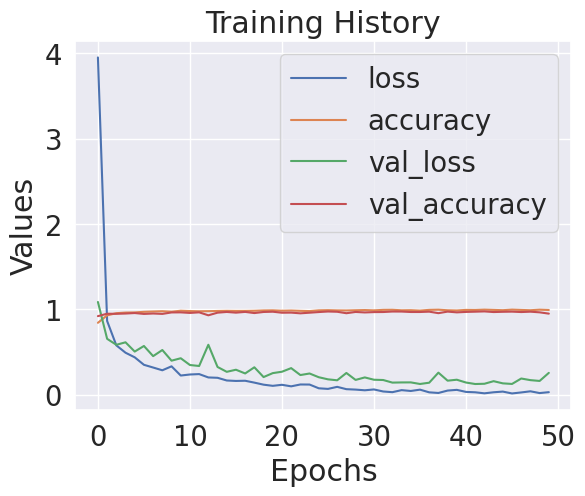

In [ ]:
history_data = pd.DataFrame(history.history)

# Create the plot
plt.plot(history_data)
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training History')
plt.grid(True)
plt.legend(history_data.columns)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_true = y_gs_test_encoded  # True labels (ground truth)

#test_images = [hex_x_test, en_x_test]


test_images = [np.load('hex_image.npy'),np.load('sh_image.npy')]
start_time = time.time()
y_pred = merged_model.predict(test_images)
end_time = time.time()
print(f"Prediction time: {end_time - start_time}")

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

classes = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# Generate the classification report
report_dict = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

print(report)

#Set the path and filename for the CSV file
file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ClassificationReports/"
file_name = "GS_SH_add_classification_report.csv"

report.to_csv(file_path + file_name)

103/103 [==============================] - 4s 35ms/step
Prediction time: 4.846254348754883
                precision    recall  f1-score      support
Lollipop         0.962382  0.971519  0.966929   316.000000
Kelihos_ver3     1.000000  0.623077  0.767773   130.000000
Gatak            0.995413  0.998849  0.997128   869.000000
Kelihos_ver1     0.998645  0.957143  0.977454   770.000000
Obfuscator.ACY   0.907731  0.978495  0.941785   372.000000
Simda            0.826888  0.993363  0.902513   452.000000
Tracur           0.666667  0.125000  0.210526    16.000000
Vundo            0.961749  0.800000  0.873449   220.000000
Ramnit           0.944444  0.978417  0.961131   139.000000
accuracy         0.950061  0.950061  0.950061     0.950061
macro avg        0.918213  0.825096  0.844299  3284.000000
weighted avg     0.954032  0.950061  0.947597  3284.000000


In [ ]:
from sklearn.metrics import confusion_matrix

label = np.arange(9)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, normalize = 'true')
print(conf_matrix)

[[0.97151899 0.         0.         0.         0.         0.02848101
  0.         0.         0.        ]
 [0.03076923 0.62307692 0.         0.         0.08461538 0.26153846
  0.         0.         0.        ]
 [0.00115075 0.         0.99884925 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.0038961  0.95714286 0.00909091 0.02857143
  0.         0.         0.0012987 ]
 [0.         0.         0.         0.         0.97849462 0.02150538
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.00663717 0.99336283
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.4375     0.
  0.125      0.4375     0.        ]
 [0.03181818 0.         0.         0.         0.03636364 0.09545455
  0.00454545 0.8        0.03181818]
 [0.         0.         0.00719424 0.00719424 0.00719424 0.
  0.         0.         0.97841727]]


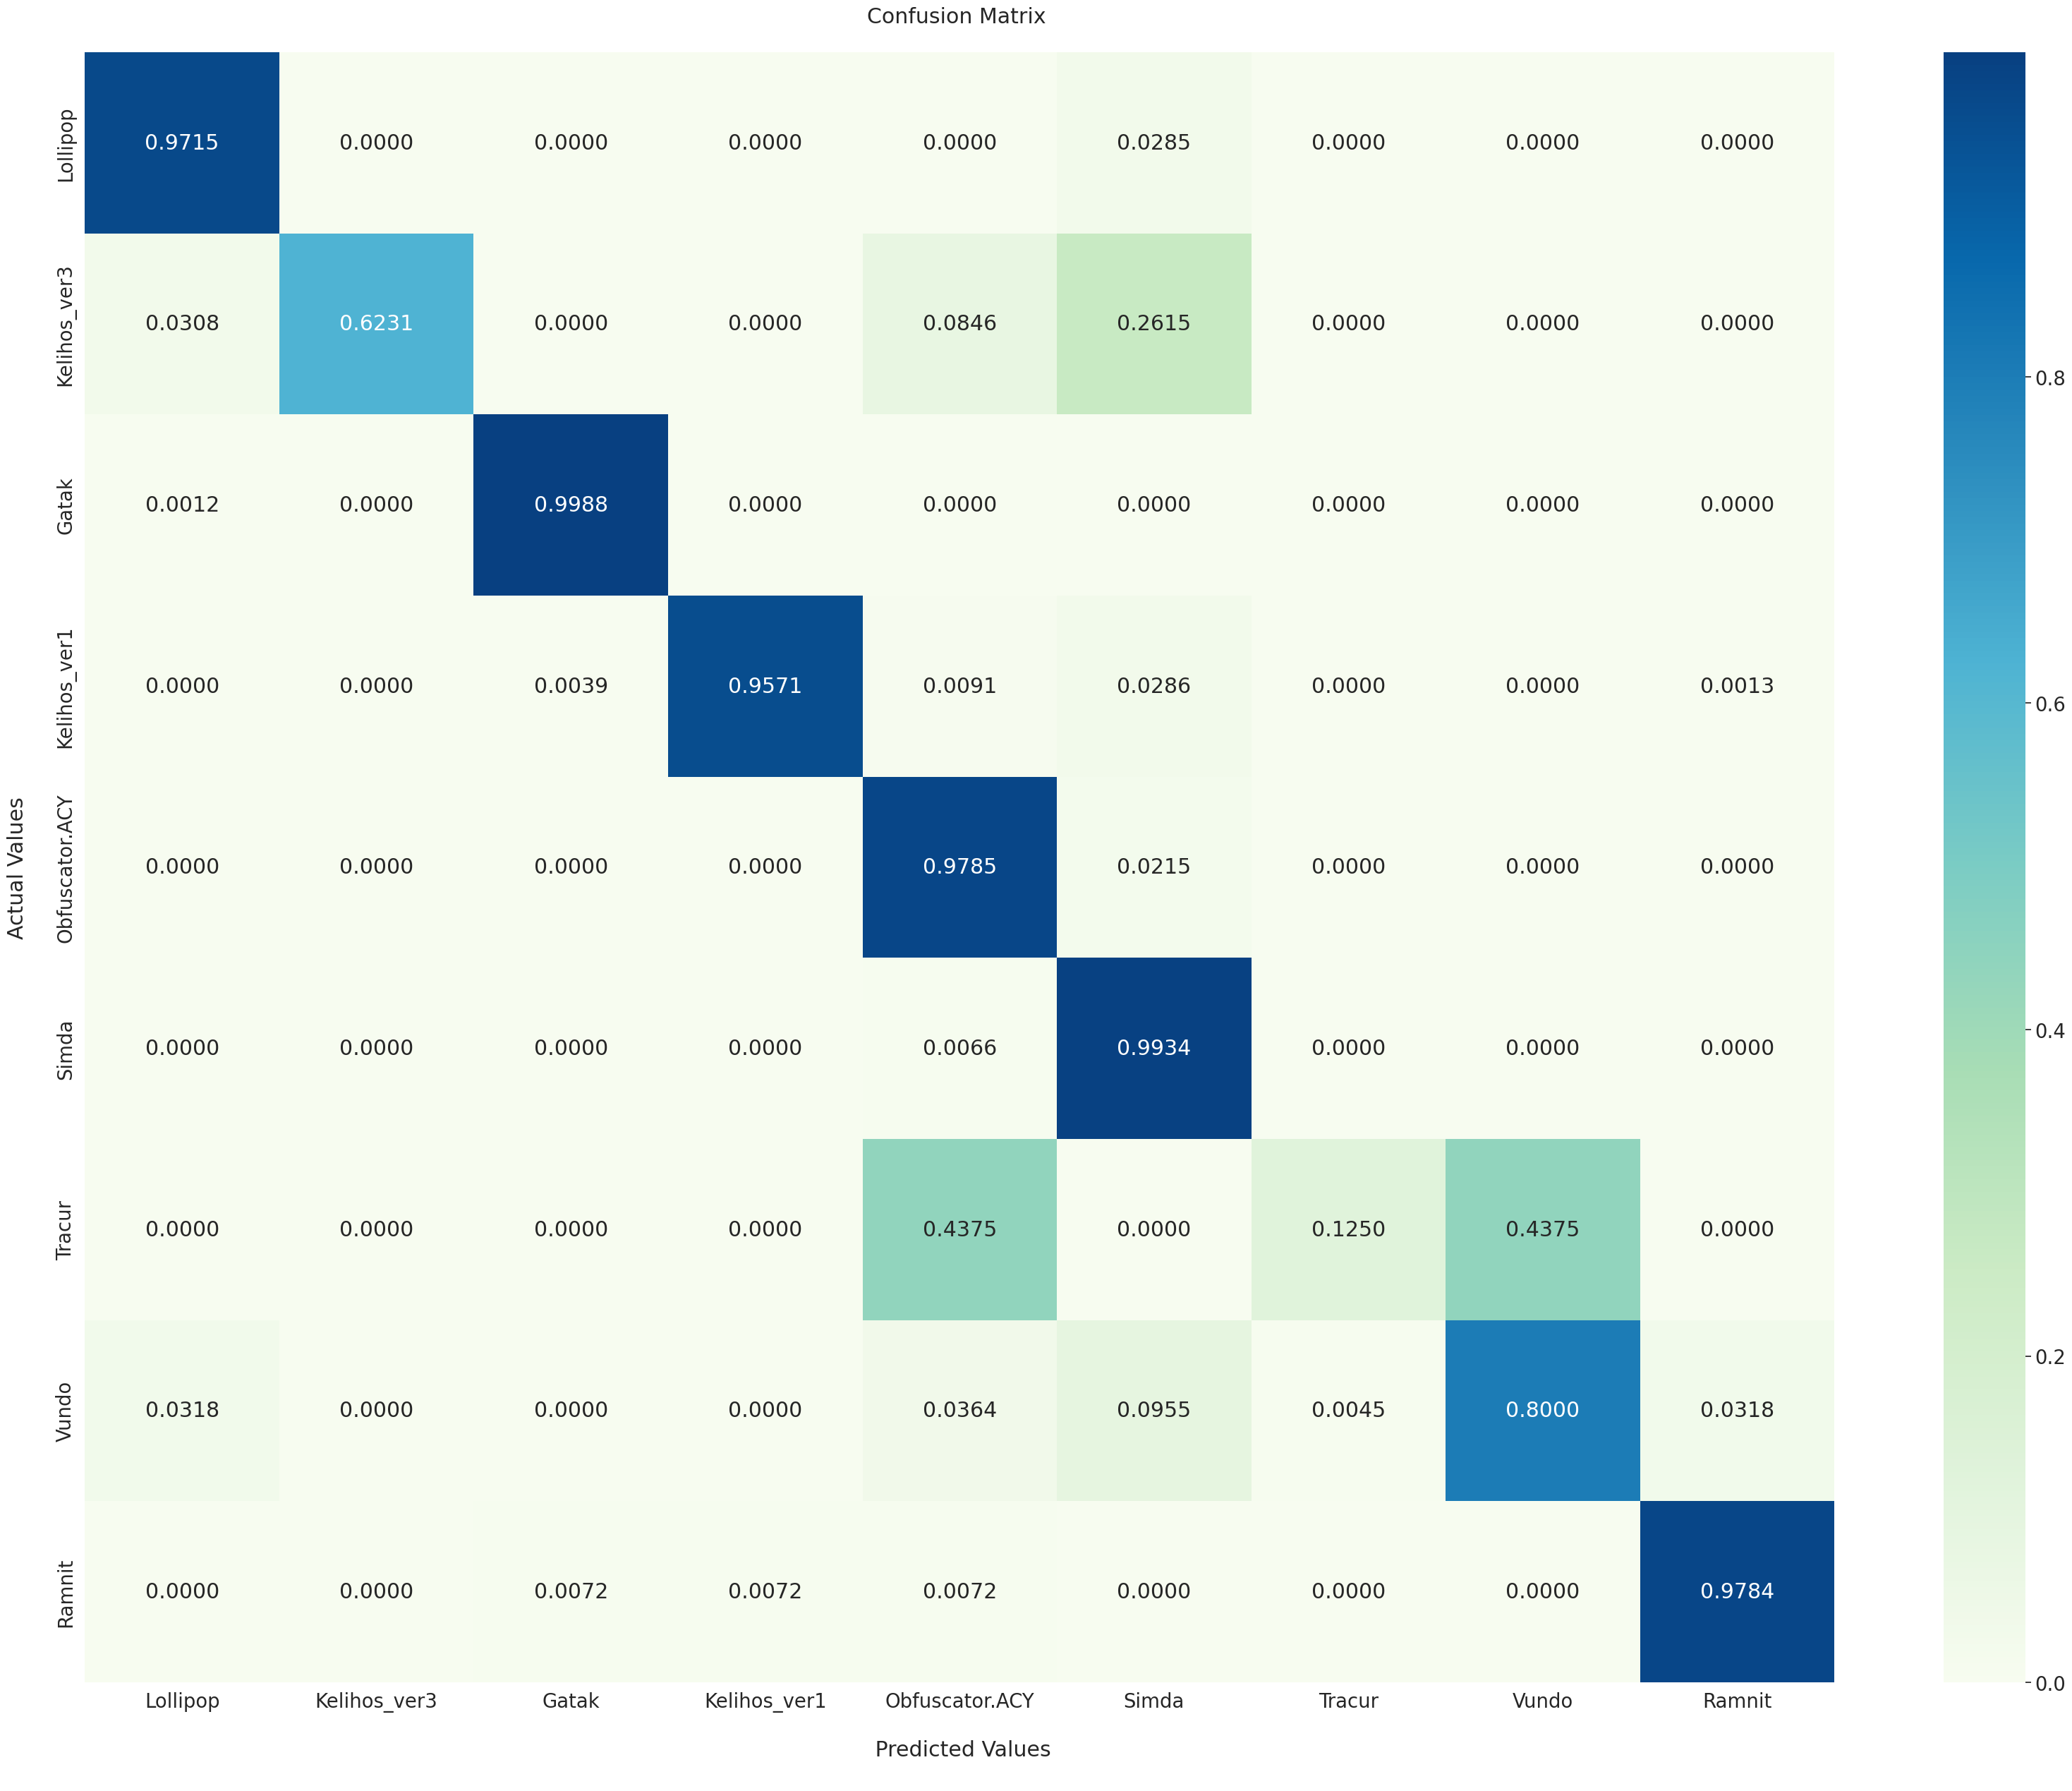

In [ ]:
# Visualizing confusion matrix
import seaborn as sns

plt.figure(figsize=(40,30))
sns.set(font_scale=1.8)
fx=sns.heatmap(conf_matrix, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)

file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ConfusionMetrics/"
file_name = "GS_SH_ADD_Confusion_Matrix.png"
plt.savefig(file_path + file_name)

plt.show()

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Macro F1-score: {macro_f1:.4f}')

Accuracy: 0.9501
Precision: 0.9540
Recall: 0.9501
F1-score: 0.9476
Macro F1-score: 0.8443


###**GS+SH(AVG)**

In [ ]:
# Concatenate the output of the 2 models
merged = average([hex_model, sh_model])

# Add one or more dense layers on top of the merged output
dense1 = Dense(256, activation = 'relu')(merged)
dense2 = Dense(128, activation = 'relu')(dense1)
dense3 = Dense(64, activation = 'relu',kernel_regularizer = l2(0.01))(dense2)
output = Dense(9, activation = 'softmax')(dense3)

# Define the model
merged_model = Model(inputs = [hex_in, sh_in], outputs = output, name = 'merged_model')

# Compile the model
merged_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = merged_model.fit(
    [x_gs_train, x_sh_train],
    y_gs_train_encoded,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=([x_gs_test, x_sh_test], y_gs_test_encoded)
)

Epoch 1/50
240/240 [==============================] - 16s 59ms/step - loss: 2.4623 - accuracy: 0.8500 - val_loss: 0.8749 - val_accuracy: 0.9318
Epoch 2/50
240/240 [==============================] - 13s 53ms/step - loss: 0.7756 - accuracy: 0.9436 - val_loss: 0.7194 - val_accuracy: 0.9330
Epoch 3/50
240/240 [==============================] - 13s 53ms/step - loss: 0.5030 - accuracy: 0.9629 - val_loss: 0.6050 - val_accuracy: 0.9418
Epoch 4/50
240/240 [==============================] - 13s 53ms/step - loss: 0.4295 - accuracy: 0.9688 - val_loss: 0.4719 - val_accuracy: 0.9546
Epoch 5/50
240/240 [==============================] - 13s 53ms/step - loss: 0.3741 - accuracy: 0.9688 - val_loss: 0.4350 - val_accuracy: 0.9613
Epoch 6/50
240/240 [==============================] - 13s 53ms/step - loss: 0.3256 - accuracy: 0.9727 - val_loss: 0.3945 - val_accuracy: 0.9622
Epoch 7/50
240/240 [==============================] - 13s 53ms/step - loss: 0.3033 - accuracy: 0.9749 - val_loss: 0.3774 - val_accuracy:

In [ ]:
# saving the first (hex_sh) model
merged_model.save('/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/Models/GS_SH_vgg(average).pkl')

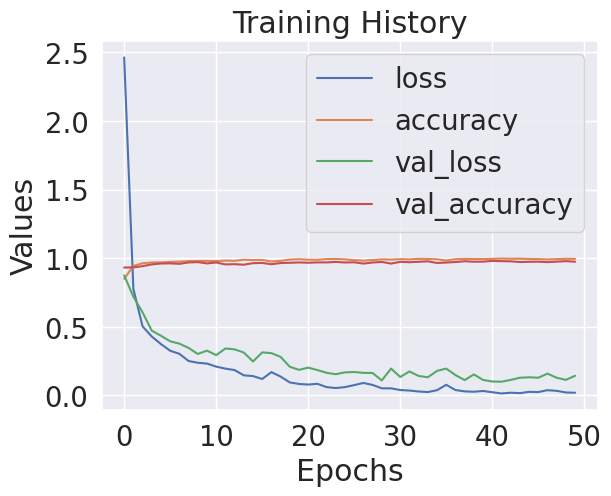

In [ ]:
history_data = pd.DataFrame(history.history)

# Create the plot
plt.plot(history_data)
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training History')
plt.grid(True)
plt.legend(history_data.columns)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_true = y_gs_test_encoded  # True labels (ground truth)


#test_images = [hex_x_test, en_x_test]

test_images = [np.load('hex_image.npy'),np.load('sh_image.npy')]
start_time = time.time()
y_pred = merged_model.predict(test_images)
end_time = time.time()
print(f"Prediction time: {end_time - start_time}")

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

classes = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# Generate the classification report
report_dict = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

print(report)

#Set the path and filename for the CSV file
file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ClassificationReports/"
file_name = "GS_SH_average_classification_report.csv"

report.to_csv(file_path + file_name)

103/103 [==============================] - 4s 34ms/step
Prediction time: 4.807839870452881
                precision    recall  f1-score      support
Lollipop         0.966258  0.996835  0.981308   316.000000
Kelihos_ver3     0.944000  0.907692  0.925490   130.000000
Gatak            0.996552  0.997699  0.997125   869.000000
Kelihos_ver1     0.996094  0.993506  0.994798   770.000000
Obfuscator.ACY   0.910670  0.986559  0.947097   372.000000
Simda            0.983834  0.942478  0.962712   452.000000
Tracur           0.666667  0.625000  0.645161    16.000000
Vundo            0.979798  0.881818  0.928230   220.000000
Ramnit           0.938356  0.985612  0.961404   139.000000
accuracy         0.974117  0.974117  0.974117     0.974117
macro avg        0.931359  0.924133  0.927036  3284.000000
weighted avg     0.974777  0.974117  0.973976  3284.000000


In [ ]:
from sklearn.metrics import confusion_matrix

label = np.arange(9)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, normalize = 'true')
print(conf_matrix)

[[0.99683544 0.         0.         0.         0.         0.00316456
  0.         0.         0.        ]
 [0.03846154 0.90769231 0.         0.         0.05384615 0.
  0.         0.         0.        ]
 [0.0023015  0.         0.9976985  0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.99350649 0.00519481 0.
  0.         0.         0.0012987 ]
 [0.         0.00537634 0.         0.         0.98655914 0.00806452
  0.         0.         0.        ]
 [0.00442478 0.01106195 0.00442478 0.00442478 0.03097345 0.94247788
  0.         0.00221239 0.        ]
 [0.         0.         0.         0.         0.1875     0.
  0.625      0.1875     0.        ]
 [0.00909091 0.         0.         0.00454545 0.03181818 0.01363636
  0.02272727 0.88181818 0.03636364]
 [0.         0.         0.00719424 0.         0.00719424 0.
  0.         0.         0.98561151]]


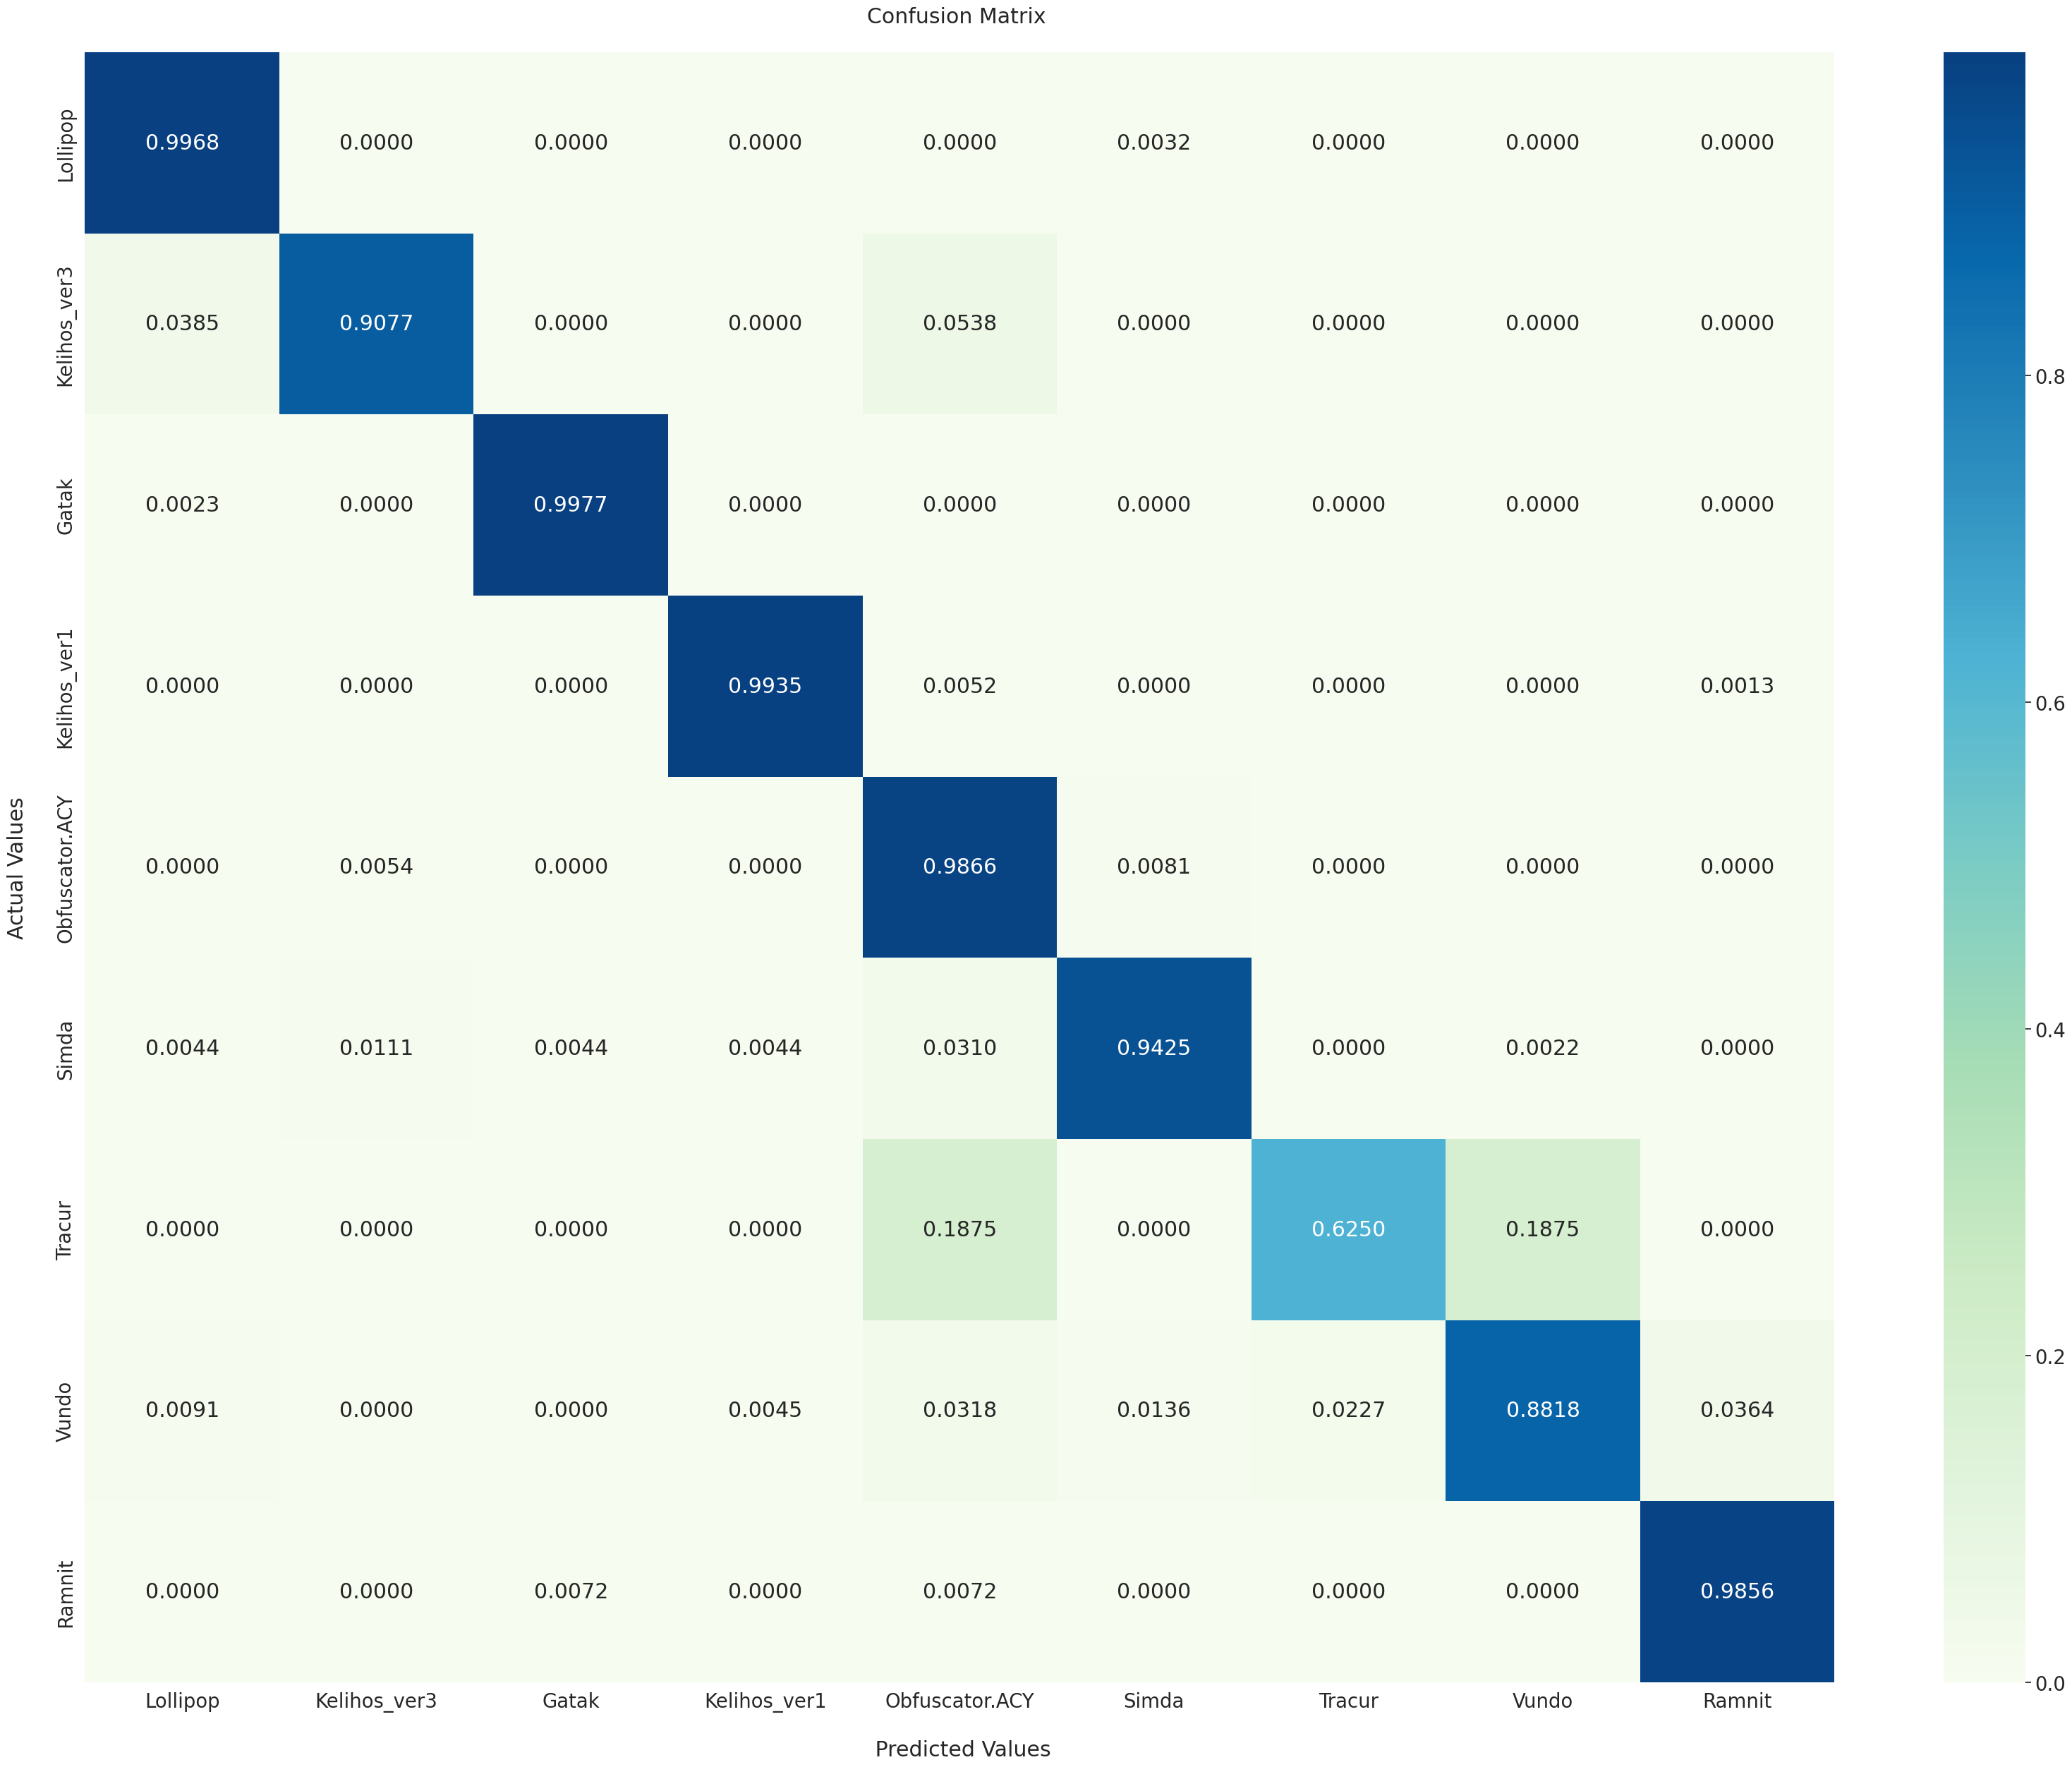

In [ ]:
# Visualizing confusion matrix
import seaborn as sns

plt.figure(figsize=(40,30))
sns.set(font_scale=1.8)
fx=sns.heatmap(conf_matrix, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)

file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ConfusionMetrics/"
file_name = "GS_SH_AVERAGE_Confusion_Matrix.png"
plt.savefig(file_path + file_name)

plt.show()

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Macro F1-score: {macro_f1:.4f}')

Accuracy: 0.9741
Precision: 0.9748
Recall: 0.9741
F1-score: 0.9740
Macro F1-score: 0.9270


###**GS+SH(MAX)**

In [ ]:
# Concatenate the output of the 2 models
merged = maximum([hex_model, sh_model])

# Add one or more dense layers on top of the merged output
dense1 = Dense(256, activation = 'relu')(merged)
dense2 = Dense(128, activation = 'relu')(dense1)
dense3 = Dense(64, activation = 'relu',kernel_regularizer = l2(0.01))(dense2)
output = Dense(9, activation = 'softmax')(dense3)

# Define the model
merged_model = Model(inputs = [hex_in, sh_in], outputs = output, name = 'merged_model')

# Compile the model
merged_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = merged_model.fit(
    [x_gs_train, x_sh_train],
    y_gs_train_encoded,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=([x_gs_test, x_sh_test], y_gs_test_encoded)
)

Epoch 1/50
240/240 [==============================] - 16s 59ms/step - loss: 4.9912 - accuracy: 0.8413 - val_loss: 1.2160 - val_accuracy: 0.9491
Epoch 2/50
240/240 [==============================] - 13s 54ms/step - loss: 1.1162 - accuracy: 0.9346 - val_loss: 1.0991 - val_accuracy: 0.9400
Epoch 3/50
240/240 [==============================] - 13s 53ms/step - loss: 0.8149 - accuracy: 0.9479 - val_loss: 0.7233 - val_accuracy: 0.9552
Epoch 4/50
240/240 [==============================] - 13s 53ms/step - loss: 0.5627 - accuracy: 0.9657 - val_loss: 0.6615 - val_accuracy: 0.9495
Epoch 5/50
240/240 [==============================] - 13s 53ms/step - loss: 0.5047 - accuracy: 0.9661 - val_loss: 0.6536 - val_accuracy: 0.9479
Epoch 6/50
240/240 [==============================] - 13s 53ms/step - loss: 0.4528 - accuracy: 0.9692 - val_loss: 0.6279 - val_accuracy: 0.9513
Epoch 7/50
240/240 [==============================] - 13s 53ms/step - loss: 0.4578 - accuracy: 0.9650 - val_loss: 0.5689 - val_accuracy:

In [ ]:
# saving the first (hex_en) model
merged_model.save('/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/Models/GS_SH_vgg(maximum).pkl')

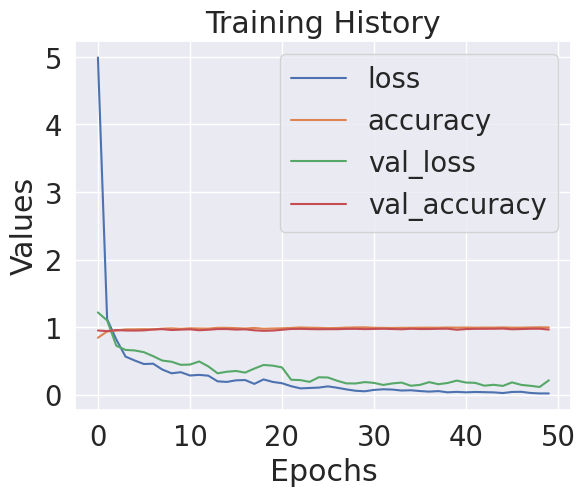

In [ ]:
history_data = pd.DataFrame(history.history)

# Create the plot
plt.plot(history_data)
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training History')
plt.grid(True)
plt.legend(history_data.columns)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_true = y_gs_test_encoded  # True labels (ground truth)


#test_images = [hex_x_test, en_x_test]

test_images = [np.load('hex_image.npy'),np.load('sh_image.npy')]
start_time = time.time()
y_pred = merged_model.predict(test_images)
end_time = time.time()
print(f"Prediction time: {end_time - start_time}")

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

classes = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# Generate the classification report
report_dict = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

print(report)

#Set the path and filename for the CSV file
file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ClassificationReports/"
file_name = "GS_SH_maximum_classification_report.csv"

report.to_csv(file_path + file_name)

103/103 [==============================] - 4s 35ms/step
Prediction time: 4.885083198547363
                precision    recall  f1-score     support
Lollipop         0.996774  0.977848  0.987220   316.00000
Kelihos_ver3     0.906475  0.969231  0.936803   130.00000
Gatak            0.996556  0.998849  0.997701   869.00000
Kelihos_ver1     1.000000  0.950649  0.974700   770.00000
Obfuscator.ACY   0.838636  0.991935  0.908867   372.00000
Simda            0.974118  0.915929  0.944128   452.00000
Tracur           0.500000  0.125000  0.200000    16.00000
Vundo            0.929204  0.954545  0.941704   220.00000
Ramnit           0.963504  0.949640  0.956522   139.00000
accuracy         0.962850  0.962850  0.962850     0.96285
macro avg        0.900585  0.870403  0.871961  3284.00000
weighted avg     0.964511  0.962850  0.962072  3284.00000


In [ ]:
from sklearn.metrics import confusion_matrix

label = np.arange(9)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, normalize = 'true')
print(conf_matrix)

[[0.9778481  0.         0.         0.         0.01582278 0.
  0.         0.00632911 0.        ]
 [0.         0.96923077 0.         0.         0.03076923 0.
  0.         0.         0.        ]
 [0.00115075 0.         0.99884925 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.0038961  0.0038961  0.95064935 0.02597403 0.01298701
  0.0012987  0.0012987  0.        ]
 [0.         0.         0.         0.         0.99193548 0.00268817
  0.         0.00537634 0.        ]
 [0.         0.01548673 0.         0.         0.06858407 0.9159292
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.375      0.
  0.125      0.5        0.        ]
 [0.         0.00454545 0.         0.         0.01363636 0.
  0.00454545 0.95454545 0.02272727]
 [0.         0.01438849 0.         0.         0.01438849 0.
  0.         0.02158273 0.94964029]]


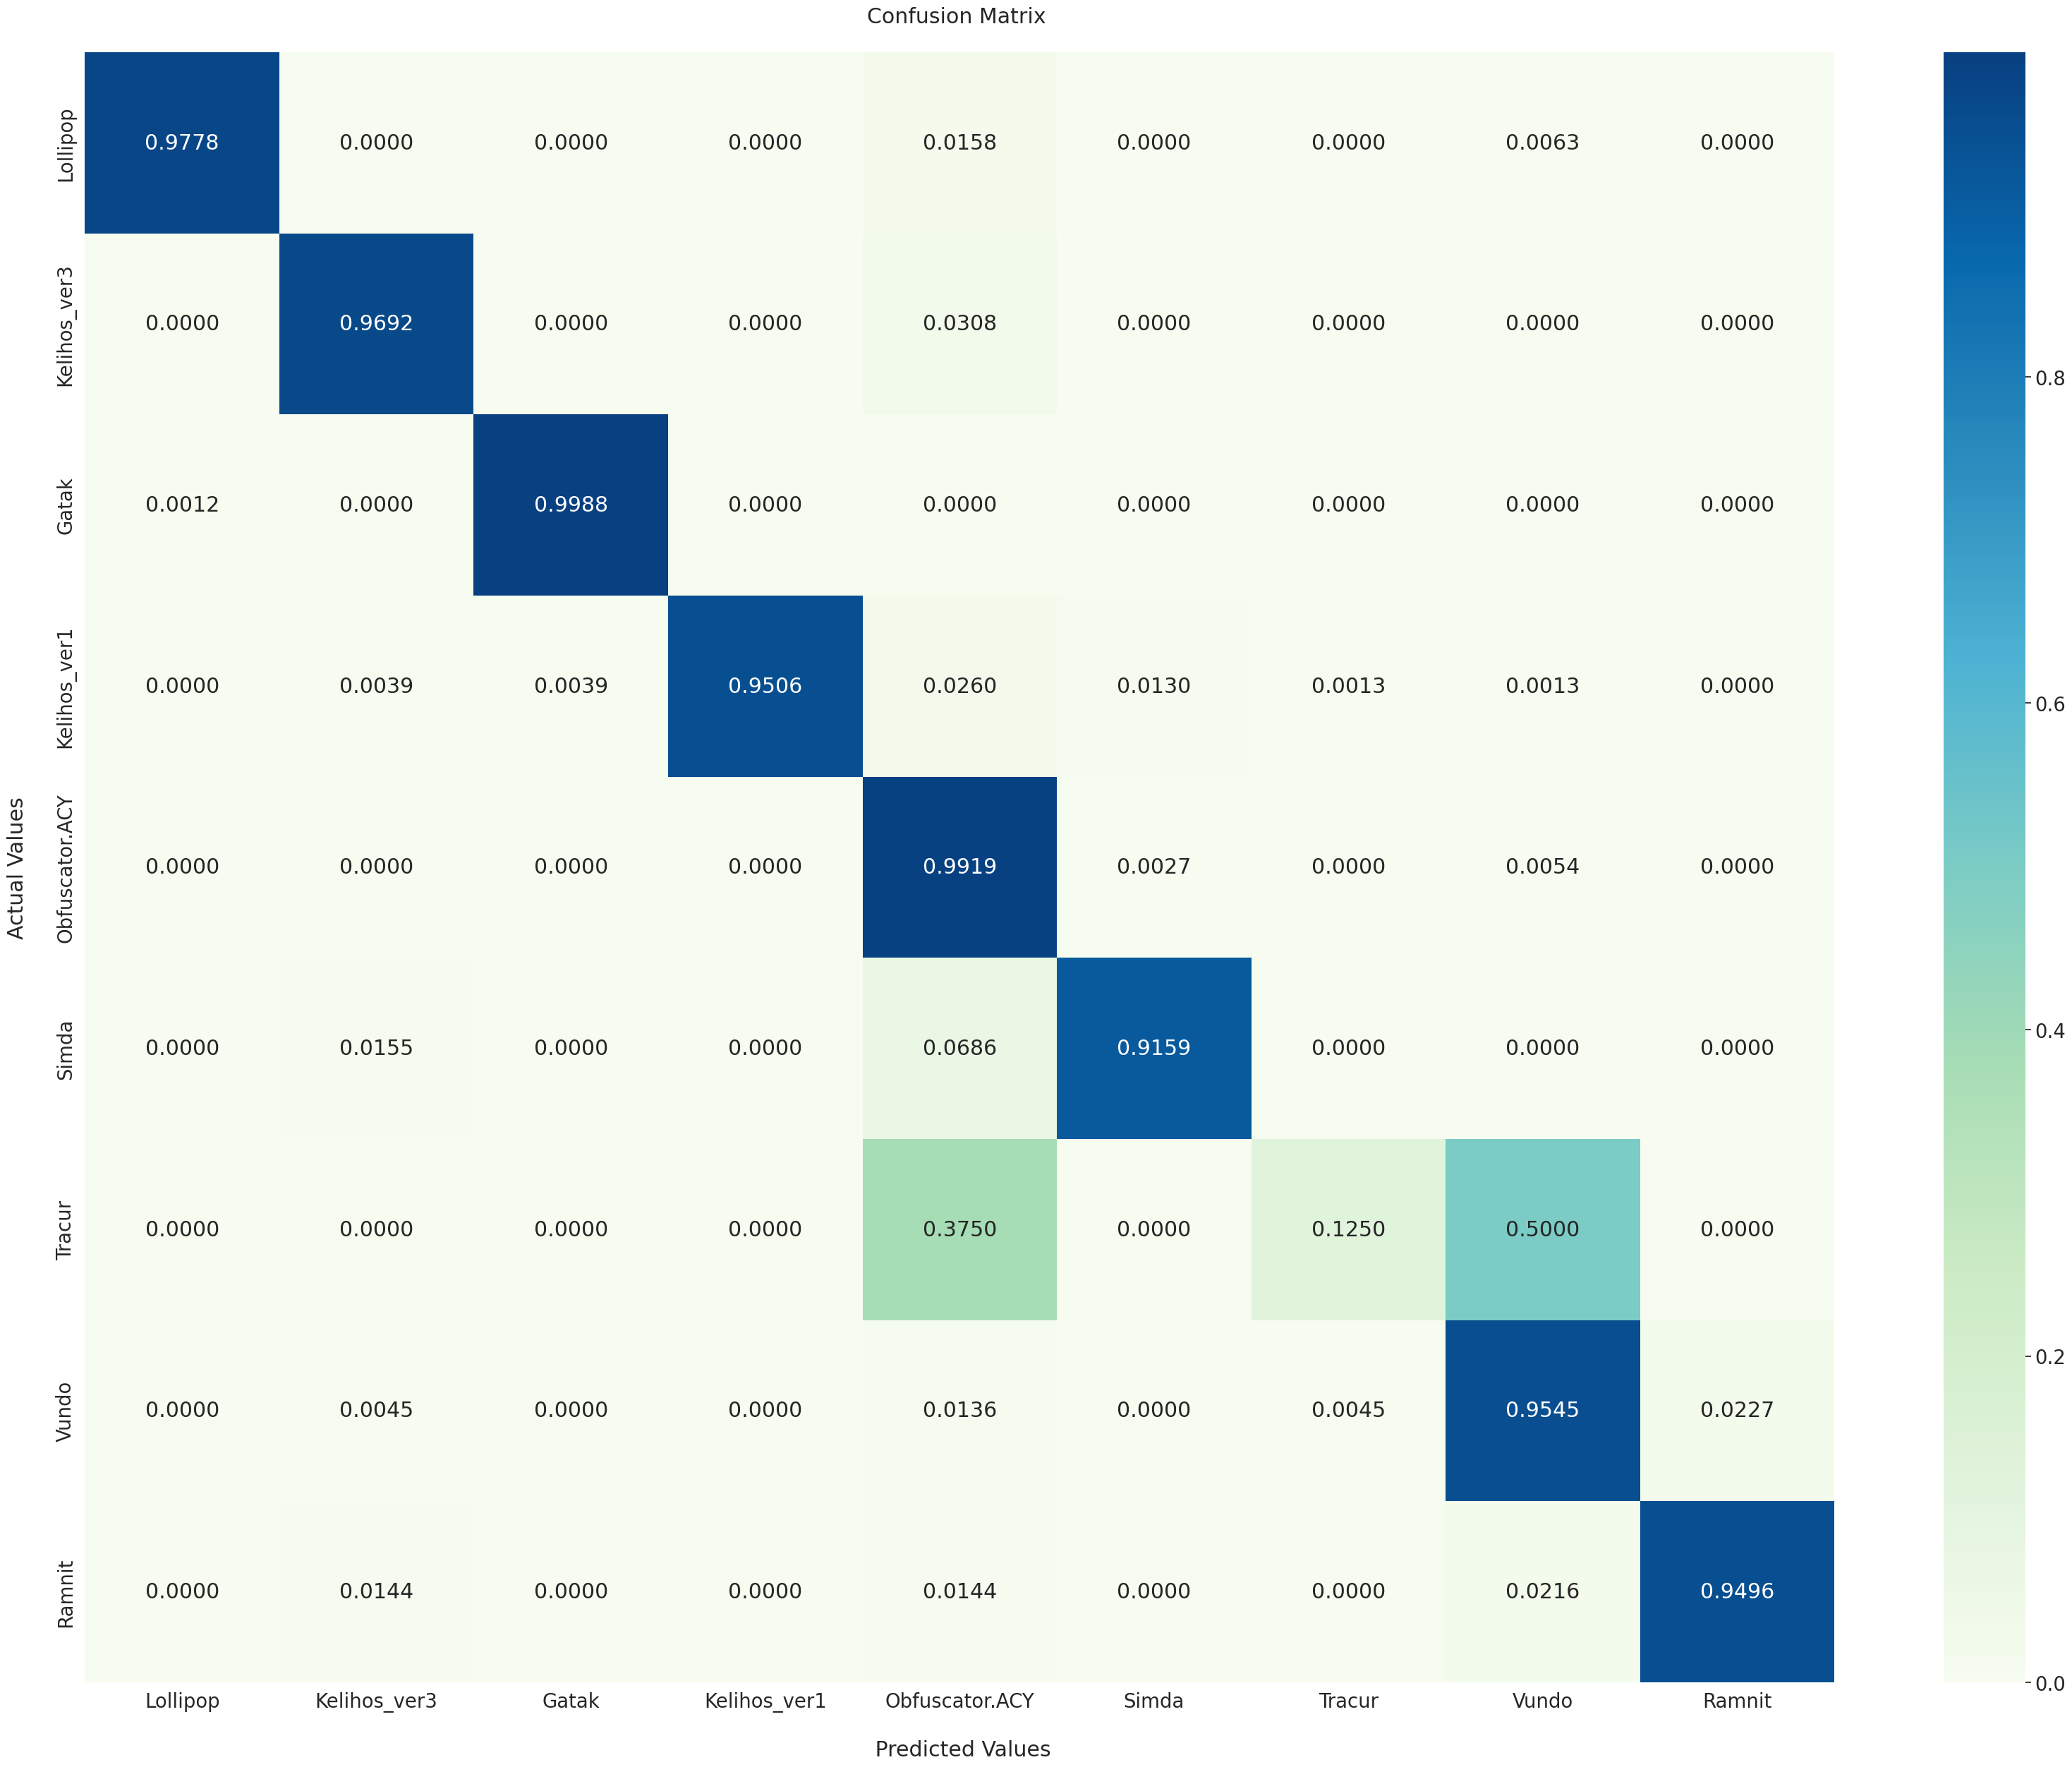

In [ ]:
# Visualizing confusion matrix
import seaborn as sns

plt.figure(figsize=(40,30))
sns.set(font_scale=1.8)
fx=sns.heatmap(conf_matrix, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)

file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ConfusionMetrics/"
file_name = "GS_SH_MAXIMUM_Confusion_Matrix.png"
plt.savefig(file_path + file_name)

plt.show()

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Macro F1-score: {macro_f1:.4f}')

Accuracy: 0.9629
Precision: 0.9645
Recall: 0.9629
F1-score: 0.9621
Macro F1-score: 0.8720


###**GS+SH(CONCAT)**

In [ ]:
# Concatenate the output of the 2 models
merged = concatenate([hex_model, sh_model])

# Add one or more dense layers on top of the merged output
dense1 = Dense(256, activation = 'relu')(merged)
dense2 = Dense(128, activation = 'relu')(dense1)
dense3 = Dense(64, activation = 'relu',kernel_regularizer = l2(0.01))(dense2)
output = Dense(9, activation = 'softmax')(dense3)

# Define the model
merged_model = Model(inputs = [hex_in, sh_in], outputs = output, name = 'merged_model')

# Compile the model
merged_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = merged_model.fit(
    [x_gs_train, x_sh_train],
    y_gs_train_encoded,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=([x_gs_test, x_sh_test], y_gs_test_encoded)
)

Epoch 1/50
240/240 [==============================] - 16s 61ms/step - loss: 3.4325 - accuracy: 0.8644 - val_loss: 1.1093 - val_accuracy: 0.9443
Epoch 2/50
240/240 [==============================] - 13s 54ms/step - loss: 0.8530 - accuracy: 0.9537 - val_loss: 1.2646 - val_accuracy: 0.9111
Epoch 3/50
240/240 [==============================] - 13s 54ms/step - loss: 0.6007 - accuracy: 0.9637 - val_loss: 0.6451 - val_accuracy: 0.9647
Epoch 4/50
240/240 [==============================] - 13s 54ms/step - loss: 0.5128 - accuracy: 0.9687 - val_loss: 0.6968 - val_accuracy: 0.9467
Epoch 5/50
240/240 [==============================] - 13s 54ms/step - loss: 0.3793 - accuracy: 0.9770 - val_loss: 1.0246 - val_accuracy: 0.9245
Epoch 6/50
240/240 [==============================] - 13s 54ms/step - loss: 0.4086 - accuracy: 0.9735 - val_loss: 0.3966 - val_accuracy: 0.9677
Epoch 7/50
240/240 [==============================] - 13s 54ms/step - loss: 0.2876 - accuracy: 0.9829 - val_loss: 0.3885 - val_accuracy:

In [ ]:
# saving the first (hex_en) model
merged_model.save('/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/Models/GS_SH_vgg(concat).pkl')

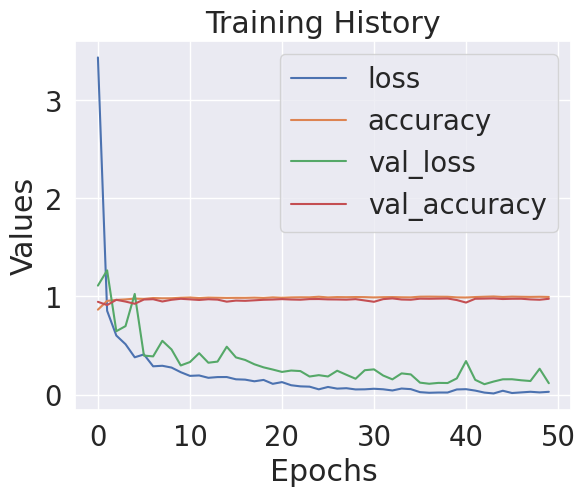

In [ ]:
history_data = pd.DataFrame(history.history)

# Create the plot
plt.plot(history_data)
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training History')
plt.grid(True)
plt.legend(history_data.columns)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_true = y_gs_test_encoded  # True labels (ground truth)


#test_images = [hex_x_test, en_x_test]

test_images = [np.load('hex_image.npy'), np.load('sh_image.npy')]
start_time = time.time()
y_pred = merged_model.predict(test_images)
end_time = time.time()
print(f"Prediction time: {end_time - start_time}")

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

classes = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# Generate the classification report
report_dict = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

print(report)

#Set the path and filename for the CSV file
file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ClassificationReports/"
file_name = "GS_SH_concat_classification_report.csv"

report.to_csv(file_path + file_name)

103/103 [==============================] - 4s 34ms/step
Prediction time: 4.7962141036987305
                precision    recall  f1-score     support
Lollipop         0.960486  1.000000  0.979845   316.00000
Kelihos_ver3     0.938931  0.946154  0.942529   130.00000
Gatak            0.996556  0.998849  0.997701   869.00000
Kelihos_ver1     0.996084  0.990909  0.993490   770.00000
Obfuscator.ACY   0.974576  0.927419  0.950413   372.00000
Simda            0.977778  0.973451  0.975610   452.00000
Tracur           0.636364  0.437500  0.518519    16.00000
Vundo            0.878661  0.954545  0.915033   220.00000
Ramnit           0.977444  0.935252  0.955882   139.00000
accuracy         0.975030  0.975030  0.975030     0.97503
macro avg        0.926320  0.907120  0.914336  3284.00000
weighted avg     0.975157  0.975030  0.974771  3284.00000


In [ ]:
from sklearn.metrics import confusion_matrix

label = np.arange(9)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, normalize = 'true')
print(conf_matrix)

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.03846154 0.94615385 0.         0.         0.00769231 0.
  0.         0.00769231 0.        ]
 [0.00115075 0.         0.99884925 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.0012987  0.0038961  0.99090909 0.0012987  0.0025974
  0.         0.         0.        ]
 [0.00537634 0.         0.         0.00537634 0.92741935 0.0188172
  0.         0.04301075 0.        ]
 [0.00442478 0.01106195 0.         0.00221239 0.00663717 0.97345133
  0.00221239 0.         0.        ]
 [0.         0.         0.         0.         0.125      0.
  0.4375     0.4375     0.        ]
 [0.00909091 0.00454545 0.         0.         0.         0.00454545
  0.01363636 0.95454545 0.01363636]
 [0.00719424 0.00719424 0.         0.         0.01438849 0.
  0.         0.03597122 0.9352518 ]]


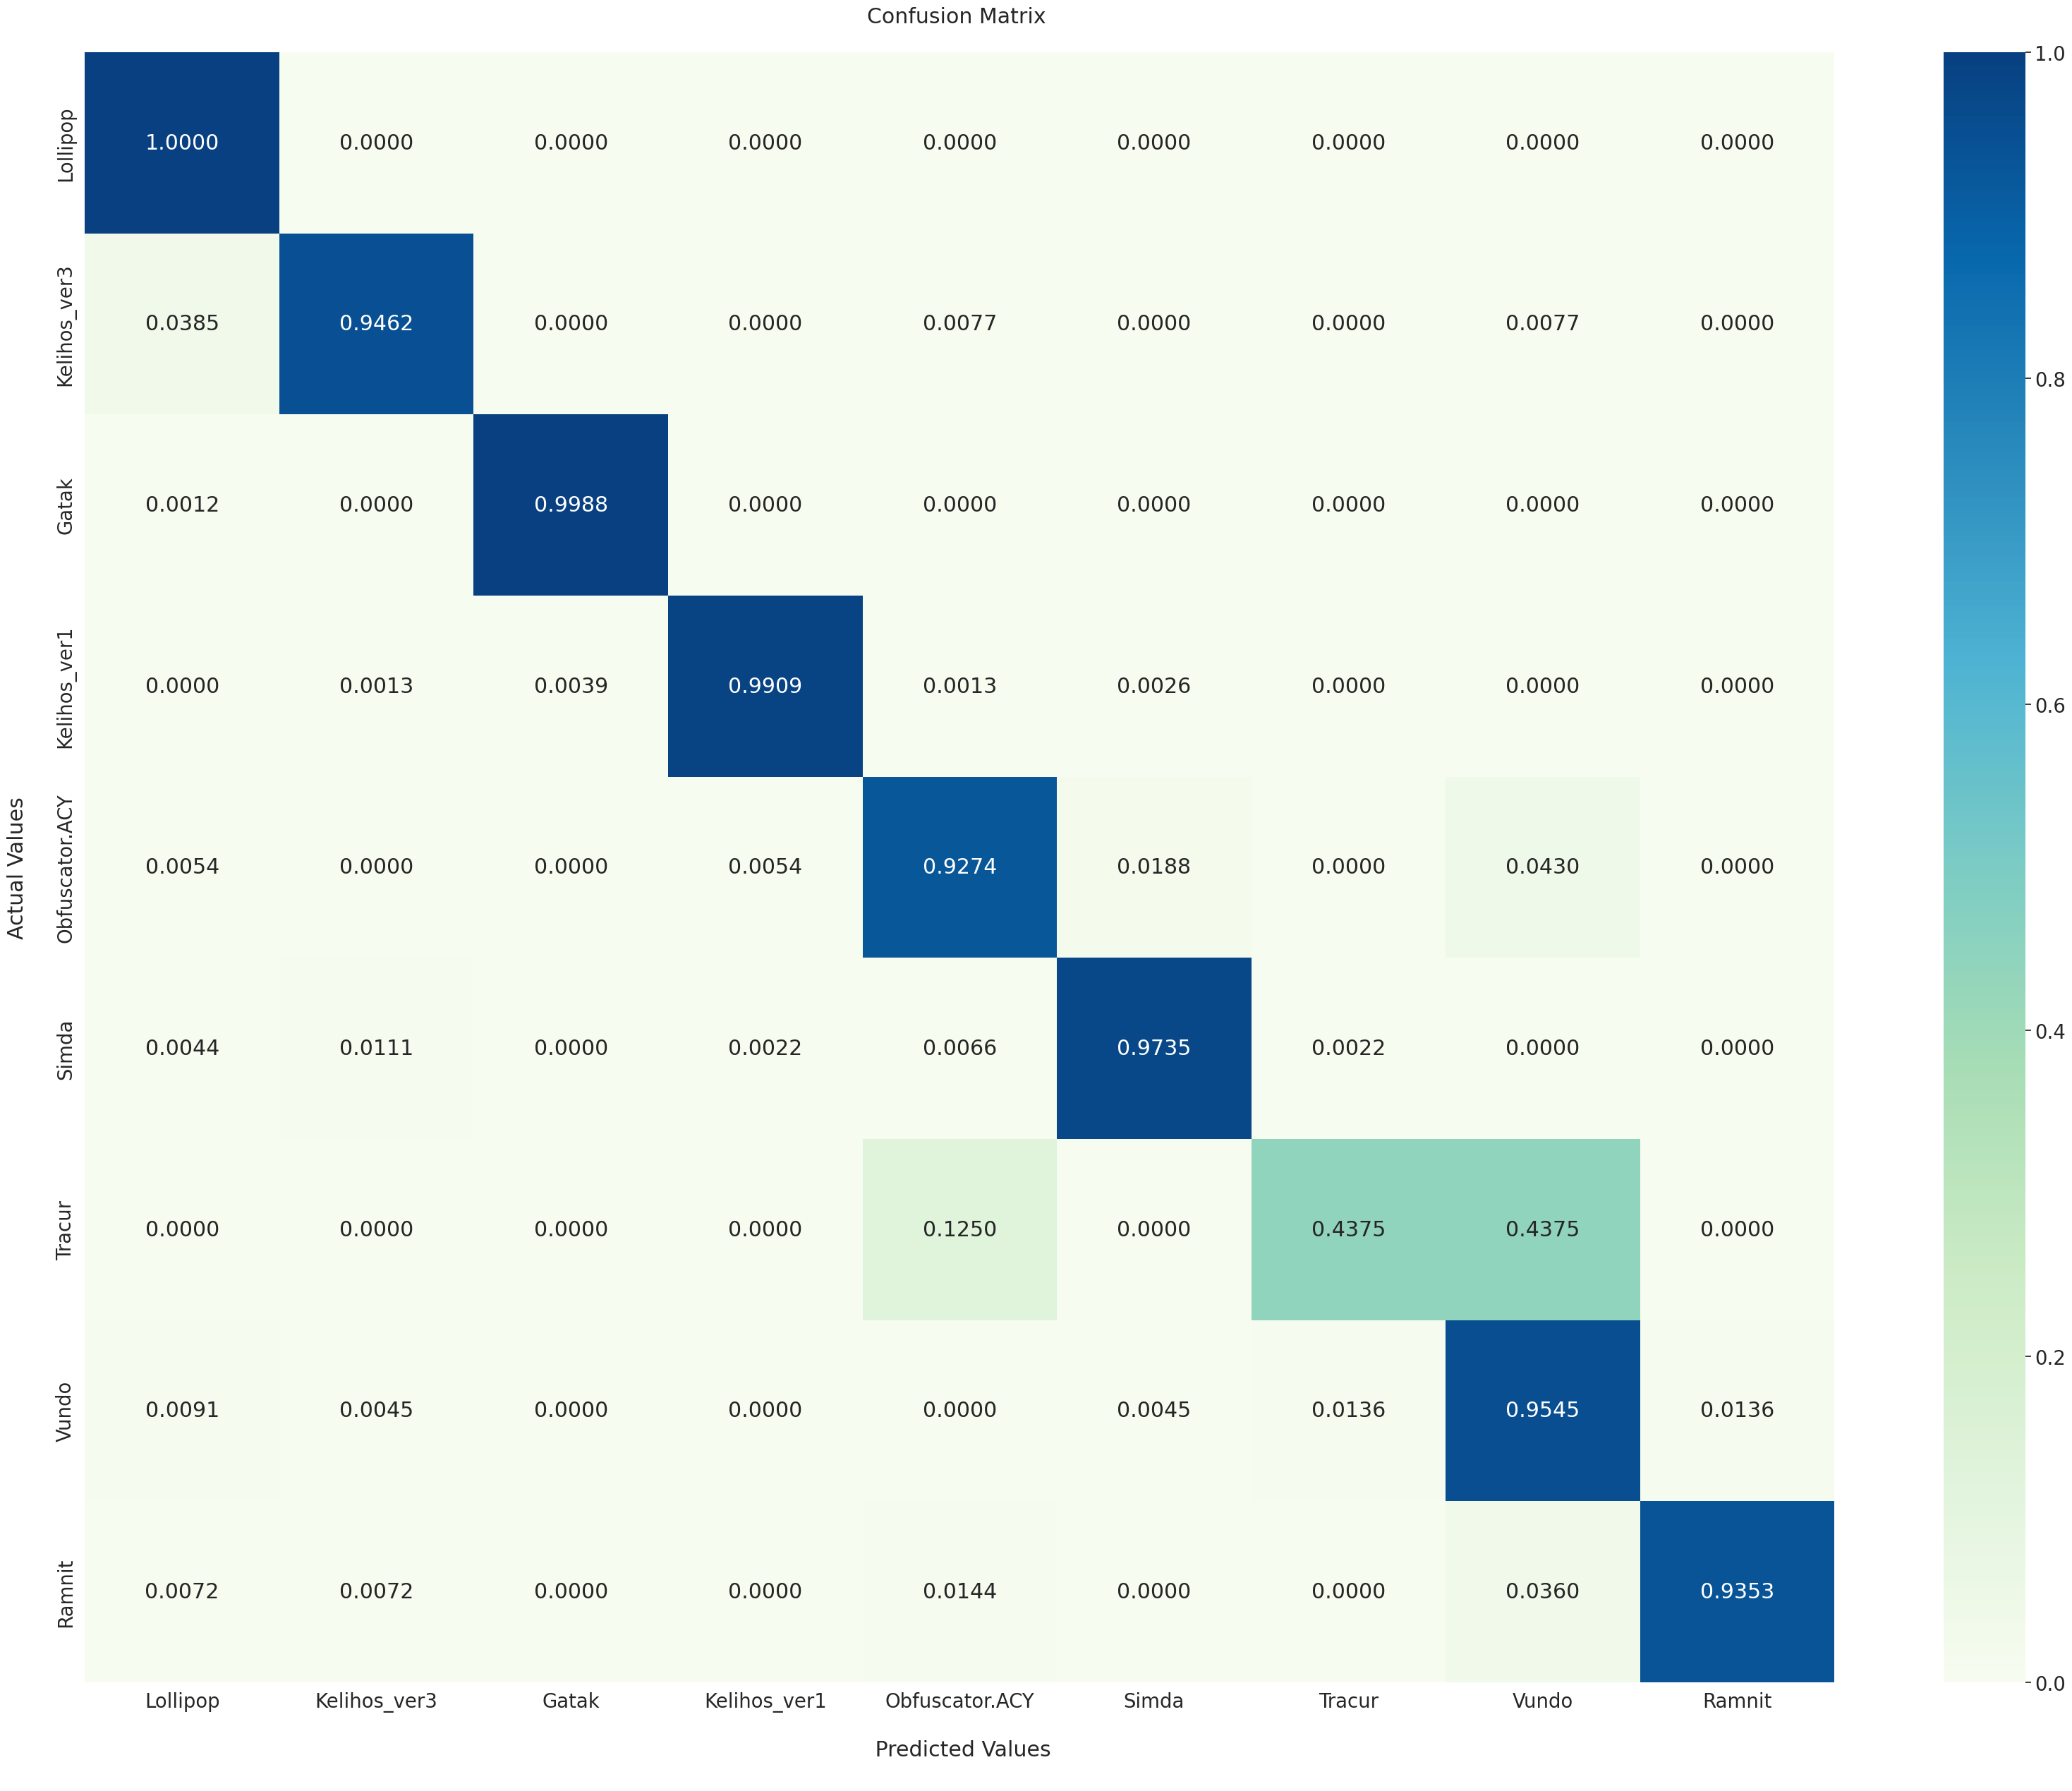

In [ ]:
# Visualizing confusion matrix
import seaborn as sns

plt.figure(figsize=(40,30))
sns.set(font_scale=1.8)
fx=sns.heatmap(conf_matrix, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)

file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ConfusionMetrics/"
file_name = "GS_EG_SH_CONCAT_Confusion_Matrix.png"
plt.savefig(file_path + file_name)

plt.show()

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Macro F1-score: {macro_f1:.4f}')

Accuracy: 0.9750
Precision: 0.9752
Recall: 0.9750
F1-score: 0.9748
Macro F1-score: 0.9143


##**EG+SH**

###**EG+SH(ADD)**

In [ ]:
# Concatenate the output of the 2 models
merged = add([eg_model, sh_model])

# Add one or more dense layers on top of the merged output
dense1 = Dense(256, activation = 'relu')(merged)
dense2 = Dense(128, activation = 'relu')(dense1)
dense3 = Dense(64, activation = 'relu',kernel_regularizer = l2(0.01))(dense2)
output = Dense(9, activation = 'softmax')(dense3)

# Define the model
merged_model = Model(inputs = [eg_in, sh_in], outputs = output, name = 'merged_model')

# Compile the model
merged_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = merged_model.fit(
    [x_eg_train, x_sh_train],
    y_gs_train_encoded,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=([x_eg_test, x_sh_test], y_gs_test_encoded)
)

Epoch 1/50
240/240 [==============================] - 16s 59ms/step - loss: 4.3876 - accuracy: 0.8067 - val_loss: 1.6936 - val_accuracy: 0.8593
Epoch 2/50
240/240 [==============================] - 13s 54ms/step - loss: 1.1527 - accuracy: 0.8965 - val_loss: 1.0350 - val_accuracy: 0.8937
Epoch 3/50
240/240 [==============================] - 13s 53ms/step - loss: 0.8413 - accuracy: 0.9124 - val_loss: 0.6969 - val_accuracy: 0.9077
Epoch 4/50
240/240 [==============================] - 13s 53ms/step - loss: 0.5761 - accuracy: 0.9333 - val_loss: 0.7041 - val_accuracy: 0.9065
Epoch 5/50
240/240 [==============================] - 13s 54ms/step - loss: 0.5191 - accuracy: 0.9380 - val_loss: 0.7016 - val_accuracy: 0.9129
Epoch 6/50
240/240 [==============================] - 13s 54ms/step - loss: 0.4480 - accuracy: 0.9424 - val_loss: 0.5396 - val_accuracy: 0.9272
Epoch 7/50
240/240 [==============================] - 13s 53ms/step - loss: 0.3885 - accuracy: 0.9486 - val_loss: 0.5301 - val_accuracy:

In [ ]:
# saving the first (hex_en) model
merged_model.save('/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/Models/EG_SH_vgg(add).pkl')

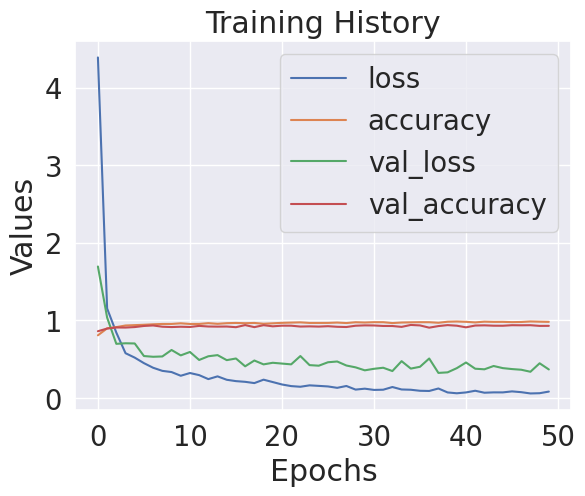

In [ ]:
history_data = pd.DataFrame(history.history)

# Create the plot
plt.plot(history_data)
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training History')
plt.grid(True)
plt.legend(history_data.columns)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_true = y_gs_test_encoded  # True labels (ground truth)


#test_images = [hex_x_test, en_x_test]

test_images = [np.load('eg_image.npy'),np.load('sh_image.npy')]
start_time = time.time()
y_pred = merged_model.predict(test_images)
end_time = time.time()
print(f"Prediction time: {end_time - start_time}")

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

classes = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# Generate the classification report
report_dict = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

print(report)

#Set the path and filename for the CSV file
file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ClassificationReports/"
file_name = "EG_SH_add_classification_report.csv"

report.to_csv(file_path + file_name)

103/103 [==============================] - 4s 35ms/step
Prediction time: 4.866202116012573
                precision    recall  f1-score      support
Lollipop         0.809264  0.939873  0.869693   316.000000
Kelihos_ver3     0.831683  0.646154  0.727273   130.000000
Gatak            0.978286  0.985040  0.981651   869.000000
Kelihos_ver1     0.988032  0.964935  0.976347   770.000000
Obfuscator.ACY   0.832547  0.948925  0.886935   372.000000
Simda            0.960396  0.858407  0.906542   452.000000
Tracur           0.000000  0.000000  0.000000    16.000000
Vundo            0.912442  0.900000  0.906178   220.000000
Ramnit           0.935714  0.942446  0.939068   139.000000
accuracy         0.928745  0.928745  0.928745     0.928745
macro avg        0.805374  0.798420  0.799299  3284.000000
weighted avg     0.928553  0.928745  0.926857  3284.000000


In [ ]:
from sklearn.metrics import confusion_matrix

label = np.arange(9)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, normalize = 'true')
print(conf_matrix)

[[0.93987342 0.0443038  0.00949367 0.00316456 0.         0.00316456
  0.         0.         0.        ]
 [0.2        0.64615385 0.         0.         0.15384615 0.
  0.         0.         0.        ]
 [0.01495972 0.         0.98504028 0.         0.         0.
  0.         0.         0.        ]
 [0.0012987  0.         0.01428571 0.96493506 0.00649351 0.01298701
  0.         0.         0.        ]
 [0.02150538 0.00537634 0.00268817 0.00806452 0.94892473 0.01075269
  0.00268817 0.         0.        ]
 [0.03318584 0.         0.00663717 0.00442478 0.09070796 0.85840708
  0.         0.00663717 0.        ]
 [0.         0.         0.         0.         0.25       0.
  0.         0.75       0.        ]
 [0.02727273 0.         0.         0.00909091 0.00454545 0.00454545
  0.01363636 0.9        0.04090909]
 [0.00719424 0.00719424 0.00719424 0.00719424 0.         0.
  0.         0.02877698 0.94244604]]


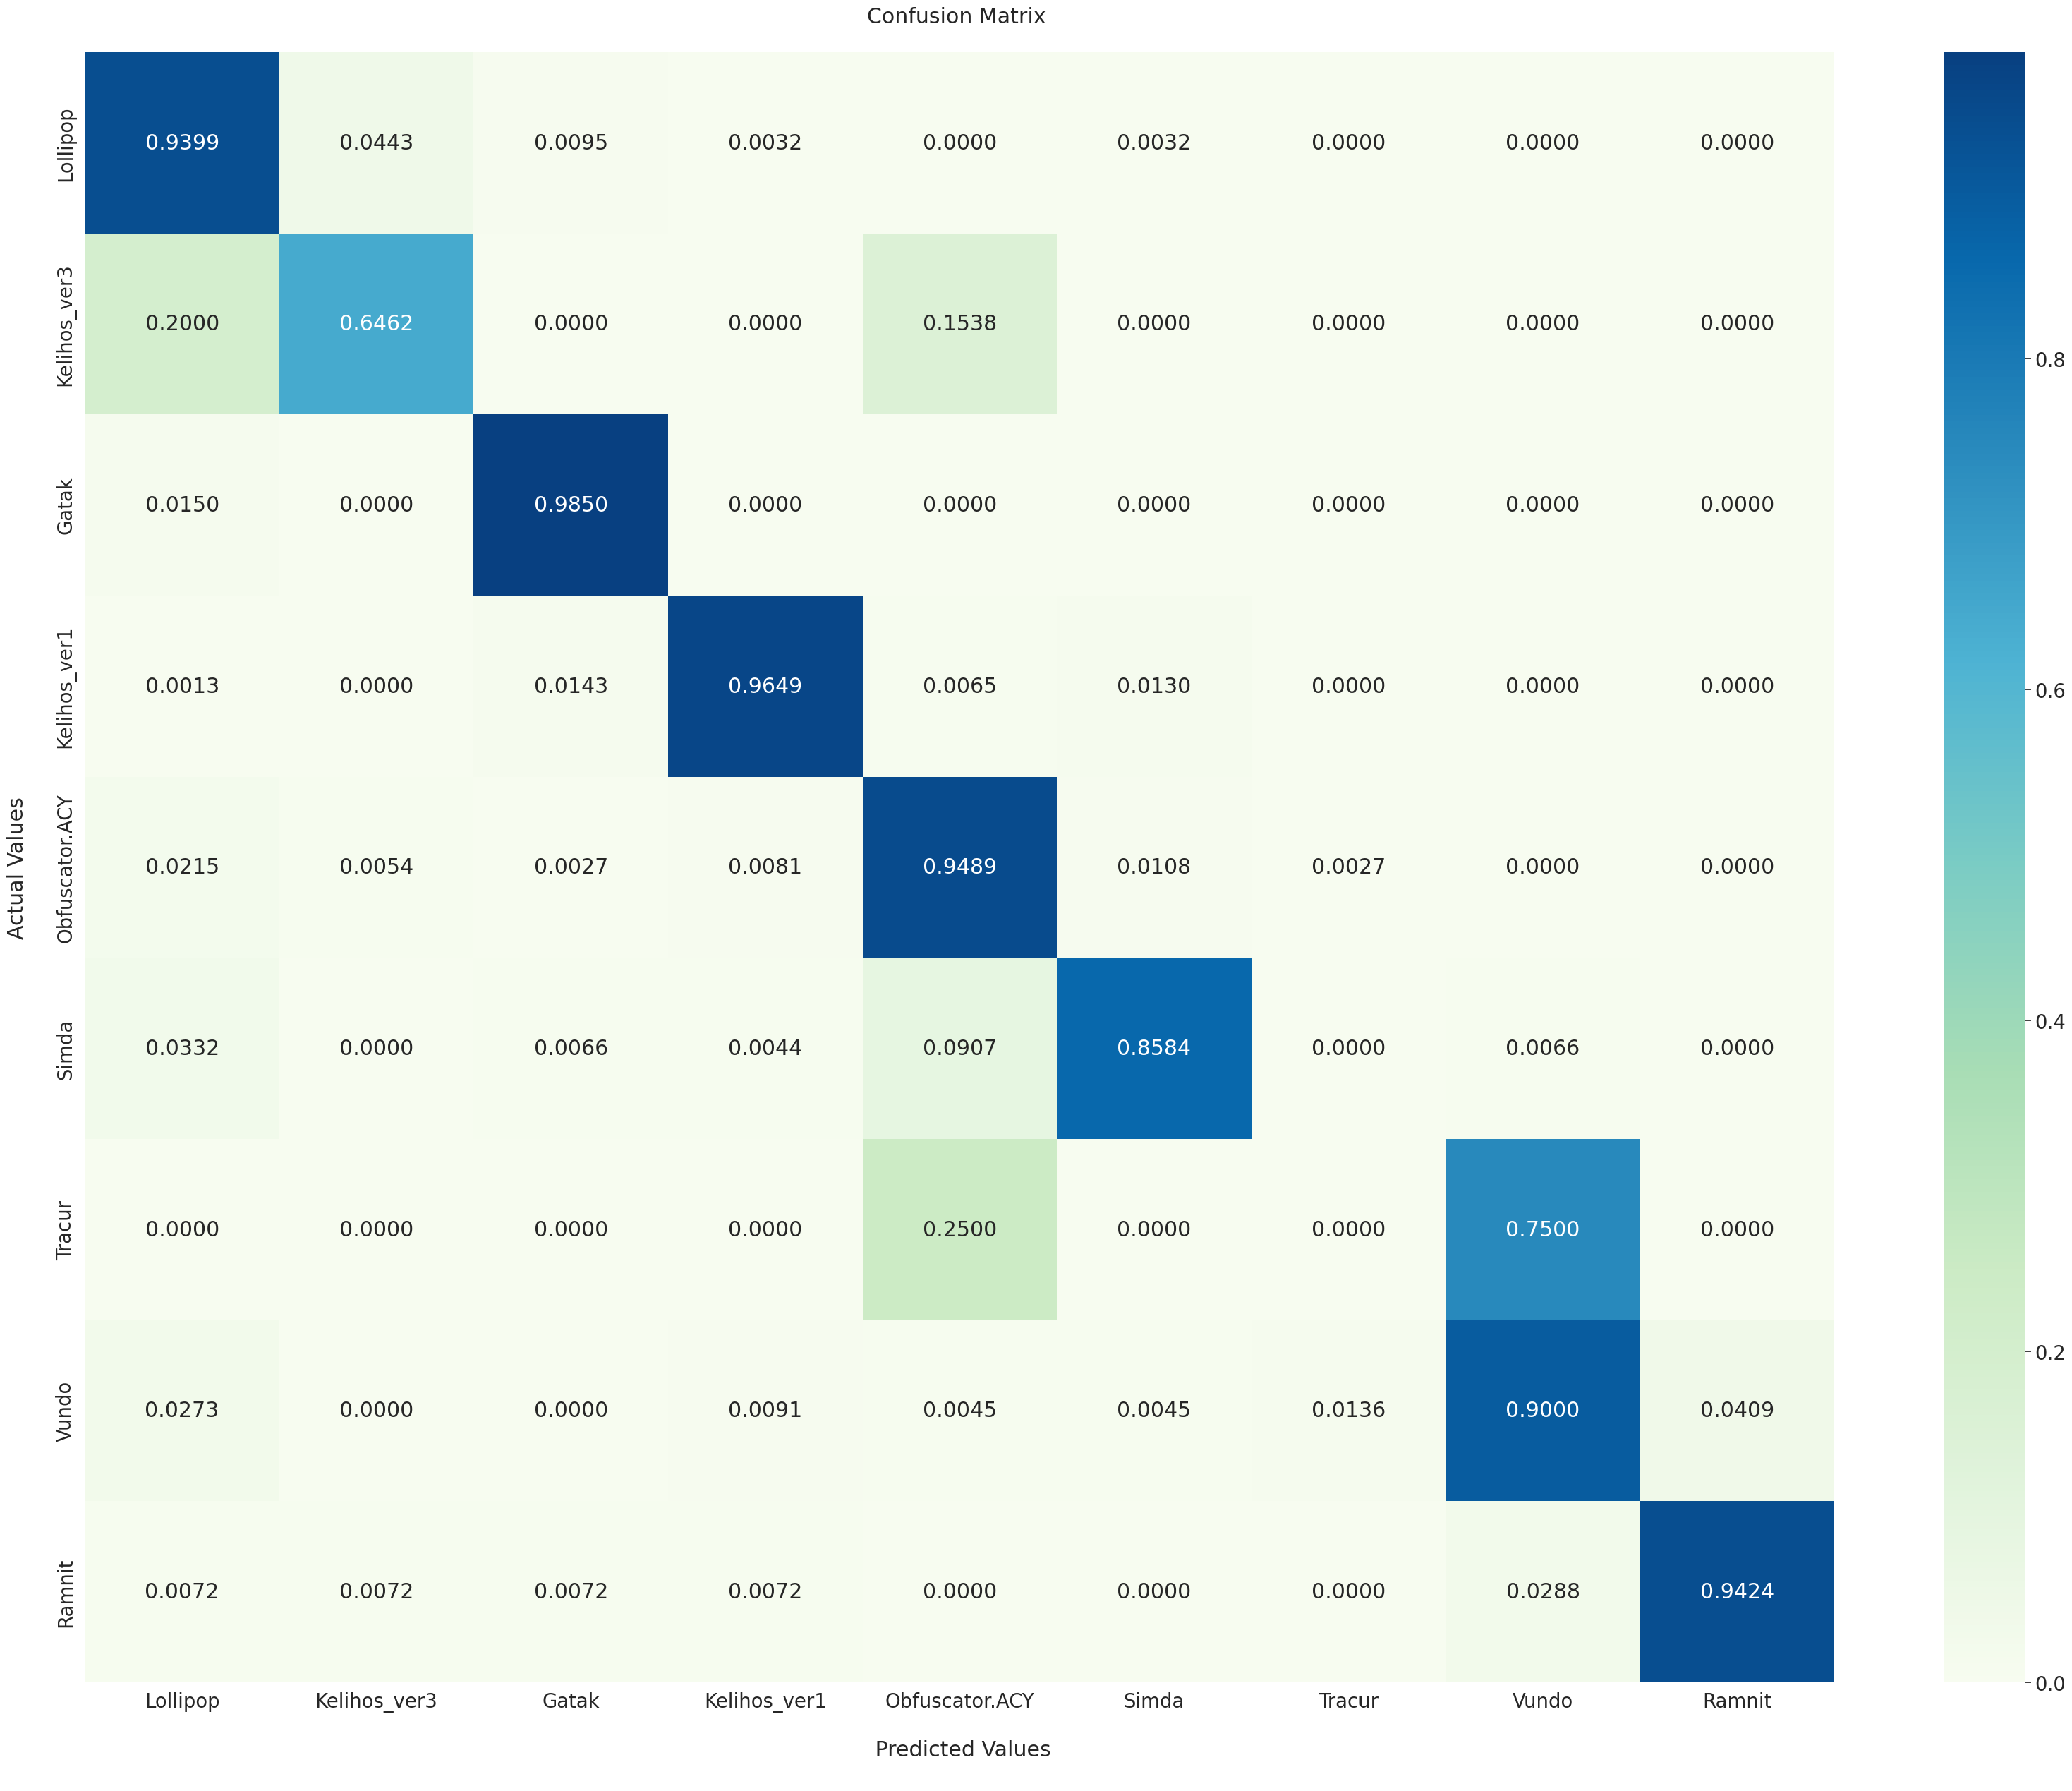

In [ ]:
# Visualizing confusion matrix
import seaborn as sns

plt.figure(figsize=(40,30))
sns.set(font_scale=1.8)
fx=sns.heatmap(conf_matrix, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)

file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ConfusionMetrics/"
file_name = "EG_SH_ADD_Confusion_Matrix.png"
plt.savefig(file_path + file_name)

plt.show()

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Macro F1-score: {macro_f1:.4f}')

Accuracy: 0.9287
Precision: 0.9286
Recall: 0.9287
F1-score: 0.9269
Macro F1-score: 0.7993


###**EG+SH(AVG)**

In [ ]:
# Concatenate the output of the 2 models
merged = average([eg_model, sh_model])

# Add one or more dense layers on top of the merged output
dense1 = Dense(256, activation = 'relu')(merged)
dense2 = Dense(128, activation = 'relu')(dense1)
dense3 = Dense(64, activation = 'relu',kernel_regularizer = l2(0.01))(dense2)
output = Dense(9, activation = 'softmax')(dense3)

# Define the model
merged_model = Model(inputs = [eg_in, sh_in], outputs = output, name = 'merged_model')

# Compile the model
merged_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = merged_model.fit(
    [x_eg_train, x_sh_train],
    y_gs_train_encoded,
    epochs=40,
    batch_size=32,
    verbose=1,
    validation_data=([x_eg_test, x_sh_test], y_gs_test_encoded)
)

Epoch 1/40
240/240 [==============================] - 17s 62ms/step - loss: 2.1942 - accuracy: 0.8050 - val_loss: 0.8681 - val_accuracy: 0.8785
Epoch 2/40
240/240 [==============================] - 13s 53ms/step - loss: 0.7444 - accuracy: 0.8996 - val_loss: 0.6307 - val_accuracy: 0.9184
Epoch 3/40
240/240 [==============================] - 13s 53ms/step - loss: 0.5429 - accuracy: 0.9270 - val_loss: 0.6082 - val_accuracy: 0.9175
Epoch 4/40
240/240 [==============================] - 13s 52ms/step - loss: 0.4640 - accuracy: 0.9362 - val_loss: 0.4878 - val_accuracy: 0.9324
Epoch 5/40
240/240 [==============================] - 13s 53ms/step - loss: 0.3920 - accuracy: 0.9441 - val_loss: 0.5522 - val_accuracy: 0.9013
Epoch 6/40
240/240 [==============================] - 13s 53ms/step - loss: 0.3571 - accuracy: 0.9467 - val_loss: 0.4490 - val_accuracy: 0.9300
Epoch 7/40
240/240 [==============================] - 13s 52ms/step - loss: 0.3397 - accuracy: 0.9454 - val_loss: 0.4520 - val_accuracy:

In [ ]:
# saving the first (hex_en) model
merged_model.save('/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/Models/EG_SH_vgg(average).pkl')

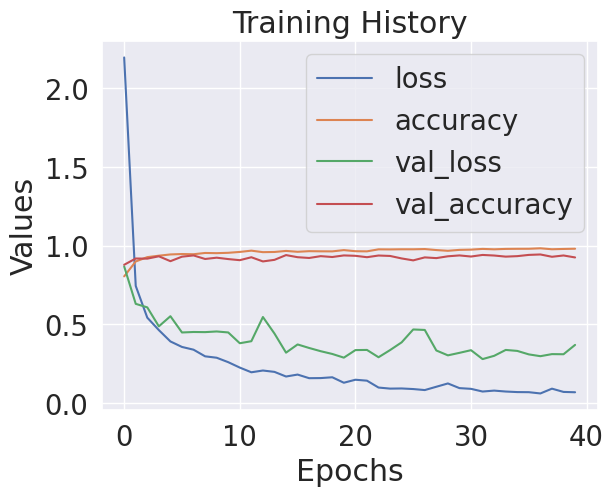

In [ ]:
history_data = pd.DataFrame(history.history)

# Create the plot
plt.plot(history_data)
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training History')
plt.grid(True)
plt.legend(history_data.columns)
plt.show()

In [ ]:
import time

In [ ]:
from sklearn.metrics import classification_report

y_true = y_gs_test_encoded  # True labels (ground truth)


#test_images = [hex_x_test, en_x_test]

test_images = [np.load('eg_image.npy'),np.load('sh_image.npy')]
start_time = time.time()
y_pred = merged_model.predict(test_images)
end_time = time.time()
print(f"Prediction time: {end_time - start_time}")

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

classes = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# Generate the classification report
report_dict = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

print(report)

#Set the path and filename for the CSV file
file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ClassificationReports/"
file_name = "EG_SH_average_classification_report.csv"

report.to_csv(file_path + file_name)

103/103 [==============================] - 4s 35ms/step
Prediction time: 4.862014293670654
                precision    recall  f1-score      support
Lollipop         0.898917  0.787975  0.839798   316.000000
Kelihos_ver3     0.853448  0.761538  0.804878   130.000000
Gatak            0.936681  0.987342  0.961345   869.000000
Kelihos_ver1     0.965206  0.972727  0.968952   770.000000
Obfuscator.ACY   0.920354  0.838710  0.877637   372.000000
Simda            0.882000  0.975664  0.926471   452.000000
Tracur           0.600000  0.187500  0.285714    16.000000
Vundo            0.906977  0.886364  0.896552   220.000000
Ramnit           0.942857  0.949640  0.946237   139.000000
accuracy         0.925091  0.925091  0.925091     0.925091
macro avg        0.878493  0.816384  0.834176  3284.000000
weighted avg     0.923696  0.925091  0.922685  3284.000000


In [ ]:
from sklearn.metrics import confusion_matrix

label = np.arange(9)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, normalize = 'true')
print(conf_matrix)

[[0.78797468 0.04746835 0.14556962 0.00632911 0.         0.01265823
  0.         0.         0.        ]
 [0.08461538 0.76153846 0.         0.         0.15384615 0.
  0.         0.         0.        ]
 [0.01150748 0.         0.98734177 0.00115075 0.         0.
  0.         0.         0.        ]
 [0.0012987  0.         0.01168831 0.97272727 0.         0.01428571
  0.         0.         0.        ]
 [0.00268817 0.00268817 0.00268817 0.04301075 0.83870968 0.09139785
  0.         0.0188172  0.        ]
 [0.         0.00221239 0.00221239 0.01327434 0.00663717 0.97566372
  0.         0.         0.        ]
 [0.0625     0.         0.         0.         0.0625     0.125
  0.1875     0.5625     0.        ]
 [0.00909091 0.         0.00454545 0.00909091 0.00909091 0.03636364
  0.00909091 0.88636364 0.03636364]
 [0.01438849 0.         0.         0.         0.00719424 0.
  0.         0.02877698 0.94964029]]


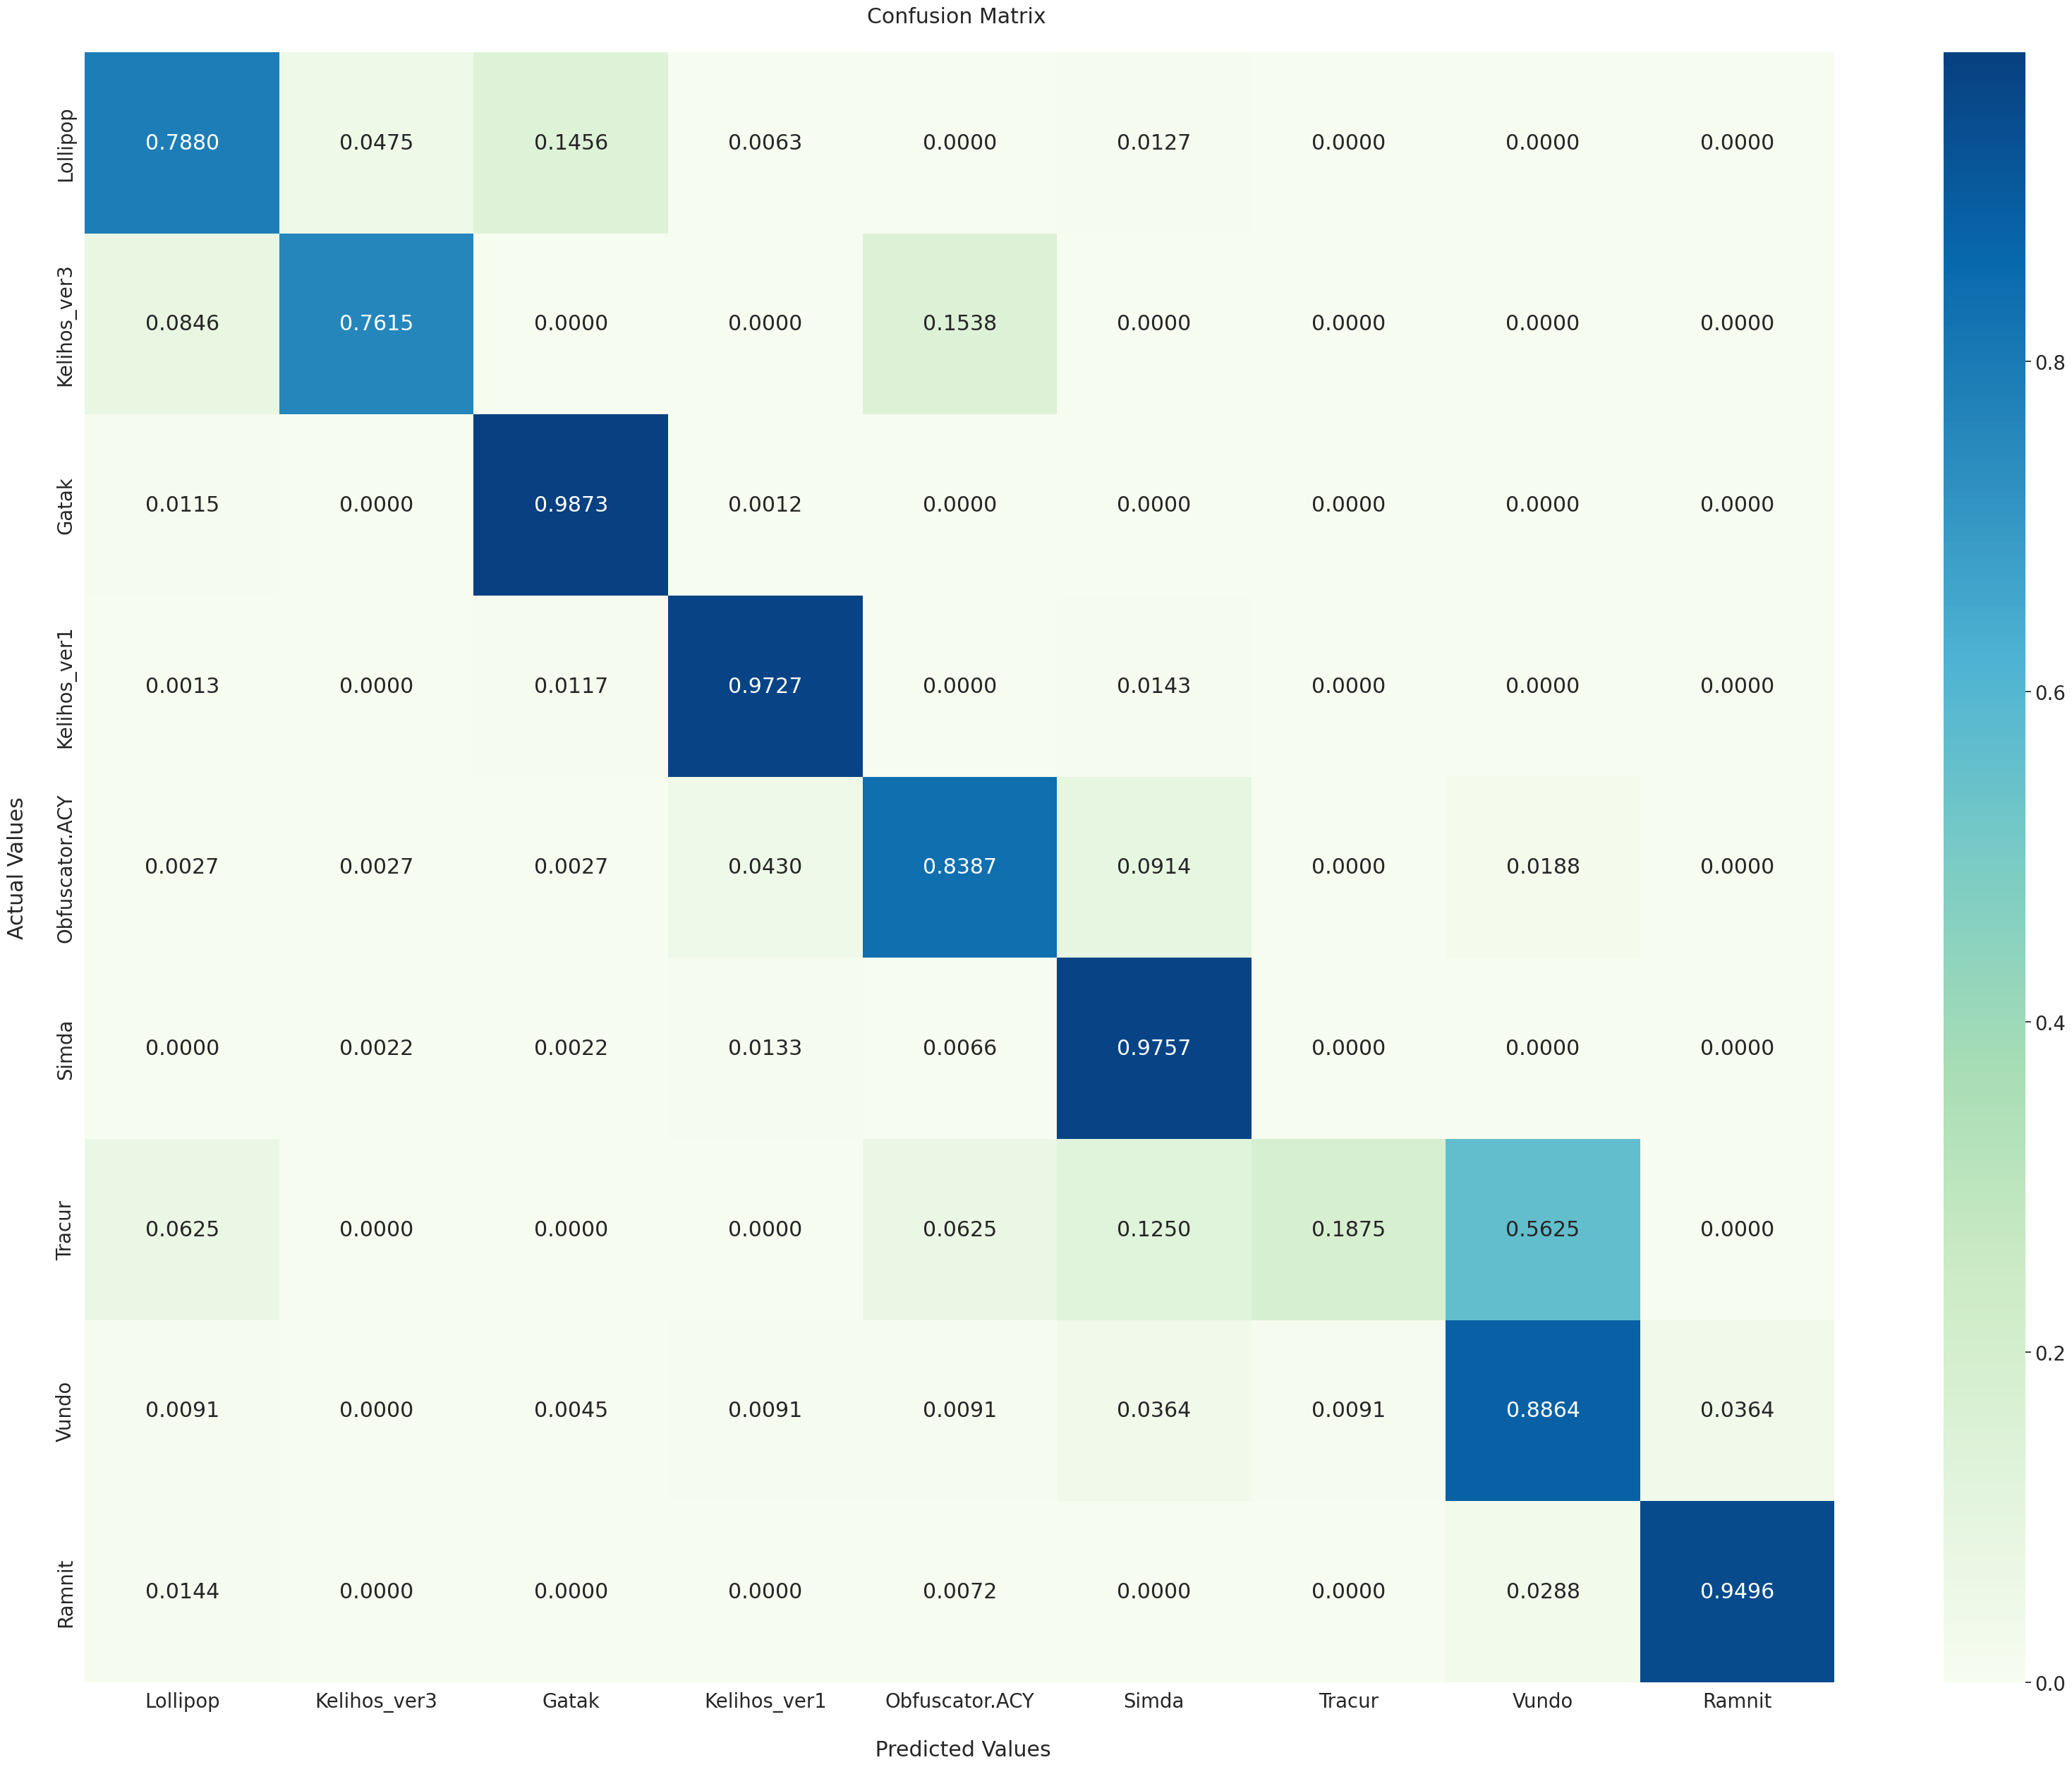

In [ ]:
# Visualizing confusion matrix
import seaborn as sns

plt.figure(figsize=(40,30))
sns.set(font_scale=1.8)
fx=sns.heatmap(conf_matrix, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)

file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ConfusionMetrics/"
file_name = "EG_SH_AVERAGE_Confusion_Matrix.png"
plt.savefig(file_path + file_name)

plt.show()

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Macro F1-score: {macro_f1:.4f}')

Accuracy: 0.9251
Precision: 0.9237
Recall: 0.9251
F1-score: 0.9227
Macro F1-score: 0.8342


###**EG+SH(MAX)**

In [ ]:
# maximize the output of the 2 models
merged = maximum([eg_model, sh_model])

# Add one or more dense layers on top of the merged output
dense1 = Dense(256, activation = 'relu')(merged)
dense2 = Dense(128, activation = 'relu')(dense1)
dense3 = Dense(64, activation = 'relu',kernel_regularizer = l2(0.01))(dense2)
output = Dense(9, activation = 'softmax')(dense3)

# Define the model
merged_model = Model(inputs = [eg_in, sh_in], outputs = output, name = 'merged_model')

# Compile the model
merged_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = merged_model.fit(
    [x_eg_train, x_sh_train],
    y_gs_train_encoded,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=([x_eg_test, x_sh_test], y_gs_test_encoded)
)

Epoch 1/50
240/240 [==============================] - 16s 59ms/step - loss: 3.9341 - accuracy: 0.8013 - val_loss: 1.6349 - val_accuracy: 0.8541
Epoch 2/50
240/240 [==============================] - 13s 53ms/step - loss: 1.0712 - accuracy: 0.8922 - val_loss: 1.0062 - val_accuracy: 0.9044
Epoch 3/50
240/240 [==============================] - 13s 53ms/step - loss: 0.8097 - accuracy: 0.9146 - val_loss: 0.7683 - val_accuracy: 0.8968
Epoch 4/50
240/240 [==============================] - 13s 53ms/step - loss: 0.6077 - accuracy: 0.9326 - val_loss: 0.9042 - val_accuracy: 0.9077
Epoch 5/50
240/240 [==============================] - 13s 53ms/step - loss: 0.5859 - accuracy: 0.9309 - val_loss: 0.7311 - val_accuracy: 0.8943
Epoch 6/50
240/240 [==============================] - 13s 53ms/step - loss: 0.4932 - accuracy: 0.9439 - val_loss: 0.6342 - val_accuracy: 0.9272
Epoch 7/50
240/240 [==============================] - 13s 53ms/step - loss: 0.4446 - accuracy: 0.9496 - val_loss: 0.5786 - val_accuracy:

In [ ]:
# saving the first (hex_en) model
merged_model.save('/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/Models/EG_SH_vgg(maximum).pkl')

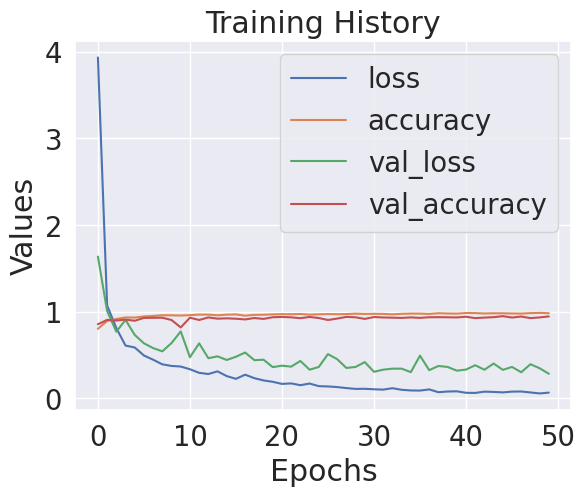

In [ ]:
history_data = pd.DataFrame(history.history)

# Create the plot
plt.plot(history_data)
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training History')
plt.grid(True)
plt.legend(history_data.columns)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_true = y_gs_test_encoded  # True labels (ground truth)


#test_images = [hex_x_test, en_x_test]

test_images = [np.load('eg_image.npy'),np.load('sh_image.npy')]
start_time = time.time()
y_pred = merged_model.predict(test_images)
end_time = time.time()
print(f"Prediction time: {end_time - start_time}")

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

classes = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# Generate the classification report
report_dict = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

print(report)

#Set the path and filename for the CSV file
file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ClassificationReports/"
file_name = "EG_SH_maximum_classification_report.csv"

report.to_csv(file_path + file_name)

103/103 [==============================] - 4s 35ms/step
Prediction time: 4.890763282775879
                precision    recall  f1-score      support
Lollipop         0.924051  0.924051  0.924051   316.000000
Kelihos_ver3     0.853448  0.761538  0.804878   130.000000
Gatak            0.979452  0.987342  0.983381   869.000000
Kelihos_ver1     0.985488  0.970130  0.977749   770.000000
Obfuscator.ACY   0.879093  0.938172  0.907672   372.000000
Simda            0.935412  0.929204  0.932297   452.000000
Tracur           0.250000  0.062500  0.100000    16.000000
Vundo            0.890351  0.922727  0.906250   220.000000
Ramnit           0.942857  0.949640  0.946237   139.000000
accuracy         0.944275  0.944275  0.944275     0.944275
macro avg        0.848906  0.827256  0.831391  3284.000000
weighted avg     0.942047  0.944275  0.942635  3284.000000


In [ ]:
from sklearn.metrics import confusion_matrix

label = np.arange(9)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, normalize = 'true')
print(conf_matrix)

[[0.92405063 0.0443038  0.01898734 0.00316456 0.         0.00316456
  0.         0.00632911 0.        ]
 [0.06153846 0.76153846 0.         0.         0.15384615 0.00769231
  0.         0.01538462 0.        ]
 [0.01265823 0.         0.98734177 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.01298701 0.97012987 0.00779221 0.00909091
  0.         0.         0.        ]
 [0.00537634 0.00268817 0.         0.00806452 0.93817204 0.04569892
  0.         0.         0.        ]
 [0.00442478 0.         0.00442478 0.01548673 0.03982301 0.92920354
  0.         0.00663717 0.        ]
 [0.         0.         0.         0.         0.0625     0.0625
  0.0625     0.8125     0.        ]
 [0.00454545 0.00454545 0.         0.         0.00909091 0.00909091
  0.01363636 0.92272727 0.03636364]
 [0.         0.00719424 0.         0.         0.00719424 0.
  0.         0.03597122 0.94964029]]


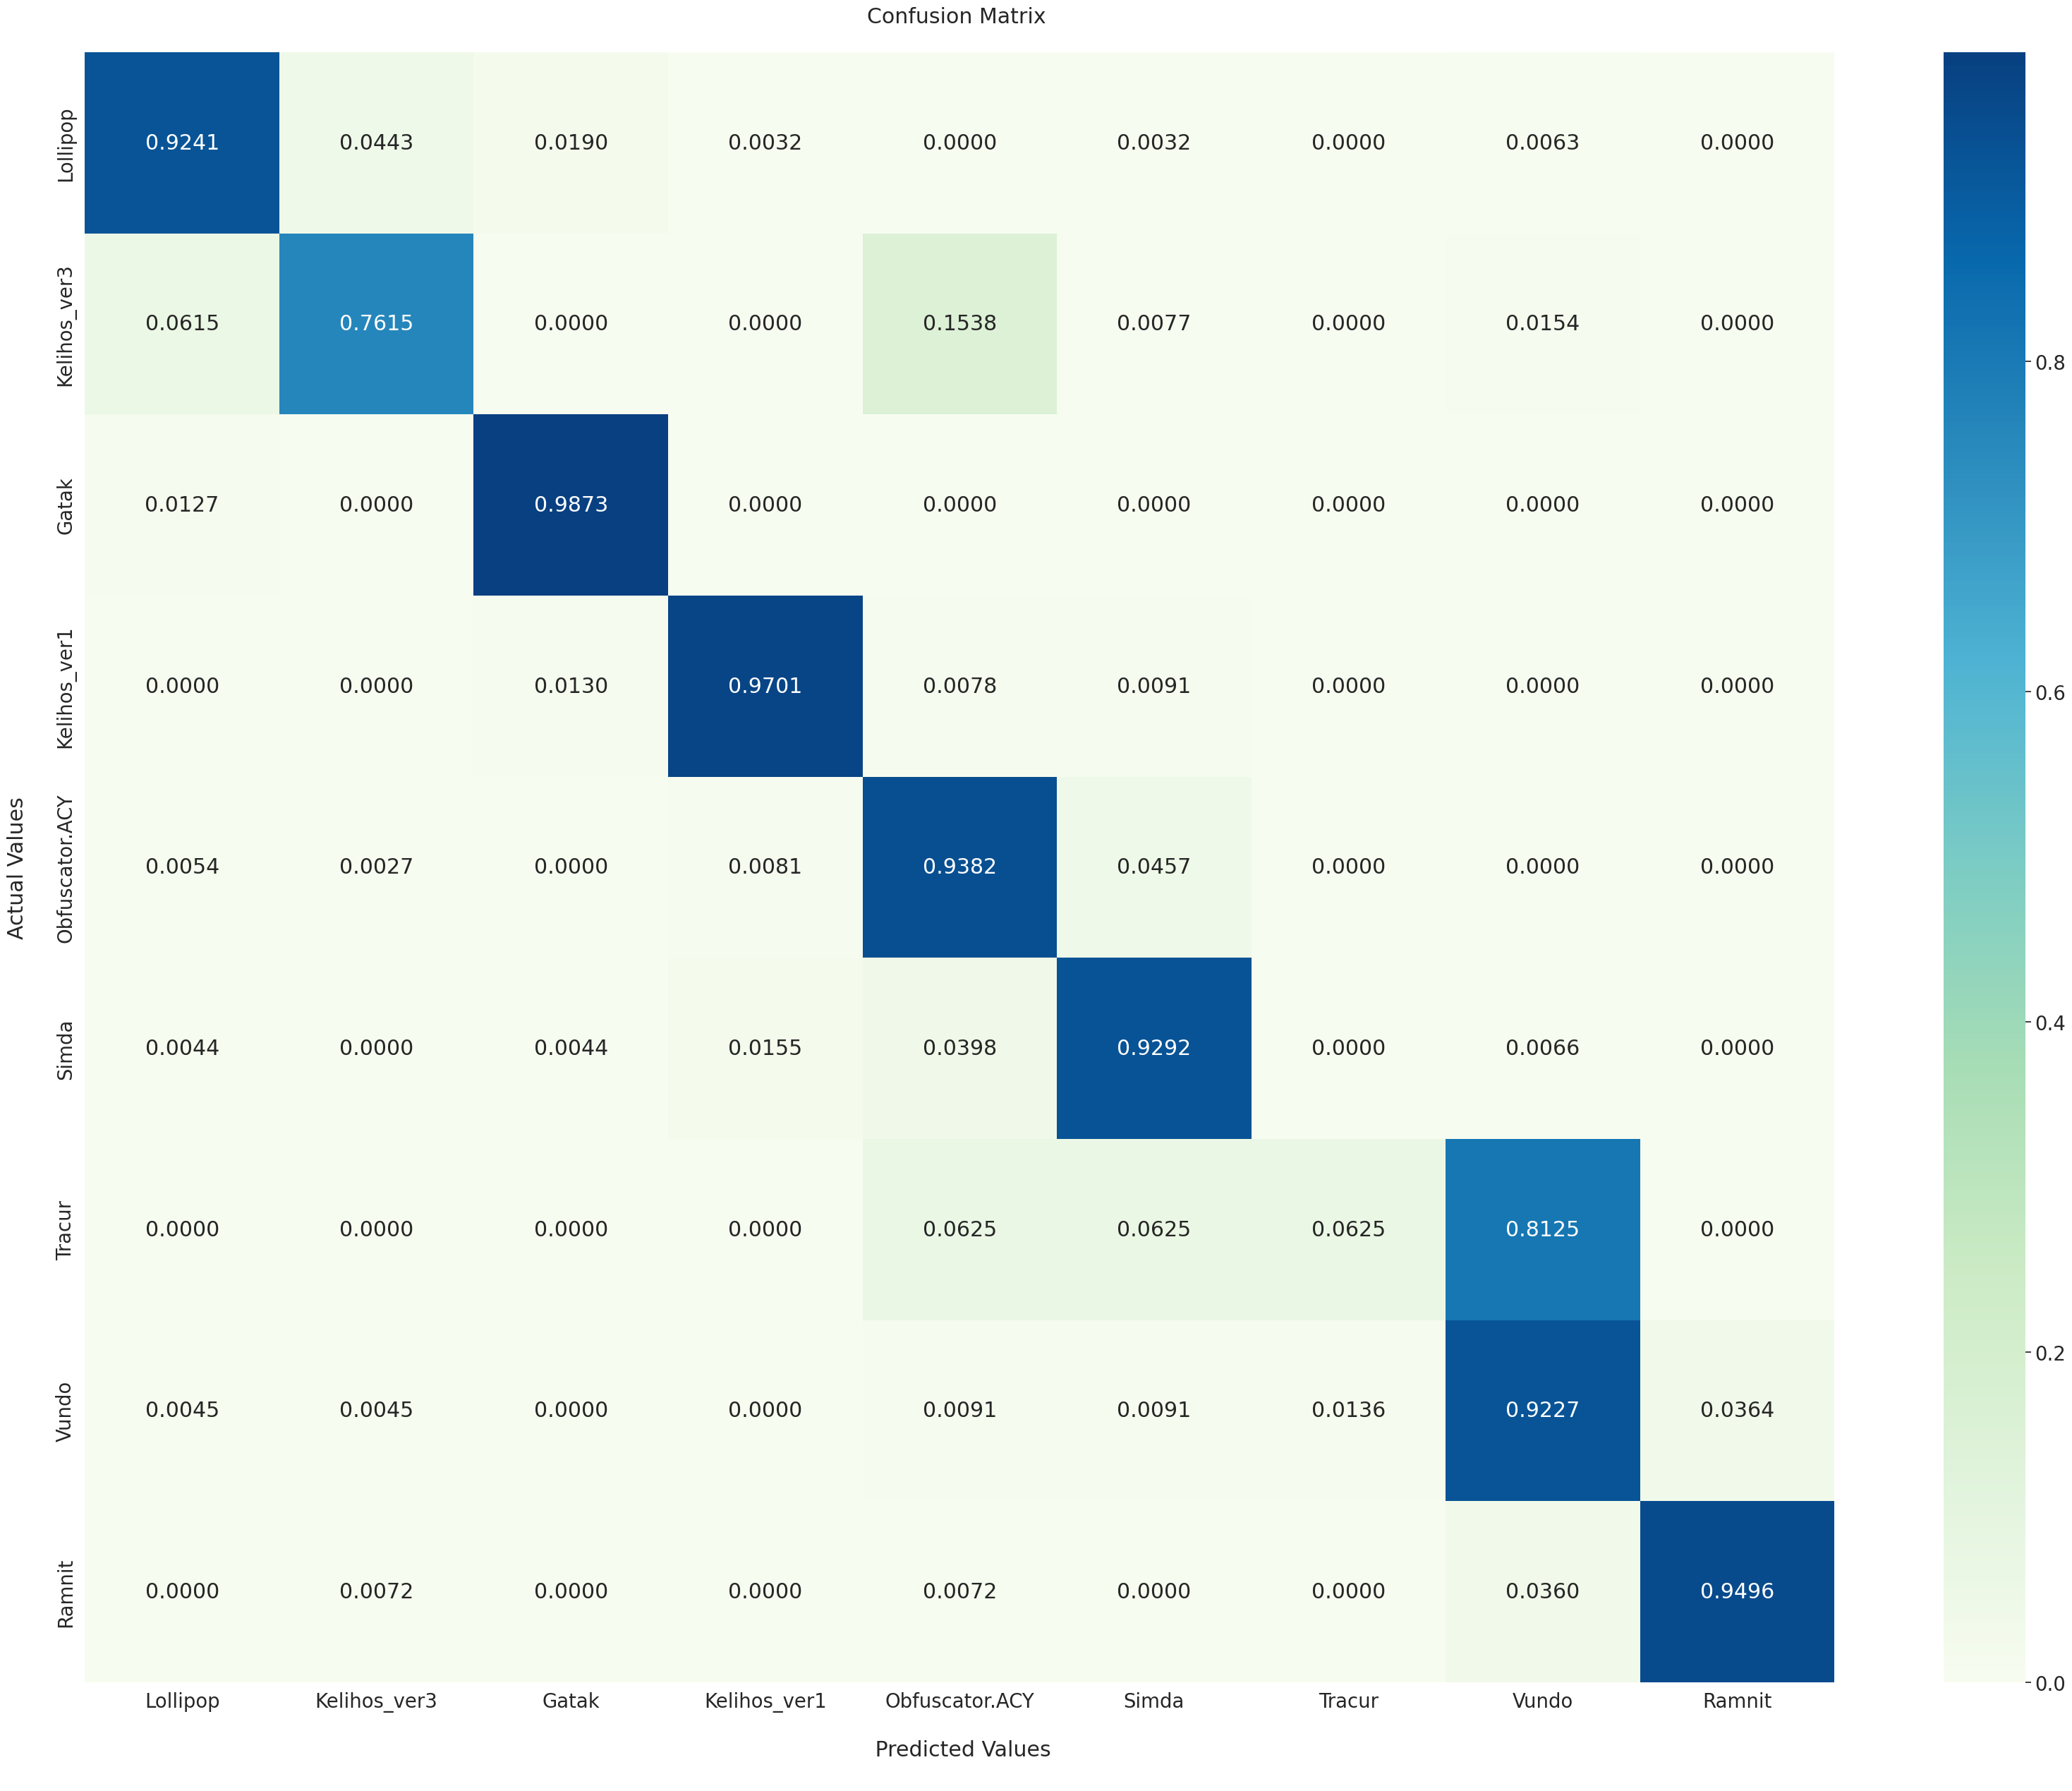

In [ ]:
# Visualizing confusion matrix
import seaborn as sns

plt.figure(figsize=(40,30))
sns.set(font_scale=1.8)
fx=sns.heatmap(conf_matrix, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)

file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ConfusionMetrics/"
file_name = "EG_SH_MAXIMUM_Confusion_Matrix.png"
plt.savefig(file_path + file_name)

plt.show()

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Macro F1-score: {macro_f1:.4f}')

Accuracy: 0.9443
Precision: 0.9420
Recall: 0.9443
F1-score: 0.9426
Macro F1-score: 0.8314


###**EG+SH(CONCAT)**

In [ ]:
# Concatenate the output of the 2 models
merged = concatenate([eg_model, sh_model])

# Add one or more dense layers on top of the merged output
dense1 = Dense(512, activation = 'relu')(merged)
dense2 = Dense(256, activation = 'relu')(dense1)
dense3 = Dense(128, activation = 'relu')(dense2)
dense4 = Dense(64, activation = 'relu',kernel_regularizer = l2(0.01))(dense3)
output = Dense(9, activation = 'softmax')(dense4)

# Define the model
merged_model = Model(inputs = [eg_in, sh_in], outputs = output, name = 'merged_model')

# Compile the model
merged_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = merged_model.fit(
    [x_eg_train, x_sh_train],
    y_gs_train_encoded,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=([x_eg_test, x_sh_test], y_gs_test_encoded)
)

Epoch 1/50
240/240 [==============================] - 17s 60ms/step - loss: 4.3249 - accuracy: 0.7967 - val_loss: 1.3333 - val_accuracy: 0.8703
Epoch 2/50
240/240 [==============================] - 13s 55ms/step - loss: 0.8594 - accuracy: 0.9127 - val_loss: 0.8216 - val_accuracy: 0.9175
Epoch 3/50
240/240 [==============================] - 13s 55ms/step - loss: 0.6686 - accuracy: 0.9300 - val_loss: 0.8222 - val_accuracy: 0.8952
Epoch 4/50
240/240 [==============================] - 13s 55ms/step - loss: 0.5767 - accuracy: 0.9381 - val_loss: 0.6694 - val_accuracy: 0.9294
Epoch 5/50
240/240 [==============================] - 13s 54ms/step - loss: 0.5019 - accuracy: 0.9450 - val_loss: 0.8618 - val_accuracy: 0.9126
Epoch 6/50
240/240 [==============================] - 13s 54ms/step - loss: 0.4784 - accuracy: 0.9454 - val_loss: 0.6445 - val_accuracy: 0.9248
Epoch 7/50
240/240 [==============================] - 13s 54ms/step - loss: 0.4437 - accuracy: 0.9510 - val_loss: 0.5479 - val_accuracy:

In [ ]:
# saving the first (hex_en) model
merged_model.save('/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/Models/EG_SH_vgg(concat).pkl')

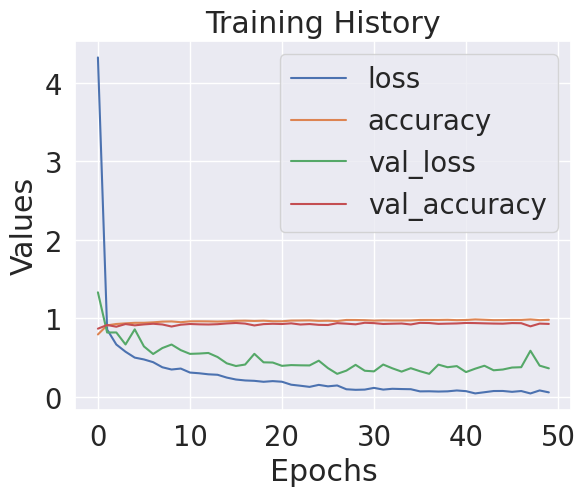

In [ ]:
history_data = pd.DataFrame(history.history)

# Create the plot
plt.plot(history_data)
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training History')
plt.grid(True)
plt.legend(history_data.columns)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_true = y_gs_test_encoded  # True labels (ground truth)


#test_images = [hex_x_test, en_x_test]

test_images = [np.load('eg_image.npy'), np.load('sh_image.npy')]
start_time = time.time()
y_pred = merged_model.predict(test_images)
end_time = time.time()
print(f"Prediction time: {end_time - start_time}")

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

classes = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# Generate the classification report
report_dict = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

print(report)

#Set the path and filename for the CSV file
file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ClassificationReports/"
file_name = "EG_SH_concat_classification_report.csv"

report.to_csv(file_path + file_name)

103/103 [==============================] - 4s 35ms/step
Prediction time: 4.908387184143066
                precision    recall  f1-score      support
Lollipop         0.898601  0.813291  0.853821   316.000000
Kelihos_ver3     0.855856  0.730769  0.788382   130.000000
Gatak            0.937841  0.989643  0.963046   869.000000
Kelihos_ver1     0.995957  0.959740  0.977513   770.000000
Obfuscator.ACY   0.849515  0.940860  0.892857   372.000000
Simda            0.937778  0.933628  0.935698   452.000000
Tracur           0.000000  0.000000  0.000000    16.000000
Vundo            0.904545  0.904545  0.904545   220.000000
Ramnit           0.924658  0.971223  0.947368   139.000000
accuracy         0.930877  0.930877  0.930877     0.930877
macro avg        0.811639  0.804856  0.807026  3284.000000
weighted avg     0.927074  0.930877  0.928024  3284.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

label = np.arange(9)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, normalize = 'true')
print(conf_matrix)

[[0.81329114 0.04746835 0.12025316 0.00316456 0.00316456 0.00949367
  0.         0.00316456 0.        ]
 [0.1        0.73076923 0.00769231 0.         0.16153846 0.
  0.         0.         0.        ]
 [0.01035673 0.         0.98964327 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.01428571 0.95974026 0.01168831 0.01428571
  0.         0.         0.        ]
 [0.00806452 0.         0.00268817 0.00268817 0.94086022 0.03494624
  0.         0.01075269 0.        ]
 [0.         0.         0.00442478 0.00221239 0.04867257 0.93362832
  0.         0.01106195 0.        ]
 [0.0625     0.         0.         0.         0.25       0.
  0.         0.6875     0.        ]
 [0.01363636 0.00454545 0.00454545 0.         0.01818182 0.00454545
  0.         0.90454545 0.05      ]
 [0.         0.         0.02158273 0.         0.00719424 0.
  0.         0.         0.97122302]]


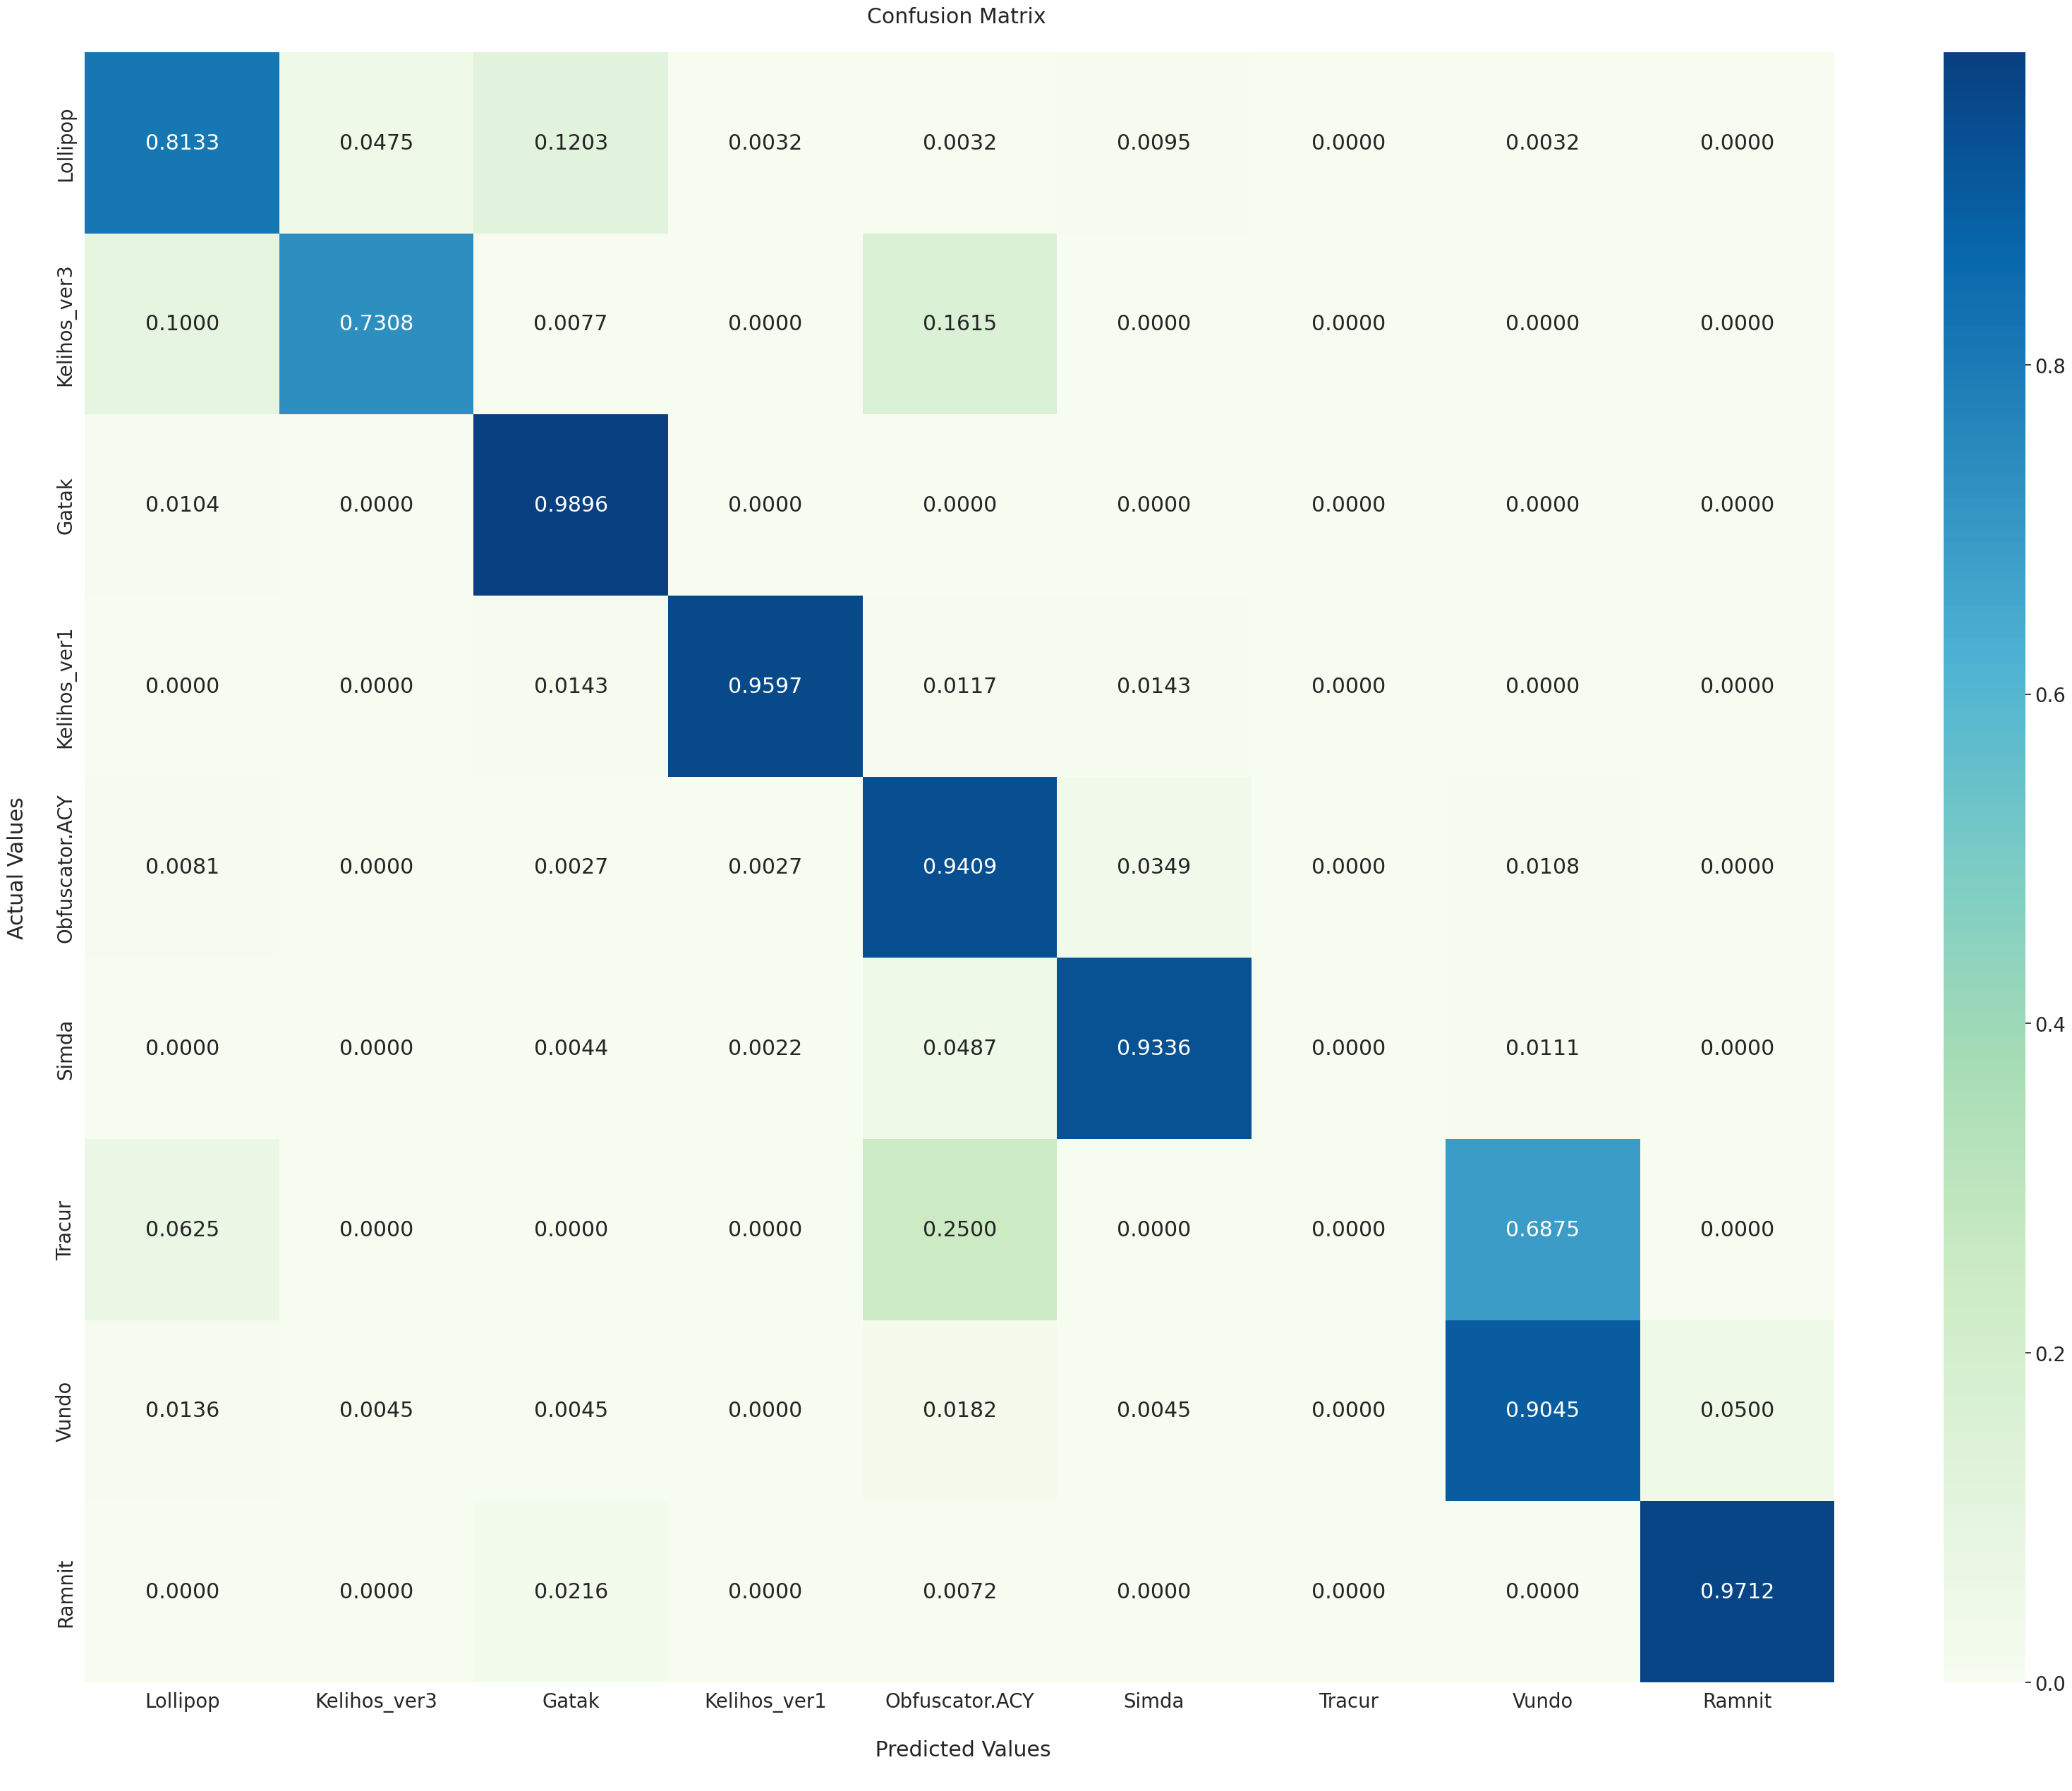

In [ ]:
# Visualizing confusion matrix
import seaborn as sns

plt.figure(figsize=(40,30))
sns.set(font_scale=1.8)
fx=sns.heatmap(conf_matrix, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)

file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ConfusionMetrics/"
file_name = "EG_SH_CONCAT_Confusion_Matrix.png"
plt.savefig(file_path + file_name)

plt.show()

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Macro F1-score: {macro_f1:.4f}')

Accuracy: 0.9309
Precision: 0.9271
Recall: 0.9309
F1-score: 0.9280
Macro F1-score: 0.8070


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**GS+EG+SH**

###**GS+EG+SH(ADD)**

In [ ]:
# Concatenate the output of the 2 models
merged = add([hex_model, eg_model, sh_model])

# Add one or more dense layers on top of the merged output

# Add 1D convolutional layers
conv1 = Conv1D(filters=515, kernel_size=3, strides=1, activation='relu')(merged)
flatten = Flatten()(conv1)
dense1 = Dense(512, activation = 'relu')(flatten)
dense2 = Dense(256, activation = 'relu')(dense1)
dense3 = Dense(128, activation = 'relu')(dense2)
dense4 = Dense(64, activation = 'relu',kernel_regularizer = l2(0.01))(dense3)
output = Dense(9, activation = 'softmax')(dense4)

# Define the model
merged_model = Model(inputs = hex_in, outputs = output, name = 'merged_model')

# Compile the model
merged_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

NameError: name 'Conv1D' is not defined

In [ ]:
history = merged_model.fit(
    [x_gs_train, x_eg_train, x_sh_train],
    y_gs_train_encoded,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=([x_gs_test, x_eg_test, x_sh_test], y_gs_test_encoded)
)

In [ ]:
# saving the first (hex_en) model
merged_model.save('/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/Models/GS_EG_SH_vgg(ADD_NEW).keras')

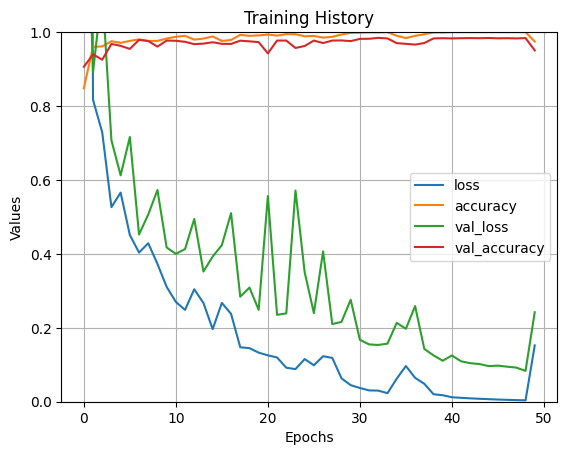

In [ ]:
history_data = pd.DataFrame(history.history)

# Create the plot
plt.plot(history_data)
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training History')
plt.grid(True)
plt.legend(history_data.columns)
plt.ylim(0, 1)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_true = y_gs_test_encoded  # True labels (ground truth)


#test_images = [hex_x_test, en_x_test]

test_images = [np.load('hex_image.npy'),np.load('eg_image.npy'), np.load('sh_image.npy')]
start_time = time.time()
y_pred = merged_model.predict(test_images)
end_time = time.time()
print(f"Prediction time: {end_time - start_time}")

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

classes = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# Generate the classification report
report_dict = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

print(report)

#Set the path and filename for the CSV file
file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ClassificationReports/"
file_name = "GS_EG_SH_add_classification_report[NEW].csv"

report.to_csv(file_path + file_name)

103/103 [==============================] - 36s 345ms/step
Prediction time: 40.18277406692505
                precision    recall  f1-score     support
Lollipop         0.993197  0.924051  0.957377   316.00000
Kelihos_ver3     0.900000  0.761538  0.825000   130.00000
Gatak            0.984036  0.993096  0.988545   869.00000
Kelihos_ver1     0.998689  0.989610  0.994129   770.00000
Obfuscator.ACY   0.927746  0.862903  0.894150   372.00000
Simda            0.850095  0.991150  0.915220   452.00000
Tracur           0.000000  0.000000  0.000000    16.00000
Vundo            0.943396  0.909091  0.925926   220.00000
Ramnit           0.907285  0.985612  0.944828   139.00000
accuracy         0.950670  0.950670  0.950670     0.95067
macro avg        0.833827  0.824117  0.827242  3284.00000
weighted avg     0.949450  0.950670  0.948735  3284.00000


In [ ]:
from sklearn.metrics import confusion_matrix

label = np.arange(9)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, normalize = 'true')
print(conf_matrix)

[[0.92405063 0.03164557 0.00316456 0.         0.01898734 0.01265823
  0.00316456 0.00316456 0.00316456]
 [0.         0.76153846 0.03076923 0.         0.09230769 0.10769231
  0.         0.         0.00769231]
 [0.00115075 0.         0.99309551 0.         0.0023015  0.
  0.0023015  0.         0.00115075]
 [0.0012987  0.         0.00779221 0.98961039 0.         0.0012987
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.86290323 0.13172043
  0.         0.         0.00537634]
 [0.         0.         0.00663717 0.00221239 0.         0.99115044
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.125      0.1875
  0.         0.6875     0.        ]
 [0.         0.         0.         0.         0.00909091 0.03636364
  0.00454545 0.90909091 0.04090909]
 [0.         0.00719424 0.         0.         0.00719424 0.
  0.         0.         0.98561151]]


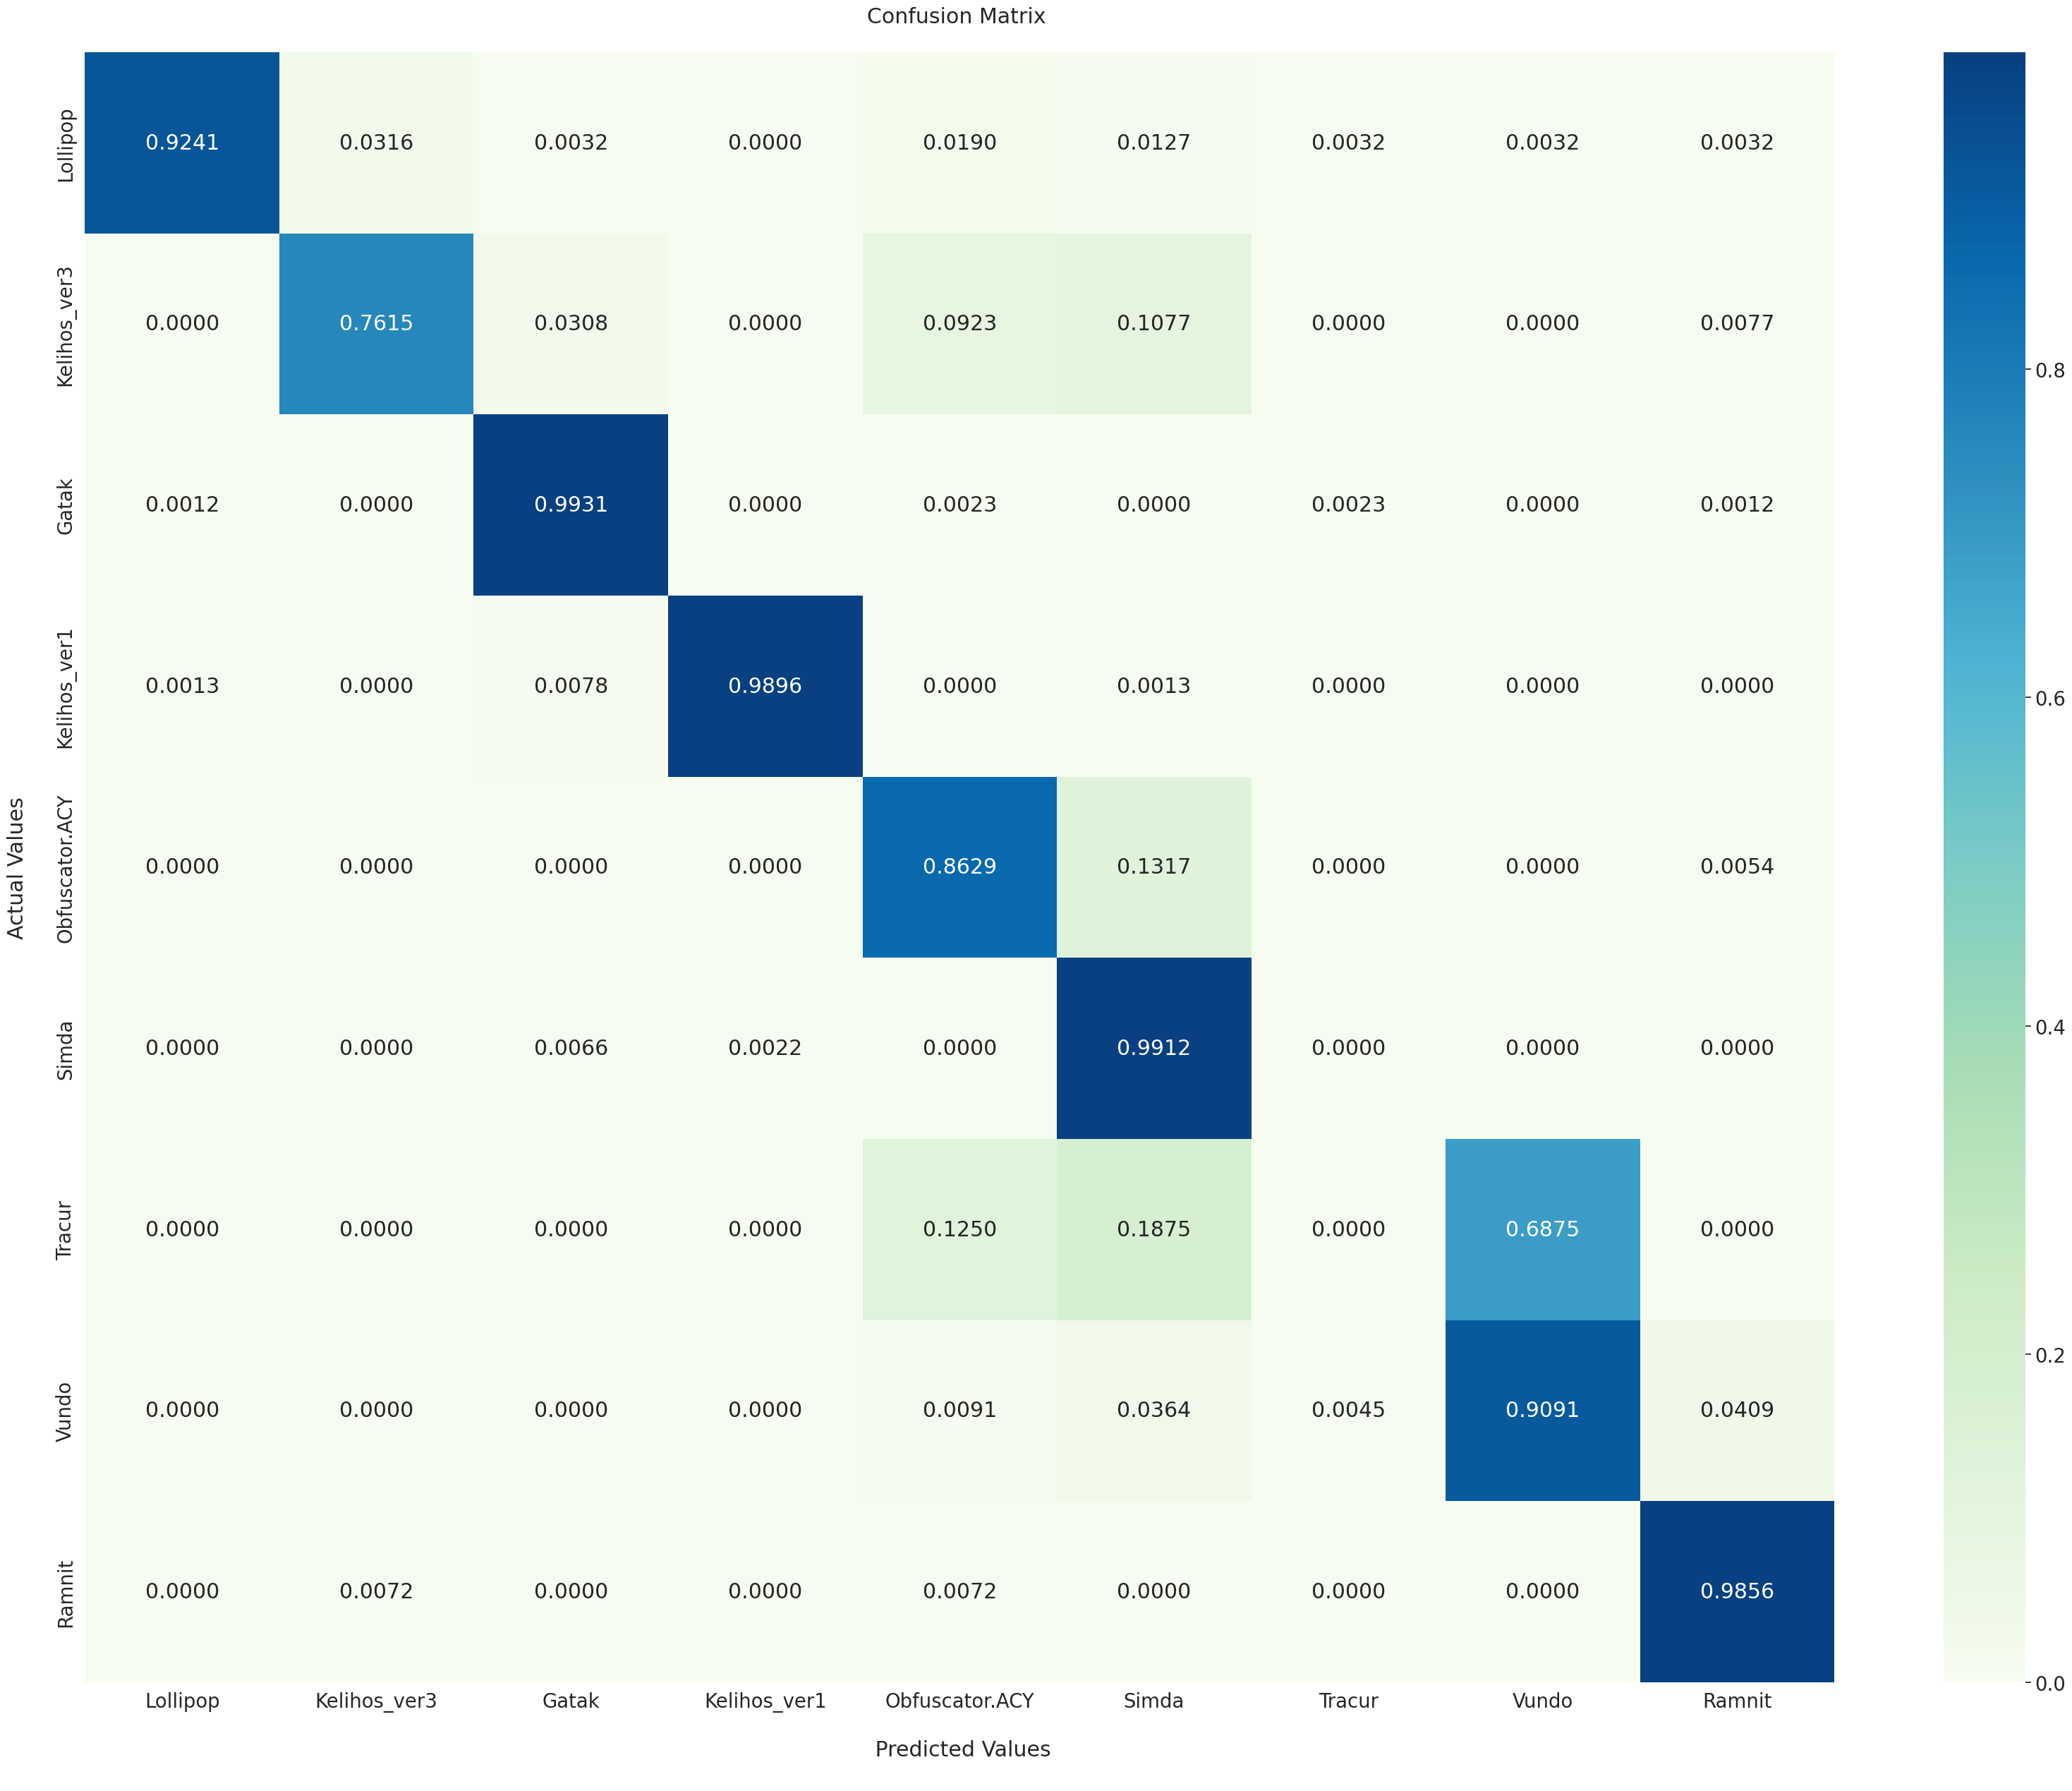

In [ ]:
# Visualizing confusion matrix
import seaborn as sns

plt.figure(figsize=(40,30))
sns.set(font_scale=1.8)
fx=sns.heatmap(conf_matrix, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)

file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ConfusionMetrics/"
file_name = "GS_EG_SH_ADD_Confusion_Matrix[NEW].png"
plt.savefig(file_path + file_name)

plt.show()

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Macro F1-score: {macro_f1:.4f}')

Accuracy: 0.9507
Precision: 0.9494
Recall: 0.9507
F1-score: 0.9487
Macro F1-score: 0.8272


###**GS+EG+SH(AVERAGE)**

In [ ]:
# Concatenate the output of the 2 models
merged = average([hex_model, eg_model, sh_model])

# Add one or more dense layers on top of the merged output

# Add 1D convolutional layers
conv1 = Conv1D(filters=515, kernel_size=3, strides=1, activation='relu')(merged)
flatten = Flatten()(conv1)
dense1 = Dense(512, activation = 'relu')(flatten)
dense2 = Dense(256, activation = 'relu')(dense1)
dense3 = Dense(128, activation = 'relu')(dense2)
dense4 = Dense(64, activation = 'relu',kernel_regularizer = l2(0.01))(dense3)
output = Dense(9, activation = 'softmax')(dense4)

# Define the model
merged_model = Model(inputs = hex_in, outputs = output, name = 'merged_model')

# Compile the model
merged_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = merged_model.fit(
    [x_gs_train, x_eg_train, x_sh_train],
    y_gs_train_encoded,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=([x_gs_test, x_eg_test, x_sh_test], y_gs_test_encoded)
)

In [ ]:
# saving the first (hex_en) model
merged_model.save('/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/Models/GS_EG_SH_vgg(AVG_NEW).keras')

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylin'

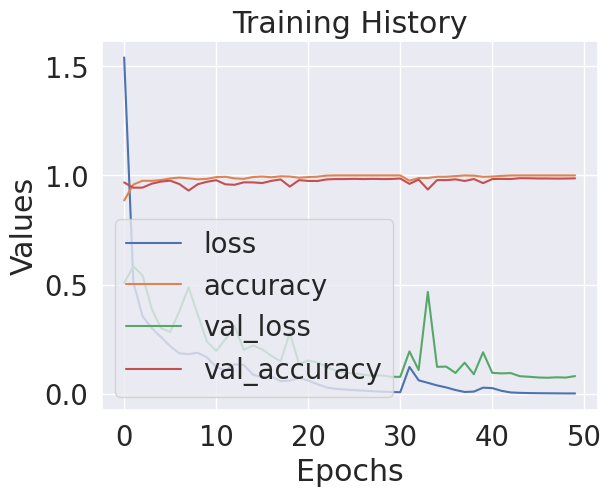

In [ ]:
history_data = pd.DataFrame(history.history)

# Create the plot
plt.plot(history_data)
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training History')
plt.grid(True)
plt.legend(history_data.columns)
plt.ylin(0,1)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_true = y_gs_test_encoded  # True labels (ground truth)


#test_images = [hex_x_test, en_x_test]

test_images = [np.load('hex_image.npy'),np.load('eg_image.npy'), np.load('sh_image.npy')]
start_time = time.time()
y_pred = merged_model.predict(test_images)
end_time = time.time()
print(f"Prediction time: {end_time - start_time}")

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

classes = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# Generate the classification report
report_dict = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

print(report)

#Set the path and filename for the CSV file
file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ClassificationReports/"
file_name = "GS_EG_SH_average_classification_report.csv"

report.to_csv(file_path + file_name)

In [ ]:
from sklearn.metrics import confusion_matrix

label = np.arange(9)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, normalize = 'true')
print(conf_matrix)

In [ ]:
# Visualizing confusion matrix
import seaborn as sns

plt.figure(figsize=(40,30))
sns.set(font_scale=1.8)
fx=sns.heatmap(conf_matrix, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)

file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ConfusionMetrics/"
file_name = "GS_EG_SH_AVERAGE_Confusion_Matrix.png"
plt.savefig(file_path + file_name)

plt.show()

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Macro F1-score: {macro_f1:.4f}')

###**GS+EG+SH(MAXIMUM)**

In [ ]:
# Concatenate the output of the 2 models
merged = maximum([hex_model, eg_model, sh_model])

# Add one or more dense layers on top of the merged output

# Add 1D convolutional layers
conv1 = Conv1D(filters=515, kernel_size=3, strides=1, activation='relu')(merged)
flatten = Flatten()(conv1)
dense1 = Dense(512, activation = 'relu')(flatten)
dense2 = Dense(256, activation = 'relu')(dense1)
dense3 = Dense(128, activation = 'relu')(dense2)
dense4 = Dense(64, activation = 'relu',kernel_regularizer = l2(0.01))(dense3)
output = Dense(9, activation = 'softmax')(dense4)

# Define the model
merged_model = Model(inputs = hex_in, outputs = output, name = 'merged_model')

# Compile the model
merged_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = merged_model.fit(
    [x_gs_train, x_eg_train, x_sh_train],
    y_gs_train_encoded,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=([x_gs_test, x_eg_test, x_sh_test], y_gs_test_encoded)
)

In [ ]:
# saving the first (hex_en) model
merged_model.save('/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/Models/GS_EG_SH_vgg(MAX_NEW).keras')

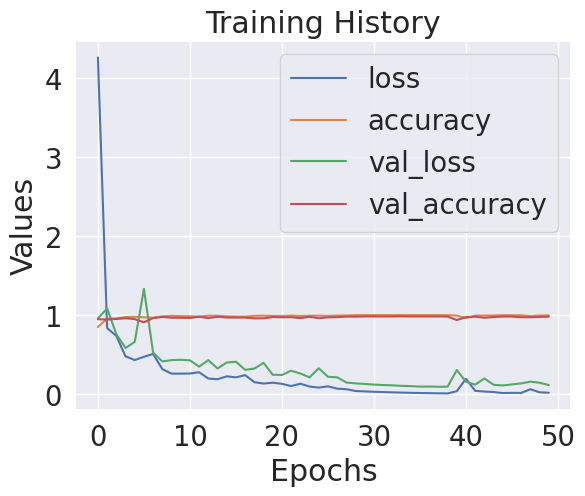

In [ ]:
history_data = pd.DataFrame(history.history)

# Create the plot
plt.plot(history_data)
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training History')
plt.grid(True)
plt.legend(history_data.columns)
plt.ylim(0,1)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_true = y_gs_test_encoded  # True labels (ground truth)


#test_images = [hex_x_test, en_x_test]

test_images = [np.load('hex_image.npy'),np.load('eg_image.npy'), np.load('sh_image.npy')]
start_time = time.time()
y_pred = merged_model.predict(test_images)
end_time = time.time()
print(f"Prediction time: {end_time - start_time}")

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

classes = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# Generate the classification report
report_dict = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

print(report)

#Set the path and filename for the CSV file
file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ClassificationReports/"
file_name = "GS_EG_SH_maximum_classification_report[NEW].csv"

report.to_csv(file_path + file_name)

103/103 [==============================] - 6s 53ms/step
Prediction time: 7.309054374694824
                precision    recall  f1-score      support
Lollipop         0.981308  0.996835  0.989011   316.000000
Kelihos_ver3     0.953125  0.938462  0.945736   130.000000
Gatak            0.995408  0.997699  0.996552   869.000000
Kelihos_ver1     1.000000  0.990909  0.995434   770.000000
Obfuscator.ACY   0.945876  0.986559  0.965789   372.000000
Simda            0.988814  0.977876  0.983315   452.000000
Tracur           0.600000  0.187500  0.285714    16.000000
Vundo            0.933333  0.954545  0.943820   220.000000
Ramnit           0.970588  0.949640  0.960000   139.000000
accuracy         0.980816  0.980816  0.980816     0.980816
macro avg        0.929828  0.886670  0.896152  3284.000000
weighted avg     0.979800  0.980816  0.979703  3284.000000


In [ ]:
from sklearn.metrics import confusion_matrix

label = np.arange(9)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, normalize = 'true')
print(conf_matrix)

[[0.99683544 0.         0.         0.         0.         0.00316456
  0.         0.         0.        ]
 [0.03076923 0.93846154 0.         0.         0.03076923 0.
  0.         0.         0.        ]
 [0.0023015  0.         0.9976985  0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.0025974  0.99090909 0.0038961  0.0012987
  0.         0.0012987  0.        ]
 [0.         0.         0.         0.         0.98655914 0.00268817
  0.00268817 0.00806452 0.        ]
 [0.         0.00663717 0.00221239 0.         0.01327434 0.97787611
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.375      0.
  0.1875     0.4375     0.        ]
 [0.         0.00454545 0.00454545 0.         0.00454545 0.00909091
  0.00454545 0.95454545 0.01818182]
 [0.         0.01438849 0.         0.         0.00719424 0.
  0.         0.02877698 0.94964029]]


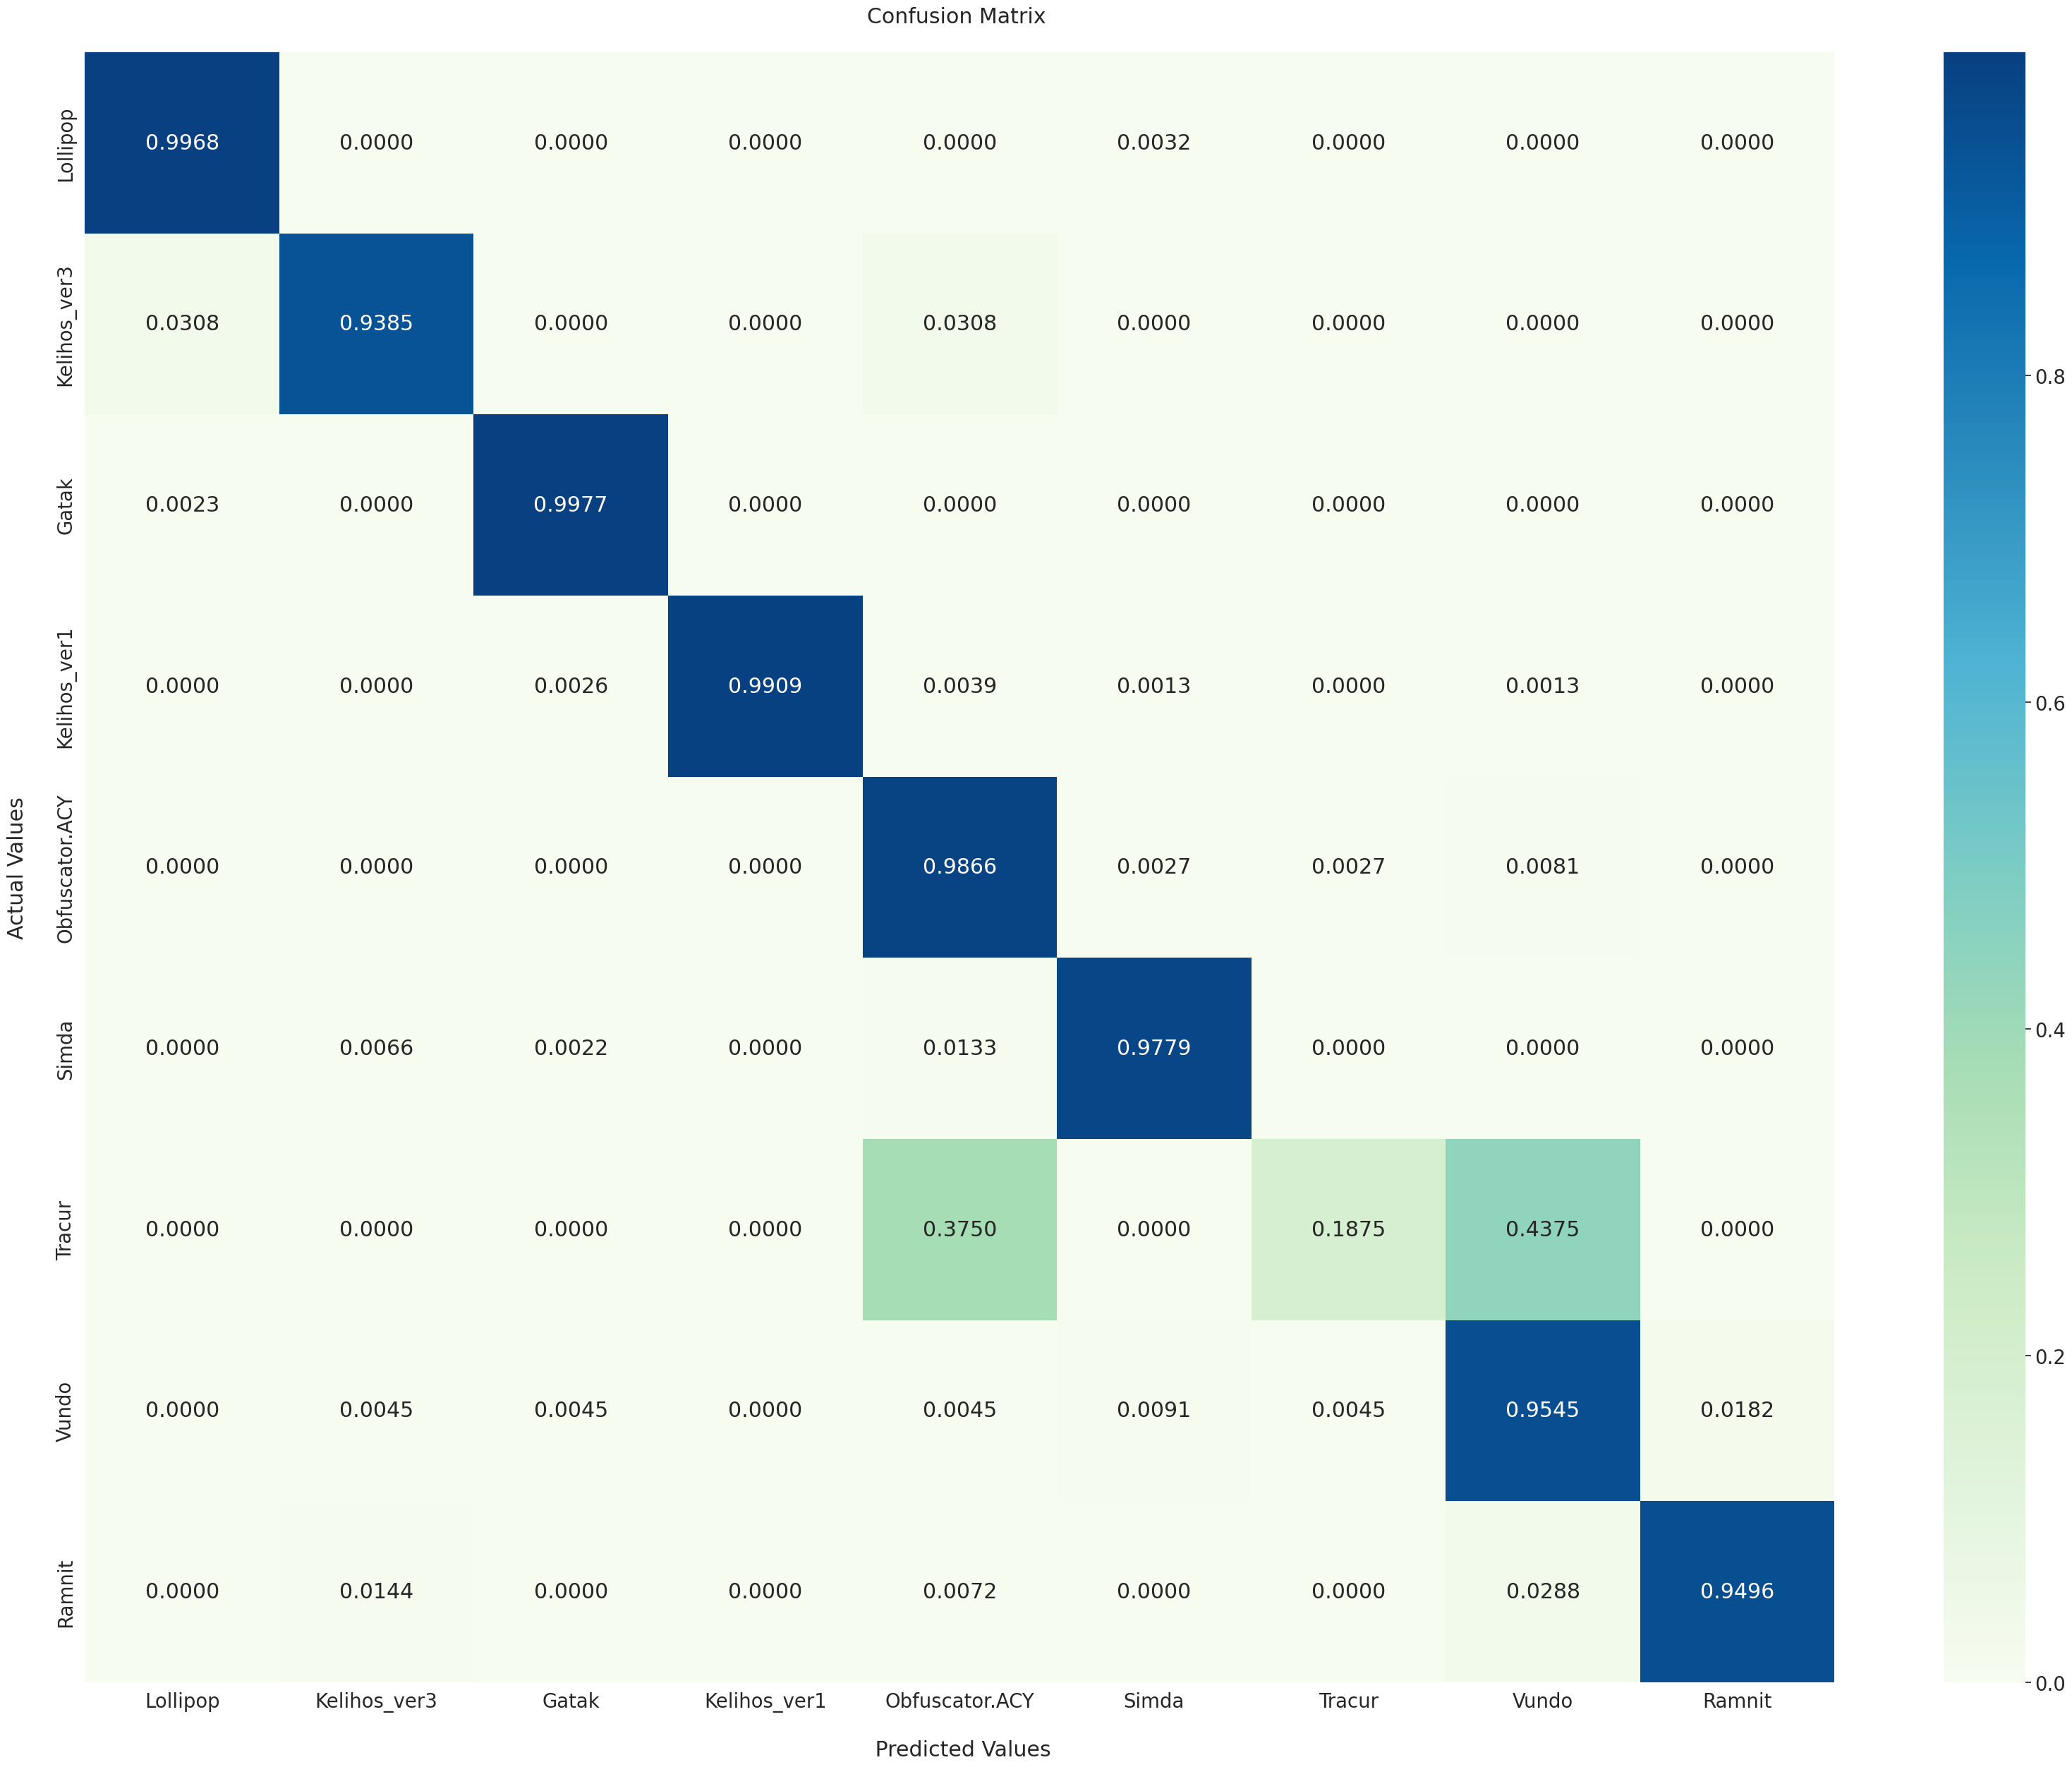

In [ ]:
# Visualizing confusion matrix
import seaborn as sns

plt.figure(figsize=(40,30))
sns.set(font_scale=1.8)
fx=sns.heatmap(conf_matrix, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)

file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ConfusionMetrics/"
file_name = "GS_EG_SH_MAXIMUM_Confusion_Matrix[NEW].png"
plt.savefig(file_path + file_name)

plt.show()

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Macro F1-score: {macro_f1:.4f}')

Accuracy: 0.9808
Precision: 0.9798
Recall: 0.9808
F1-score: 0.9797
Macro F1-score: 0.8962


###**GS+EG+SH(CONCAT)**

In [ ]:
from tensorflow.keras.layers import concatenate, Conv1D, MaxPooling1D, Flatten
from hyperopt import hp

In [ ]:
# Concatenate the output of the 2 models
merged = concatenate([hex_model, eg_model, sh_model])

# Add one or more dense layers on top of the merged output

# Add 1D convolutional layers
conv1 = Conv1D(filters=515, kernel_size=3, strides=1, activation='relu')(merged)
flatten = Flatten()(conv1)
dense1 = Dense(512, activation = 'relu')(flatten)
dense2 = Dense(256, activation = 'relu')(dense1)
dense3 = Dense(128, activation = 'relu')(dense2)
dense4 = Dense(64, activation = 'relu',kernel_regularizer = l2(0.01))(dense3)
output = Dense(9, activation = 'softmax')(dense4)

# Define the model
merged_model = Model(inputs = hex_in, outputs = output, name = 'merged_model')

# Compile the model
merged_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='sh_in'), name='sh_in', description="created by layer 'sh_in'") at layer "sh_vgg". The following previous layers were accessed without issue: []

In [ ]:
history = merged_model.fit(
    [x_gs_train, x_eg_train, x_sh_train],
    y_gs_train_encoded,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=([x_gs_test, x_eg_test, x_sh_test], y_gs_test_encoded)
)

In [ ]:
# saving the first (hex_en) model
merged_model.save('/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/Models/GS_EG_SH_vgg(concat[conv]).keras')

In [ ]:
Ihistory_data = pd.DataFrame(history.history)

# Create the plot
plt.plot(history_data)
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training History')
plt.grid(True)
plt.legend(history_data.columns)
plt.ylim(0,1)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_true = y_gs_test_encoded  # True labels (ground truth)


#test_images = [hex_x_test, en_x_test]

test_images = [np.load('hex_image.npy'),np.load('eg_image.npy'), np.load('sh_image.npy')]
start_time = time.time()
y_pred = merged_model.predict(test_images)
end_time = time.time()
print(f"Prediction time: {end_time - start_time}")

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

classes = ['Lollipop', 'Kelihos_ver3', 'Gatak', 'Kelihos_ver1', 'Obfuscator.ACY', 'Simda', 'Tracur', 'Vundo', 'Ramnit']

# Generate the classification report
report_dict = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

print(report)

#Set the path and filename for the CSV file
file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ClassificationReports/"
file_name = "GS_EG_SH_concat_classification_report[NEW].csv"

report.to_csv(file_path + file_name)

In [ ]:
from sklearn.metrics import confusion_matrix

label = np.arange(9)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, normalize = 'true')
print(conf_matrix)

In [ ]:
# Visualizing confusion matrix
import seaborn as sns

plt.figure(figsize=(40,30))
sns.set(font_scale=1.8)
fx=sns.heatmap(conf_matrix, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)

file_path = "/content/drive/MyDrive/Jahez_Vinod_2023/Big2015/Merge/ConfusionMetrics/"
file_name = "GS_EG_SH_CONCAT_Confusion_Matrix[NEW].png"
plt.savefig(file_path + file_name)

plt.show()

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Macro F1-score: {macro_f1:.4f}')